In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

In [279]:
import matplotlib
np.__version__, pd.__version__,sns.__version__,matplotlib.__version__

('1.26.4', '2.2.2', '0.13.2', '3.9.2')

In [280]:
df = pd.read_csv('.\data\Cars.csv')

In [281]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [282]:
df.shape

(8128, 13)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [284]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [285]:
df = df[df.fuel != "CNG"]


In [286]:
df = df[df.fuel != "LPG"]

In [287]:
df = df[df.owner != "Test Drive Car"]

In [288]:
df.pop("torque")

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8028, dtype: object

In [289]:
df.shape

(8028, 12)

In [290]:
map  = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3, 
    "Fourth & Above Owner": 4
    }

df.replace({"owner":map}, inplace = True)
df.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [291]:
df.mileage = df.mileage.str.split().str[0]
df.mileage = df.mileage.astype(float)

In [292]:
df.engine = df.engine.str.split().str[0]
df.engine = df.engine.astype(float)

In [293]:
df.max_power = df.max_power.str.split().str[0]
df.max_power =  df.max_power.astype(float)

In [294]:
df.name = df.name.str.split().str[0]

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [296]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


<Axes: xlabel='fuel', ylabel='count'>

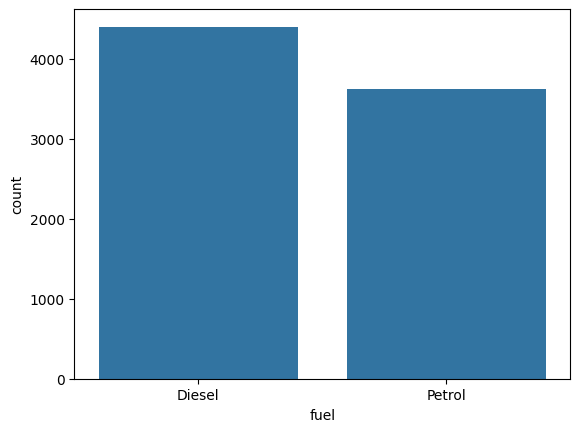

In [297]:
sns.countplot(data= df, x = "fuel")

<Axes: xlabel='transmission', ylabel='count'>

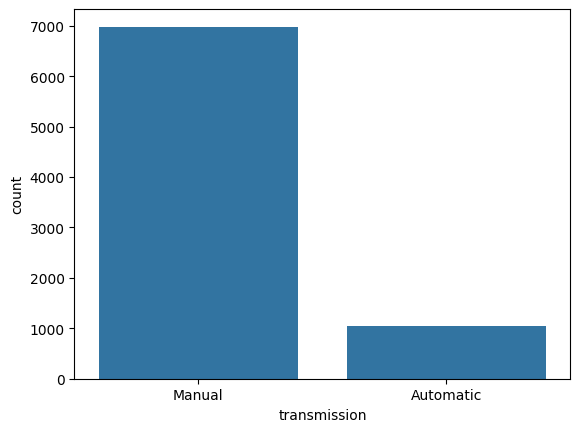

In [298]:
sns.countplot(data =df , x = "transmission")

<Axes: xlabel='seats', ylabel='count'>

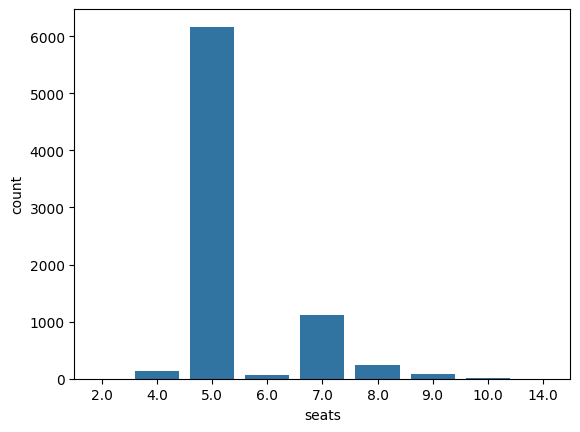

In [299]:
sns.countplot(data = df, x = 'seats')

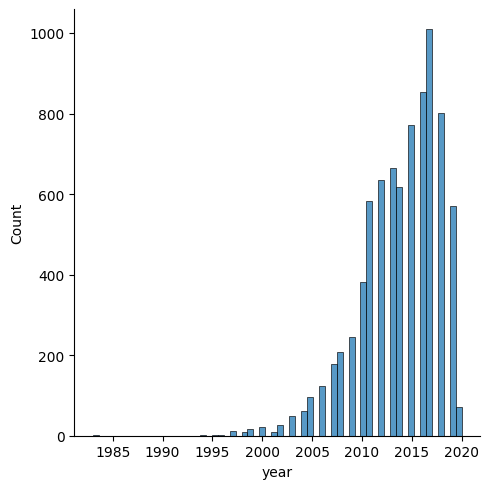

In [300]:
sns.displot(data= df, x = 'year')

Text(0.5, 0, 'Fuel Name')

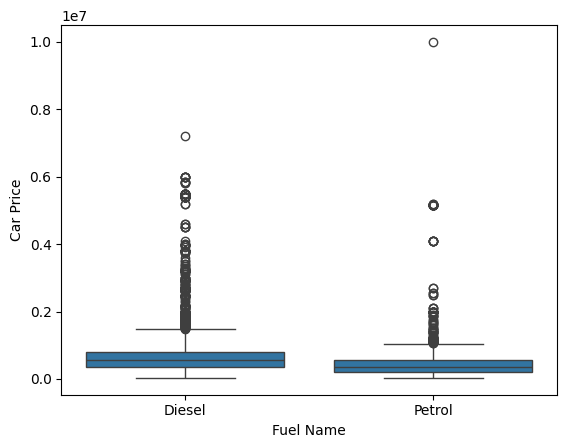

In [301]:
sns.boxplot(x =df.fuel, y = df.selling_price)
plt.ylabel("Car Price")
plt.xlabel("Fuel Name")

<Axes: xlabel='year', ylabel='selling_price'>

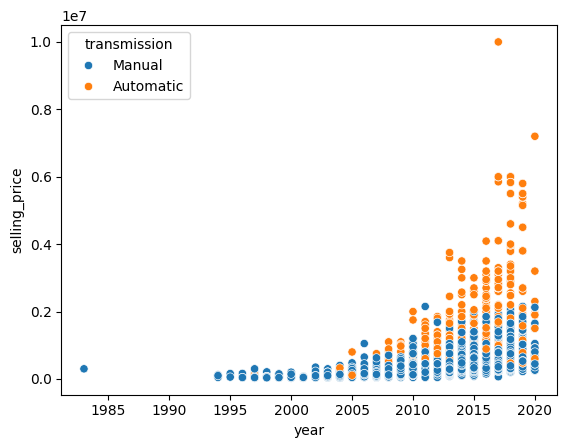

In [302]:
sns.scatterplot(x =df.year, y= df.selling_price, hue=df.transmission)

In [303]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.name = le.fit_transform(df.name)
df.name.unique()



array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [304]:
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [305]:
name_map = {}
keys = le.classes_
values = df.name.unique()
for key in keys:
    for value in values:
        name_map[key] = value
        values  = np.delete(values, np.where(values == value))
        break
name_map

{'Ambassador': 20,
 'Ashok': 27,
 'Audi': 10,
 'BMW': 11,
 'Chevrolet': 29,
 'Daewoo': 9,
 'Datsun': 26,
 'Fiat': 19,
 'Force': 28,
 'Ford': 4,
 'Honda': 7,
 'Hyundai': 6,
 'Isuzu': 14,
 'Jaguar': 21,
 'Jeep': 22,
 'Kia': 2,
 'Land': 30,
 'Lexus': 3,
 'MG': 23,
 'Mahindra': 17,
 'Maruti': 13,
 'Mercedes-Benz': 16,
 'Mitsubishi': 18,
 'Nissan': 31,
 'Opel': 5,
 'Peugeot': 15,
 'Renault': 8,
 'Skoda': 0,
 'Tata': 1,
 'Toyota': 12,
 'Volkswagen': 24,
 'Volvo': 25}

In [306]:
df.fuel = le.fit_transform(df.fuel)
df.fuel.unique()

array([0, 1])

In [307]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [308]:
df.seller_type = le.fit_transform(df.seller_type)
df.seller_type.unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
8123    1
8124    1
8125    1
8126    1
8127    1
Name: seller_type, Length: 8028, dtype: int32>

In [309]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [310]:
df.transmission  = le.fit_transform(df.transmission)
df.transmission.unique()

array([1, 0])

In [311]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int32(4), int64(4)
memory usage: 689.9 KB


<Axes: >

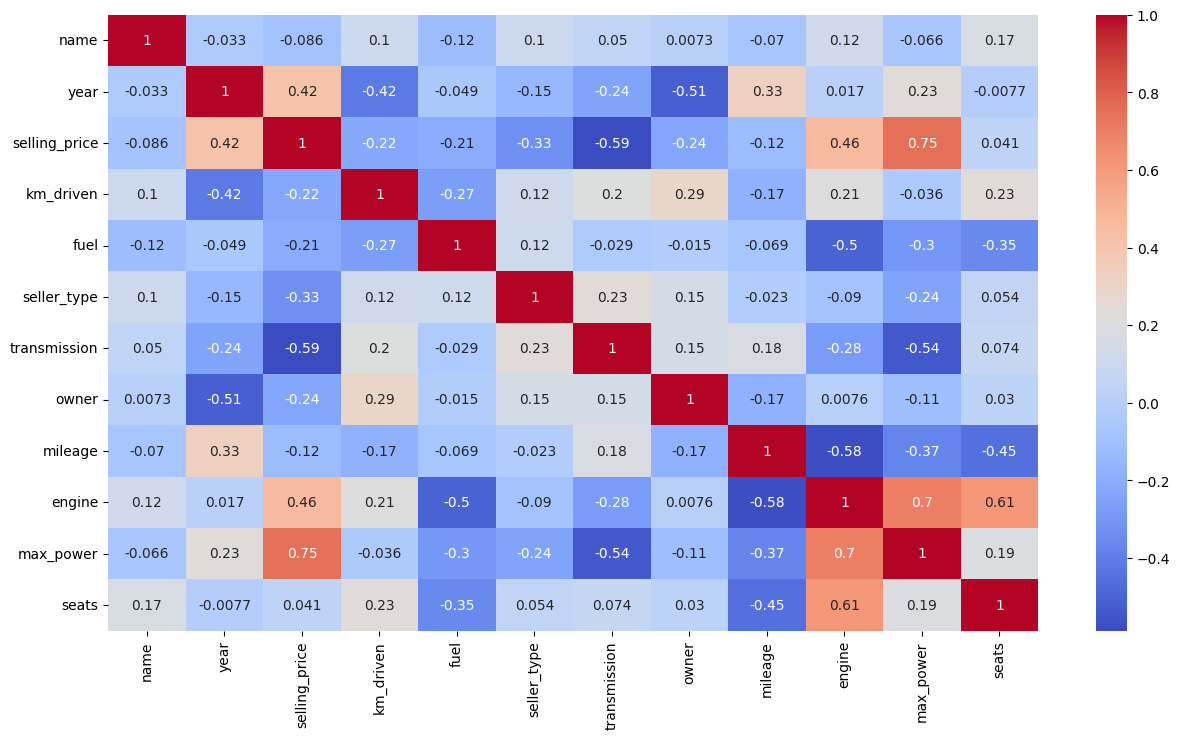

In [313]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

<Axes: xlabel='x', ylabel='y'>

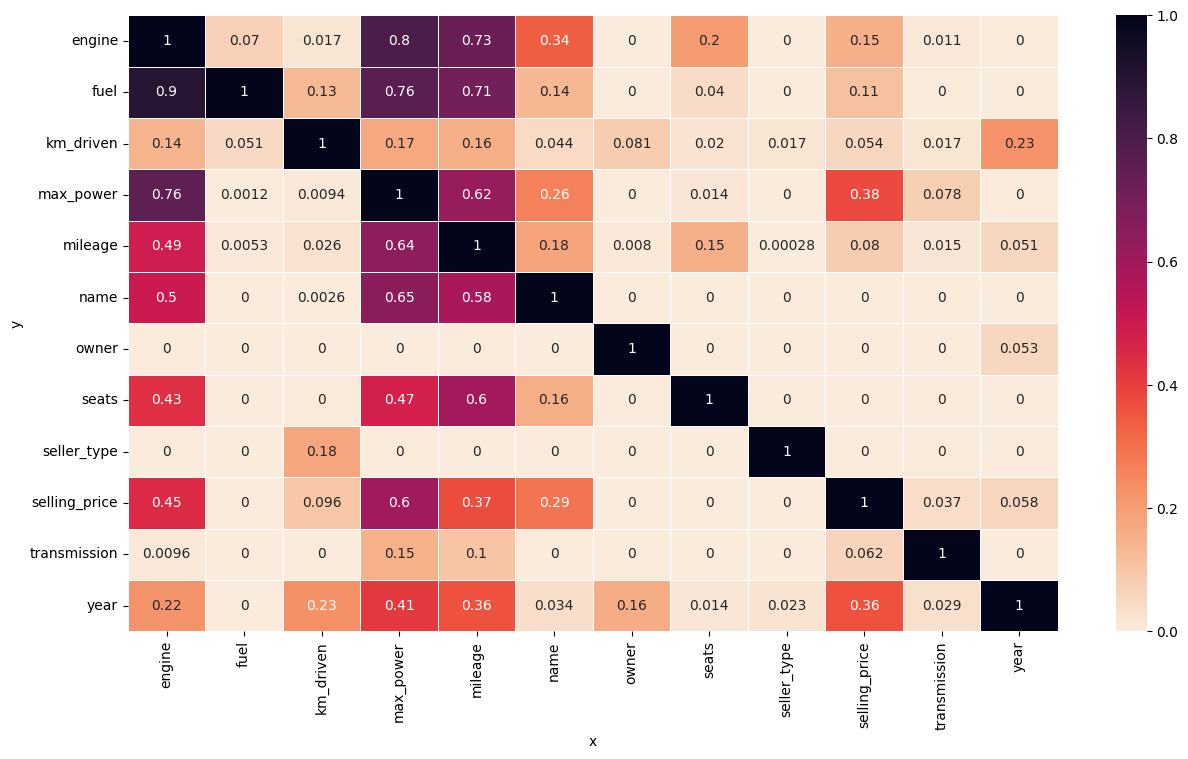

In [314]:
import ppscore as pps
dfcopy = df.copy()
matrix_df = pps.matrix(dfcopy)[['x','y','ppscore']].pivot(columns='x',index='y',values = 'ppscore')
plt.figure(figsize= (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1,cmap='rocket_r', linewidths = 0.5, annot=True)

In [315]:
x = df[['engine','max_power','mileage']]
y = np.log(df["selling_price"])

In [316]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=44)

In [317]:
X_train[['engine', 'max_power','mileage']].isna().sum()

engine       159
max_power    153
mileage      159
dtype: int64

In [318]:
X_test[['engine','max_power','mileage']].isna().sum()

engine       55
max_power    55
mileage      55
dtype: int64

In [319]:
y_train.isna().sum()

0

In [320]:
y_test.isna().sum()

0

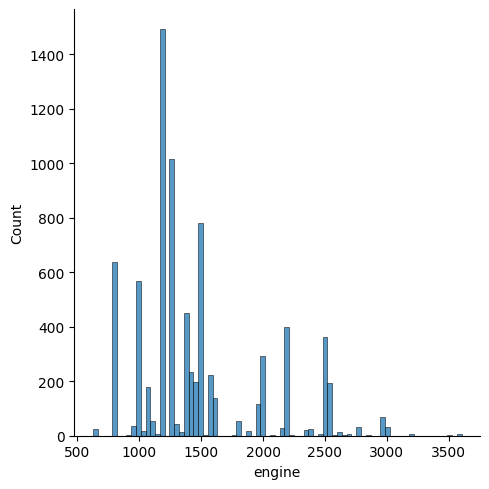

In [321]:
sns.displot(data=df, x='engine')

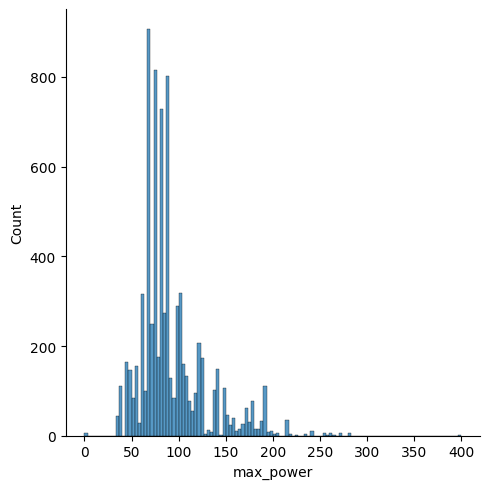

In [322]:
sns.displot(data = df, x= 'max_power')

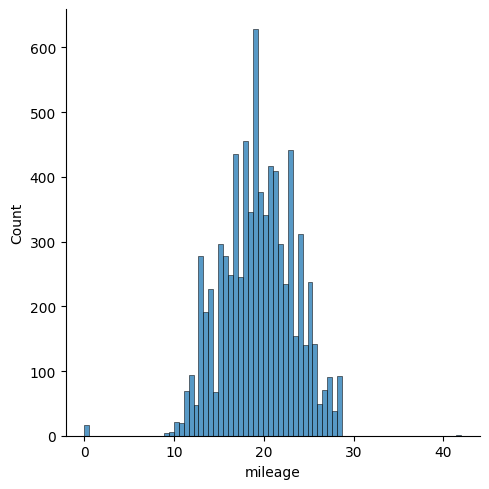

In [323]:
sns.displot(data =df, x ='mileage')

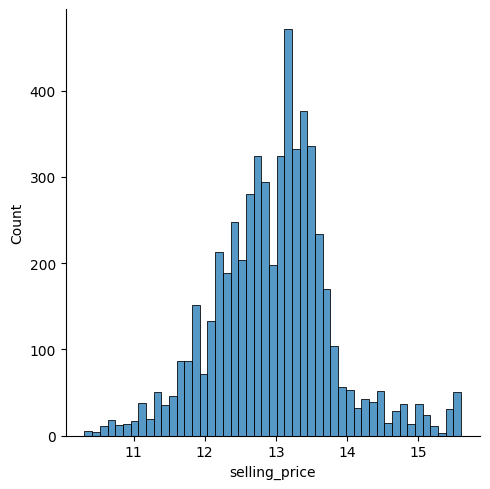

In [324]:
sns.displot(y_train)

***********###################


In [325]:
engine_default = X_train['engine'].median()
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].mean()

In [326]:
X_train['engine'].fillna(X_train['engine'].median(), inplace = True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace = True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace = True)

In [327]:
X_test['engine'].fillna(X_test['engine'].median(), inplace = True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace= True)
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace = True)

In [328]:
y_train.fillna(y_train.median(), inplace =True)
y_test.fillna(y_test.median(), inplace = True)

In [329]:
X_train[['engine', 'max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [330]:
X_test[['engine','max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [331]:
y_train.isna().sum()

0

In [332]:
y_test.isna().sum()

0

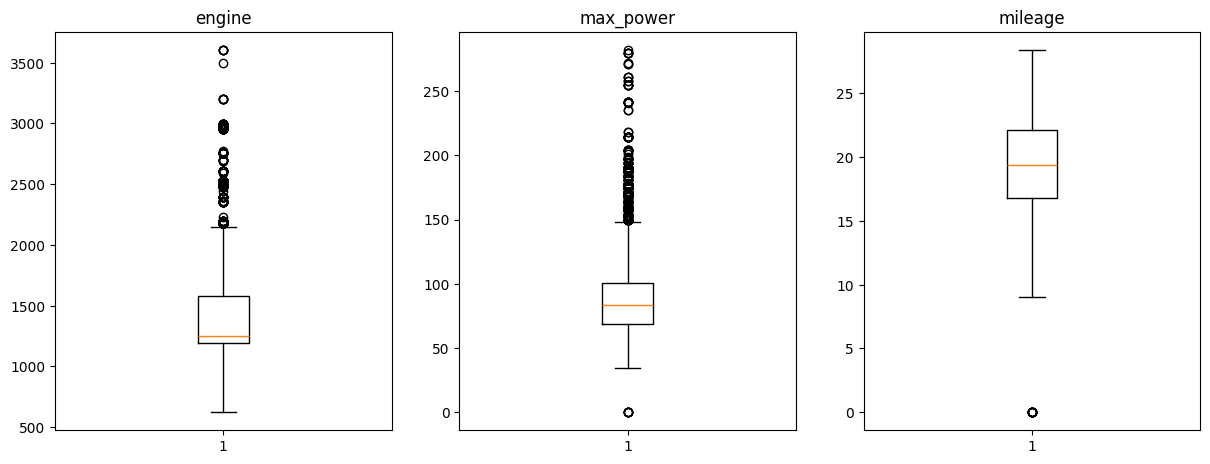

In [333]:
col_dict = {'engine':1,'max_power':2,'mileage':3}
plt.figure(figsize = (20,30))

for variable, i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    plt.title(variable)
plt.show()

In [334]:
def outlier_count(col, data = X_train):
    q75, q25 = np.percentile(data[col], [75,25])
    iqr = q75 -q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100,2)

    if (outlier_count > 0):
        print("\n"+ 15 * '-' + col + 15 * '-' + "\n")
        print("Number of outliers: {}".format(outlier_count))
        print("Percent of data that is outlier: {}%".format(outlier_percent))

In [335]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 830
Percent of data that is outlier: 14.77%

---------------max_power---------------

Number of outliers: 439
Percent of data that is outlier: 7.81%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


In [336]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

In [337]:
y_train = y_train.values

In [338]:
intercept = np.ones((X_train.shape[0],1))
X_train = np.concatenate((intercept,X_train), axis=1)
intercept = np.ones((X_test.shape[0],1))
X_test = np.concatenate((intercept, X_test),axis=1)

In [339]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [340]:
import mlflow
import os
import mlflow.sklearn

In [341]:
#experiment tracking
mlflow.set_tracking_uri("http://localhost:5000")
#os.environ["LOGNAME"] = "marn"
#mlflow.set_experiment(experiment_name="marn-car-price-prediction")


In [342]:
os.environ["LOGNAME"] = "marn"

In [343]:
mlflow.set_experiment(experiment_name="marn-car-price-prediction")          

<Experiment: artifact_location='mlflow-artifacts:/681314272816286477', creation_time=1725479052653, experiment_id='681314272816286477', last_update_time=1725479052653, lifecycle_stage='active', name='marn-car-price-prediction', tags={}>

In [344]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr, method, theta_init, momentum, num_epochs=500, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.theta_init = theta_init
        self.momentum = momentum
        self.cv         = cv
        self.regularization = regularization

    def mse(self, ytrue, ypred):
        return ((ytrue - ypred) ** 2).sum() / ypred.shape[0]
    
    def r2(self, ytrue, ypred):
        return 1 - ((((ytrue - ypred) ** 2).sum()) / (((ytrue - ytrue.mean()) ** 2).sum()))
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #3 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            if self.theta_init == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.theta_init == 'xavier':
                m = X_train.shape[0]
                # calculate the range for the weights
                lower , upper = -(1.0 / math.sqrt(m)), (1.0 / math.sqrt(m))
                # randomly pick weights within this range
                # generate random numbers
                numbers = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + numbers * (upper - lower)
                
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #record dataset
                    # mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    # mlflow.log_input(mlflow_train_data, context="training")
                    
                    # mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    # mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta) # gradient
        prev_step = 0 # memory of previous result
        
        if self.momentum == "without":
            step = self.lr * grad # no momentum = normal equation
        else:
            step = self.lr * grad + self.momentum * prev_step # adding momentum

        # updating theta and previous step
        self.theta -= step
        prev_step = step
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        # Feature names and importance values
        feature_names = ["engine", "max_power","mileage"]
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        # Create a bar chart for feature importance
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,max(self._coef())*1.3])  # Set the x-axis limits
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()


In [345]:
class NormalPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0 # returning zero because normal just means using linear regression with no regularization
        
    def derivation(self, theta):
        return 0 # returning zero because normal just means using linear regression with no regularization

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Normal(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)

class Lasso(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, theta_init, momentum, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, theta_init, momentum)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr,theta_init, momentum, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, theta_init, momentum)

In [346]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [211]:
polynomials = ["no",1] #to use polynomial feature engineering or not
regs = ["Ridge", "Lasso", "ElasticNet","Normal"] #type of regularization
methods = ["batch","mini","sto"]
lrs = [0.01,0.001,0.0001]
thetas = ["zeros","xavier"]
momentums = ["without",0.4] #momentum should be in range of (0,1)


for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for lr in lrs:
                for theta in thetas:
                    for momentum in momentums:
                        params = {"method": method, "lr": lr, "theta_init": theta, "momentum": momentum, "l": 0.1}
                        mlflow.start_run(run_name=f"polynomial-{polynomial}-method-{params['method']}-lr-{params['lr']}-reg-{reg}-theta_init-{params['theta_init']}-momentum-{params['momentum']}", nested=True)
                        mlflow.log_params(params=params)

                        print("="*5, polynomial, "="*5)
                        print("="*5, reg, "="*5)                        
                        print("="*5, method, "="*5)                        
                        print("="*5, lr, "="*5)                        
                        print("="*5, momentum, "="*5)
                        

                        if polynomial == "no":
                            X_train_poly, X_test_poly = X_train, X_test # No transformation for other regressions
                        else:
                           # Apply polynomial feature transformation
                            poly = PolynomialFeatures(degree=polynomial, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)   
                            
                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet, Normal
                        model = type_of_regression(**params)  
                        model.fit(X_train_poly, y_train)
                        yhat = model.predict(X_train_poly)
                        train_mse  = model.mse(y_train, yhat)
                        train_r2 = model.r2(y_train, yhat)

                        yhat = model.predict(X_test_poly)
                        test_mse  = model.mse(y_test, yhat)
                        test_r2 = model.r2(y_test, yhat)

                        print("Train MSE: ", train_mse)
                        mlflow.log_metric(key="train_mse", value=train_mse)

                        print("Train R2: ", train_r2)
                        mlflow.log_metric(key="train_r2", value=train_r2)

                        print("Test MSE: ", test_mse)
                        mlflow.log_metric(key="test_mse", value=test_mse)

                        print("Test R2: ", test_r2)
                        mlflow.log_metric(key="test_r2", value=test_r2)

                        signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######

                        mlflow.end_run()

2024/09/05 02:48:59 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 02:49:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8e374cbf3c804bf1859c7cdd10c0ad83.
2024/09/05 02:49:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.02961392108498


2024/09/05 02:49:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2e408710421942b5b4fac6365ee7d8bc.
2024/09/05 02:49:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.14066416944214


2024/09/05 02:49:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/41a0edb59a9c4e01b143dd83aaf9d346.
2024/09/05 02:49:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.104759588805312
Train MSE:  5.092281264406019
Train R2:  -6.2641387253692615
Test MSE:  5.1505461321496835
Test R2:  -6.306958568053231


2024/09/05 02:49:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/2b240745e1824b2a9128c87abc4729c7.
2024/09/05 02:49:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 02:50:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/bd145bd73358449d9b1fb5a988d7cd62.
2024/09/05 02:50:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.02961392108498


2024/09/05 02:50:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c9f294c314154741a2f6a646ee76e389.
2024/09/05 02:50:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.14066416944214


2024/09/05 02:50:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/87e0577bdc054d52909031bde0ab8b9d.
2024/09/05 02:50:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.104759588805312
Train MSE:  5.092281264406019
Train R2:  -6.2641387253692615
Test MSE:  5.1505461321496835
Test R2:  -6.306958568053231


2024/09/05 02:50:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/6d54edb427da4d12b74acddc79dee687.
2024/09/05 02:50:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 02:50:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/6c9f4d2bd3c84863bc070d5633132de3.
2024/09/05 02:50:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.0296322411018


2024/09/05 02:51:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/43601edd72f643b7bc8909f225ba3328.
2024/09/05 02:51:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.140770590654304


2024/09/05 02:51:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/5646e5809f304ac3b4cdcfa9aa3a5719.
2024/09/05 02:51:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.104555456830379
Train MSE:  5.09209461247632
Train R2:  -6.26387246640981
Test MSE:  5.150359656244443
Test R2:  -6.306694019075594


2024/09/05 02:51:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/f09318a7cff948f8bdcef6d40f47bdd5.
2024/09/05 02:51:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 02:51:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7aa1ff32fa7343438de9e19f20b3dcc3.
2024/09/05 02:51:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.029682028250218


2024/09/05 02:51:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0ea5b17ceab0427c84e8f910b63545f7.
2024/09/05 02:51:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.140708431602432


2024/09/05 02:52:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/1d728d95f3034ab3ae2eacc4180a29a0.
2024/09/05 02:52:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.104690830250146
Train MSE:  5.0922087471600985
Train R2:  -6.264035279525053
Test MSE:  5.150471829846535
Test R2:  -6.306853157124626


2024/09/05 02:52:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/de5a0685fb7f4a4bb2de37de8b55baf5.
2024/09/05 02:52:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 02:52:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8e94ba4ed0cc40079bee04d0e4d32016.
2024/09/05 02:52:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.71368855747949


2024/09/05 02:52:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/31fa6afe7d314fc39af9ceba53607280.
2024/09/05 02:52:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.10387457267117


2024/09/05 02:52:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/403da09e26e645f291cb0085d868553e.
2024/09/05 02:52:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.11395823313939
Train MSE:  66.00531224594911
Train R2:  -93.15657145988699
Test MSE:  66.24047192545505
Test R2:  -92.9737984029238


2024/09/05 02:53:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/e6d67e3ede634895b41e8933688d9704.
2024/09/05 02:53:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 02:53:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ed8ebf22680148ed99af02bcb3db77f0.
2024/09/05 02:53:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.71368855747949


2024/09/05 02:53:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/43f2fb77b3004d80af391e6ed9ba454b.
2024/09/05 02:53:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.10387457267117


2024/09/05 02:53:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c0395f5cf3664b949efbebbbe2954f4d.
2024/09/05 02:53:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.11395823313939
Train MSE:  66.00531224594911
Train R2:  -93.15657145988699
Test MSE:  66.24047192545505
Test R2:  -92.9737984029238


2024/09/05 02:53:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c9fd7003a4df422cac35ee00000955c9.
2024/09/05 02:53:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 02:54:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/849f15a193f34e5cb674572a771ae831.
2024/09/05 02:54:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.64711821716092


2024/09/05 02:54:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6e182eafb6414642ad24a29c56f408cf.
2024/09/05 02:54:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.13750563810368


2024/09/05 02:54:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4ba977c2c52748b4b45496b172e65aa3.
2024/09/05 02:54:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.18456437340612
Train MSE:  66.07266984489424
Train R2:  -93.25265706819091
Test MSE:  66.30783114822856
Test R2:  -93.06935934682255


2024/09/05 02:54:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c5d45f9caaee4c90840816e58d30ba3d.
2024/09/05 02:54:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 02:54:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4562c3cd1bb84ccca1e8ce4719145343.
2024/09/05 02:54:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.6329831840345


2024/09/05 02:55:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b354c20b0c5a4d68afddf591fc53833e.
2024/09/05 02:55:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.07643226397639


2024/09/05 02:55:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c1a324bd628d4a0e98b56546cb84ef7d.
2024/09/05 02:55:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.00151904545513
Train MSE:  65.89678772763045
Train R2:  -93.00176124512511
Test MSE:  66.13155143512503
Test R2:  -92.81927546698006


2024/09/05 02:55:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/86aeef058d2c4d42b5ff4c8b7cc04f38.
2024/09/05 02:55:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 02:55:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3be640ec8f9843f1ab48043e5e2d9a4f.
2024/09/05 02:55:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73089334414664


2024/09/05 02:56:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/85802a13c930486dbb7a478682a1ef5f.
2024/09/05 02:56:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.15274886582804


2024/09/05 02:56:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/0e63c69fa22f4bba8137a29a2886415b.
2024/09/05 02:56:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.29811928704342
Train MSE:  153.06813908535057
Train R2:  -217.35168542674757
Test MSE:  153.43567009282395
Test R2:  -216.67557370888267


2024/09/05 02:56:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/93e266312fbd486a86c061e43330fee6.
2024/09/05 02:56:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 02:56:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1d2d3283518a48688a8ebe9f3a98ea59.
2024/09/05 02:56:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73089334414664


2024/09/05 02:56:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2305a347c00d40ed92014e8b39de73bf.
2024/09/05 02:56:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.15274886582804


2024/09/05 02:57:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/61c3c71fb27c4ca199010074444161f8.
2024/09/05 02:57:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.29811928704342
Train MSE:  153.06813908535057
Train R2:  -217.35168542674757
Test MSE:  153.43567009282395
Test R2:  -216.67557370888267


2024/09/05 02:57:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/2969345fcee8492ab5d6c17cc7836ad9.
2024/09/05 02:57:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 02:57:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/cdeba68586fb46f6bed5a3b04a479d46.
2024/09/05 02:57:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.595430595017


2024/09/05 02:57:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/493043d08bcf4ecf8782b49bf852a4c3.
2024/09/05 02:57:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 152.85832158695283


2024/09/05 02:57:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/5d3c02603216458483cc30501c8fef8e.
2024/09/05 02:57:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.55011415533323
Train MSE:  153.31994491797323
Train R2:  -217.7108864223433
Test MSE:  153.68761069205763
Test R2:  -217.03299590702974


2024/09/05 02:57:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/b4d700f712ba45b4b92e80735d4fa883.
2024/09/05 02:57:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 02:58:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e1de0847d3d340caa4ae0941e4a9db13.
2024/09/05 02:58:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 153.0097805885312


2024/09/05 02:58:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f010645f21a4499580108b32566b569d.
2024/09/05 02:58:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.19516017967862


2024/09/05 02:58:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6029ba67e2ce4dc7ac025b2753515e9d.
2024/09/05 02:58:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.40706152574583
Train MSE:  153.1735089731026
Train R2:  -217.50199556131489
Test MSE:  153.54159259095707
Test R2:  -216.82584346386113


2024/09/05 02:58:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/09a333068077441e9d79d210c093892b.
2024/09/05 02:58:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 02:58:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b790bae516d04c798fa10d77e987c605.
2024/09/05 02:58:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.91932163977191


2024/09/05 02:58:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e1a3ed94d52f4fea9c96253cd28b11dc.
2024/09/05 02:58:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.028956190206248


2024/09/05 02:59:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/503848921fa6409bb4071c03b5982b9e.
2024/09/05 02:59:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9870048150455535
Train MSE:  4.975980176006699
Train R2:  -6.098235234148292
Test MSE:  5.033515490591511
Test R2:  -6.140929951452656


2024/09/05 02:59:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/5e5c6b55d6e14c3f955d0dbb8d4acf4a.
2024/09/05 02:59:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 02:59:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1416eae5464b48b9aa6619d12a89d7c8.
2024/09/05 02:59:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.915794330567957


2024/09/05 02:59:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/459d373044b44a938b560b0483056274.
2024/09/05 02:59:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.0229469305949825


2024/09/05 02:59:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/0d40a3622e044e27b68ef14259a41d45.
2024/09/05 02:59:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.990590726989287
Train MSE:  4.978904218440359
Train R2:  -6.102406380393776
Test MSE:  5.036618736746684
Test R2:  -6.145332453731158


2024/09/05 02:59:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/68f2cf1fedf5482ca614e4e19d53ae45.
2024/09/05 02:59:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 02:59:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/332b1aad937a4c1b92cdfd91e4b1a79c.
2024/09/05 02:59:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.9184299728717695


2024/09/05 02:59:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8b5db51d79bd4cb68d0d6c067c1c8d75.
2024/09/05 02:59:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.027967514340195


2024/09/05 02:59:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/058b95ed9ac648eea5faf36a2caa4260.
2024/09/05 02:59:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9840829118397485
Train MSE:  4.973211829284187
Train R2:  -6.094286187819526
Test MSE:  5.030609269251013
Test R2:  -6.1368069636413125


2024/09/05 03:00:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/85a7b00fcd584facba027342e4fa9aba.
2024/09/05 03:00:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:00:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d620c8603d3a4ef4a6a5e5d35b771813.
2024/09/05 03:00:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.9150714224301355


2024/09/05 03:00:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d16b5e4939c1494da19f4efa8ef2b70b.
2024/09/05 03:00:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.018956655820789


2024/09/05 03:00:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a0f7a1c24b414da9b211e8c7408e1e90.
2024/09/05 03:00:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.987932677442822
Train MSE:  4.976617249055096
Train R2:  -6.099144018789489
Test MSE:  5.03445409911663
Test R2:  -6.14226153327499


2024/09/05 03:00:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/da3e8b195e494e3883d06f95592b8ac0.
2024/09/05 03:00:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 03:00:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/5d1dc0ef9a8f4695a18889220ae6200d.
2024/09/05 03:00:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.919312337194967


2024/09/05 03:00:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/060d69b51e7246bf92a11f36ef12c62d.
2024/09/05 03:00:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026764579616352


2024/09/05 03:00:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ef5c90ecf35a4283b6616af288cc6fa4.
2024/09/05 03:00:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.989422641314157
Train MSE:  4.977916267674979
Train R2:  -6.100997068723637
Test MSE:  5.035557961426324
Test R2:  -6.1438275567518845


2024/09/05 03:00:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/cd5abd195e4142d1a38c23e13c924e1b.
2024/09/05 03:00:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:00:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/c073e90130f04848996683e1e357c0b3.
2024/09/05 03:00:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.9189748186916065


2024/09/05 03:00:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/930f433c867d45b1936cec9e053df67a.
2024/09/05 03:00:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026516951331578


2024/09/05 03:00:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e9c939dd255f413b90ad590fcc3977c9.
2024/09/05 03:00:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9902792216302085
Train MSE:  4.97874813879785
Train R2:  -6.10218373279901
Test MSE:  5.036399747735897
Test R2:  -6.14502177917595


2024/09/05 03:01:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/88f172eb97dd4e37856d9940c225b409.
2024/09/05 03:01:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 03:01:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/07e9036680a94f61910182a90ad2b74c.
2024/09/05 03:01:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.918742012418134


2024/09/05 03:01:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8f79147a37c04f21a1dc05ffd1504098.
2024/09/05 03:01:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026244625461967


2024/09/05 03:01:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3de7b6eb6b8244c9887633df04a3fb9c.
2024/09/05 03:01:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.989656820038439
Train MSE:  4.978200962416861
Train R2:  -6.101403185745073
Test MSE:  5.035825177363712
Test R2:  -6.144206649712731


2024/09/05 03:01:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/665e8e435ca8489e894fa5b115169b9a.
2024/09/05 03:01:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:01:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/036b39fa7d374eb394b2e85d5eb5ff7b.
2024/09/05 03:01:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.919172697880074


2024/09/05 03:01:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ffde9673cf6a476b8142a736d0c0996d.
2024/09/05 03:01:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026086501051313


2024/09/05 03:01:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4e7974f291fa46b9b4a0faf15a7b193d.
2024/09/05 03:01:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.989383919375459
Train MSE:  4.9778901454013385
Train R2:  -6.100959805302845
Test MSE:  5.035518261039201
Test R2:  -6.14377123474711


2024/09/05 03:01:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/fae9c0be843544a1af8653f41f47929e.
2024/09/05 03:01:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 03:01:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/60ff6dbfe6e84821a5a25d2e7113f516.
2024/09/05 03:01:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.448979352639593


2024/09/05 03:02:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4361d1369fa64641ba3a6a3151427e2f.
2024/09/05 03:02:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.56760958051723


2024/09/05 03:02:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a0eeb24d5641427c91423ae1a757d78b.
2024/09/05 03:02:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.533813431859008
Train MSE:  5.519612427614058
Train R2:  -6.873726587868977
Test MSE:  5.580472823798227
Test R2:  -6.916885446208375


2024/09/05 03:02:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c910833348584aa0bb8502bd071a0d7e.
2024/09/05 03:02:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:02:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/12b8c3553d5d43279807bec9714de463.
2024/09/05 03:02:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.448979379000309


2024/09/05 03:02:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/75aca1cb8e1e4c7780642505c0f1b2ab.
2024/09/05 03:02:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.567599492476042


2024/09/05 03:03:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c93d55fc3f924341be08093eca9f01bd.
2024/09/05 03:03:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.533840005793041
Train MSE:  5.519642975499181
Train R2:  -6.873770164424116
Test MSE:  5.580504404866475
Test R2:  -6.916930249526567


2024/09/05 03:03:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/57f9f3c6ed6a48088b00ffd8523c5759.
2024/09/05 03:03:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 03:03:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d438a17d22c646b19ce0df838f9ceffd.
2024/09/05 03:03:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.448871396536902


2024/09/05 03:03:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/56751e09715c4c37aa6479df72d19440.
2024/09/05 03:03:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.567297022692434


2024/09/05 03:03:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ad619df3e90f489e9562fa5b42354c64.
2024/09/05 03:03:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.534497104643938
Train MSE:  5.520266977900554
Train R2:  -6.8746603037886125
Test MSE:  5.581122632523637
Test R2:  -6.9178073145524115


2024/09/05 03:04:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/572efeaceacd4fc39bbcf94b86cfc1eb.
2024/09/05 03:04:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:04:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/050828be85cb418394b3a68099fda816.
2024/09/05 03:04:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.449247434406289


2024/09/05 03:04:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4f55a067eb984bb081480365ec3df44b.
2024/09/05 03:04:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.567946705855474


2024/09/05 03:04:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e3a1e50c49684f3f9671615da375bd1b.
2024/09/05 03:04:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.53390787862584
Train MSE:  5.519750176783967
Train R2:  -6.873923087046373
Test MSE:  5.580621060328878
Test R2:  -6.91709574588533


2024/09/05 03:04:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/dd9cbf0fe81f4e0c934773cdddd9b996.
2024/09/05 03:04:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 03:05:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b1b4d395fbeb499cb3584e8079e139ea.
2024/09/05 03:05:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.327473751718461


2024/09/05 03:06:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ce0f0198d06b479eb0c3f9a3eabcf182.
2024/09/05 03:06:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.096410066781835


2024/09/05 03:06:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/32bc36f3c23e4a04bffcec0a3cfe1c7c.
2024/09/05 03:06:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.0670271557631805
Train MSE:  5.049826046344128
Train R2:  -6.2035763609584365
Test MSE:  5.108797050797088
Test R2:  -6.247730128996348


2024/09/05 03:06:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/1a3baf26093045b5826be929870ccb87.
2024/09/05 03:06:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:07:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a5848dbb8d214d34850b87ebc23c573a.
2024/09/05 03:07:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.201612207222377


2024/09/05 03:08:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/daf36cd0b4874e9ca62df14ad7b73bd1.
2024/09/05 03:08:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.330771206239654


2024/09/05 03:08:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/067d5fa8a3f94eb19926c81029a22ef0.
2024/09/05 03:08:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.863574592480169
Train MSE:  4.8518019831937975
Train R2:  -5.921095054252164
Test MSE:  4.908245299546355
Test R2:  -5.96321207993113


2024/09/05 03:09:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/664efb39ca2f4250a7c74fe30b746228.
2024/09/05 03:09:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 03:09:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7d183a68bfa8434ab8ea11d785789566.
2024/09/05 03:09:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.077267172540501


2024/09/05 03:10:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/98a70b1f9a4a40bcade9f04852c506cd.
2024/09/05 03:10:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 4.931196339146616


2024/09/05 03:10:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/017b8db8d5624102b87a7f941f106b8c.
2024/09/05 03:10:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.041001679083514
Train MSE:  5.0225595327473735
Train R2:  -6.164680681980835
Test MSE:  5.083208256000822
Test R2:  -6.211427908108425


2024/09/05 03:11:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/f2e06fce87f34d14babb5d20ea2e09bc.
2024/09/05 03:11:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:11:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d41124e305a14016972cc250d83880fb.
2024/09/05 03:11:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.915833273129829


2024/09/05 03:11:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2e1a2b0487824ec69e4a3f8fa02197e9.
2024/09/05 03:11:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 4.656118068663422


2024/09/05 03:12:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c8147738ef1a4e649023b4f6b85dc298.
2024/09/05 03:12:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.177473418826329
Train MSE:  5.1463787501348826
Train R2:  -6.341308783467769
Test MSE:  5.198740136258603
Test R2:  -6.3753302673288355


2024/09/05 03:12:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/72a6b63d16d848048c0cfb1b5626eb3c.
2024/09/05 03:12:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 03:13:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/bf8c36aa7fd14839be13626060583095.
2024/09/05 03:13:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.952655722731878


2024/09/05 03:14:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4a2ed6cabef142e7906cd99b453ce2bf.
2024/09/05 03:14:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.0825042192570145


2024/09/05 03:14:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3504485e65ff45ada64e7777cb58e6cb.
2024/09/05 03:14:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.930165169396446
Train MSE:  4.921209216661848
Train R2:  -6.020104466002482
Test MSE:  4.977918110133338
Test R2:  -6.062055256405394


2024/09/05 03:14:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/b5cb44887f4640ed91aadd22d28b86da.
2024/09/05 03:14:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:15:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7122696fe3b24e6d8c4857ad435df438.
2024/09/05 03:15:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.863561293510416


2024/09/05 03:16:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c028878476d64a6683adc6cce092675a.
2024/09/05 03:16:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.019217646602542


2024/09/05 03:16:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/33e7ba3881be4361879bcfd9cf19f7c6.
2024/09/05 03:16:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9500850024010985
Train MSE:  4.939124334506212
Train R2:  -6.045660379854381
Test MSE:  4.997557971075034
Test R2:  -6.089917864855307


2024/09/05 03:16:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d2fd4aa8b4ce430ca8aa10c6fcba15da.
2024/09/05 03:16:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 03:16:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b42184629fbf4b7b81ed0febf219eac0.
2024/09/05 03:16:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.9048289220861525


2024/09/05 03:16:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/93e53c1ae60d4c55ade37a6fe2bf9b31.
2024/09/05 03:16:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.019027134798984


2024/09/05 03:17:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/771c9def771c4c0f99fe2e90fca75ade.
2024/09/05 03:17:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9932814281414
Train MSE:  4.979904216486398
Train R2:  -6.103832877508595
Test MSE:  5.037806671759042
Test R2:  -6.147017749172481


2024/09/05 03:17:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/5d9aed58aa6a4419bc11722579f2bd4b.
2024/09/05 03:17:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:18:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/23c52a90a61b4d8eaa8ae5572c6e260d.
2024/09/05 03:18:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.949547588363659


2024/09/05 03:18:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4d29092e9b6a4dbc84c4168d5e0c6cf3.
2024/09/05 03:18:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.020968110703643


2024/09/05 03:19:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/48be0d38bc0f4c1b8c47b87c4693f01e.
2024/09/05 03:19:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.985214600187125
Train MSE:  4.975504983537252
Train R2:  -6.097557372137126
Test MSE:  5.033972523778009
Test R2:  -6.141578333677042


2024/09/05 03:19:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/4d185eb585da4dabae034fc87d79288e.
2024/09/05 03:19:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 03:19:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/126192ef58d24dcfa443918b5d732d58.
2024/09/05 03:19:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.917339506240333


2024/09/05 03:19:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5469862b560248b990293a34f69a5aba.
2024/09/05 03:19:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.024027978723329


2024/09/05 03:19:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/fb0c34e90e7142e99fe83333b448e789.
2024/09/05 03:19:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.983833874990044
Train MSE:  4.972577653969034
Train R2:  -6.093381536794517
Test MSE:  5.030212545298554
Test R2:  -6.136244140707746


2024/09/05 03:19:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/fce38ba8b1a74e4aa88895b35d3cefce.
2024/09/05 03:19:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:19:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/fabf25a5b90844c48b446803dd8ef5a5.
2024/09/05 03:19:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.920301963240507


2024/09/05 03:19:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/29322f8ddf1f407c865cfdccf3ca9b79.
2024/09/05 03:19:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.0245715357962455


2024/09/05 03:19:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f6201b07947a40319b3af3a388a7d35f.
2024/09/05 03:19:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9872797227156695
Train MSE:  4.975748253222346
Train R2:  -6.097904396319107
Test MSE:  5.03342663665424
Test R2:  -6.140803896463226


2024/09/05 03:20:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/a3f241b6a3664a4ea7c38f729bfde6fa.
2024/09/05 03:20:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 03:20:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/2d5312d45bb44da887d64b534de00f05.
2024/09/05 03:20:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.9130530584172565


2024/09/05 03:20:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/3e75f3710320427e8f3fbfb3d3deae44.
2024/09/05 03:20:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.023862928668258


2024/09/05 03:20:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/fb8803b1755340eb8fb4d94ca128906b.
2024/09/05 03:20:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9838277771892034
Train MSE:  4.972494861556405
Train R2:  -6.093263433426004
Test MSE:  5.030126127920495
Test R2:  -6.13612154240752


2024/09/05 03:20:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/be33b4b996e349afaebefaa02c611757.
2024/09/05 03:20:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:20:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/339ffaee174f4850941f196c15f7b0bf.
2024/09/05 03:20:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.914242867974302


2024/09/05 03:21:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d73e1d580ebe4f77abaa5ef086e49430.
2024/09/05 03:21:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.022458185450447


2024/09/05 03:21:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a8ceae2810de4e998a1a9d2d4e16692d.
2024/09/05 03:21:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.980885093322679
Train MSE:  4.969943335185574
Train R2:  -6.089623681307693
Test MSE:  5.027330166536094
Test R2:  -6.132154977800678


2024/09/05 03:21:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/12e3b72e6cd140e28b5e37e47f342f96.
2024/09/05 03:21:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 03:21:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/87fa43ebd84344fc983cc3c8eb426782.
2024/09/05 03:21:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3474857512719895


2024/09/05 03:21:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5b39ef0fc2504c3b97bb3fdf0f7da02f.
2024/09/05 03:21:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3504935760263696


2024/09/05 03:22:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/1569f3018c3b4fa69197f849be1d34ea.
2024/09/05 03:22:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.38963503918107767
Train MSE:  0.3681972353762044
Train R2:  0.4747666797658384
Test MSE:  0.36709228421686607
Test R2:  0.47921481671980715


2024/09/05 03:22:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/2a1995d1b8f24084a11ed6e7aecf208f.
2024/09/05 03:22:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:22:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0f17e14c7688412e8b6d46f195a46298.
2024/09/05 03:22:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3474857512719895


2024/09/05 03:22:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2108fe4210d547aaaaa0c59966b25b0c.
2024/09/05 03:22:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3504935760263696


2024/09/05 03:22:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b71e1a7b57474dc683d6587be778c866.
2024/09/05 03:22:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.38963503918107767
Train MSE:  0.3681972353762044
Train R2:  0.4747666797658384
Test MSE:  0.3670922842168661
Test R2:  0.47921481671980704


2024/09/05 03:22:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/dc60f005227c461ab4b4c138f4f26f7a.
2024/09/05 03:22:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 03:23:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/766c523a7ee945e0b484519d0f210149.
2024/09/05 03:23:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.347306029416743


2024/09/05 03:23:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d132ec4448a74ab88d489f75a41500c8.
2024/09/05 03:23:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3504888231787561


2024/09/05 03:23:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/458a24f105164e12b54688ba2618d4f1.
2024/09/05 03:23:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3896068487771892
Train MSE:  0.3681744104497114
Train R2:  0.47479923952124714
Test MSE:  0.3670724144795737
Test R2:  0.479243005448425


2024/09/05 03:23:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/6f9315ef41044fd6a477b12eb64e51b7.
2024/09/05 03:23:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:24:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/9493ce7a1b8a495aabf386f21309d476.
2024/09/05 03:24:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.34755086328311335


2024/09/05 03:24:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a922c26f502046469d3f2257b822ebbf.
2024/09/05 03:24:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3504872758145907


2024/09/05 03:24:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/84eeb08998cd4addb92786d084add5fc.
2024/09/05 03:24:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3895960030549137
Train MSE:  0.368162181275754
Train R2:  0.47481668443670066
Test MSE:  0.367056951481767
Test R2:  0.47926494243945716


2024/09/05 03:24:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/ed1fa5cd9b924256a6af4990a6825357.
2024/09/05 03:24:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 03:25:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3a6e4a711f1848669323d10112b03f56.
2024/09/05 03:25:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.74270101010032


2024/09/05 03:25:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a941448ac27c423098e247da47b8df2f.
2024/09/05 03:25:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.11160192769234


2024/09/05 03:25:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d2ede5308d89426ca27a05b2d28f703e.
2024/09/05 03:25:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.15846491246911
Train MSE:  63.04063330697135
Train R2:  -88.9274572435443
Test MSE:  63.271676919864895
Test R2:  -88.76203880572616


2024/09/05 03:25:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/00f8af4279dc4eb6a60c7fc2d4f97881.
2024/09/05 03:25:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:25:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e7133edea7f64209832bdd913fc28e90.
2024/09/05 03:25:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.74270101010031


2024/09/05 03:26:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6a15c0b2890e4d158c2d77b98d9a6359.
2024/09/05 03:26:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.111601927692355


2024/09/05 03:26:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/df7f52d3ad724ce9bb7d2558c1c2c529.
2024/09/05 03:26:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.15846491246911
Train MSE:  63.04063330697135
Train R2:  -88.9274572435443
Test MSE:  63.271676919864895
Test R2:  -88.76203880572616


2024/09/05 03:26:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/bcec71bd0ee3468badd80bca71d06e6b.
2024/09/05 03:26:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 03:26:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ed7ff8a4921b4040ab382b0a8367751a.
2024/09/05 03:26:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.73649732494242


2024/09/05 03:27:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/fd528388c355474faec09500cce3f574.
2024/09/05 03:27:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.1325893493501


2024/09/05 03:27:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b3cc5828c46e4acb838f103619a6c146.
2024/09/05 03:27:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.19252154135727
Train MSE:  63.07448621169947
Train R2:  -88.97574840882628
Test MSE:  63.30561551925908
Test R2:  -88.81018669786582


2024/09/05 03:27:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/01e2ed0a5b294047913e0ca6b4af2a9a.
2024/09/05 03:27:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:27:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/283af2c61edc46cdb5fd7215038832cf.
2024/09/05 03:27:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.687512271295894


2024/09/05 03:27:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7d4c1193afda4218bd53d85cbf3d17a4.
2024/09/05 03:27:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.984947472274506


2024/09/05 03:28:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/31e9262350e34beba304c33801cbb3c8.
2024/09/05 03:28:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.17508489756151
Train MSE:  63.0572764441518
Train R2:  -88.95119867710359
Test MSE:  63.2883826824829
Test R2:  -88.78573887794481


2024/09/05 03:28:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/36423afa14a340abb1ee552356c1ad99.
2024/09/05 03:28:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 03:28:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a2fd4e31724c44d98a7c64441511f1df.
2024/09/05 03:28:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.78048359218855


2024/09/05 03:28:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/79179c87322a485e8d7265691c9153e7.
2024/09/05 03:28:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.19925037575558


2024/09/05 03:29:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/081baf375c6d41418657ea029db07d59.
2024/09/05 03:29:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.35214090296796
Train MSE:  153.1202544508361
Train R2:  -217.4260279905129
Test MSE:  153.4881183601567
Test R2:  -216.7499808312603


2024/09/05 03:29:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/6b474e09f69a47c79ed9efa3d7ac20d7.
2024/09/05 03:29:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:29:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d93cbc5d7dd1466686523630e10483e6.
2024/09/05 03:29:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.78048359218855


2024/09/05 03:29:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7a77c7a3a6df4a9f8940c38b98f527ae.
2024/09/05 03:29:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.19925037575558


2024/09/05 03:29:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/77a42e8769274d7bb1a440265bd9f005.
2024/09/05 03:29:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.35214090296796
Train MSE:  153.1202544508361
Train R2:  -217.4260279905129
Test MSE:  153.4881183601567
Test R2:  -216.7499808312603


2024/09/05 03:30:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/2b53a44be25245d7b124e6f11c648453.
2024/09/05 03:30:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 03:30:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/dbf6aa5a7aa54c8e9b93489211bcc2f1.
2024/09/05 03:30:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.8068900937447


2024/09/05 03:30:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a34558bba7c84a95a3cd888f537c504f.
2024/09/05 03:30:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.3124138119786


2024/09/05 03:30:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/47bc1b23e1b8412bb49264a07ccf48a6.
2024/09/05 03:30:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.57481129936312
Train MSE:  153.34019519614228
Train R2:  -217.73977344216985
Test MSE:  153.70846193341566
Test R2:  -217.06257707236378


2024/09/05 03:30:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/998872f2d1ba47eca1c8924e3f5a70c4.
2024/09/05 03:30:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:31:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/9932186061304de8ac65e227de578d54.
2024/09/05 03:31:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.9945730946498


2024/09/05 03:31:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/765ebfc03a4345e5b2f93fe2bf36c60d.
2024/09/05 03:31:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.40035925293952


2024/09/05 03:31:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/2d9b9519da3b4ba687f8b86d90045bd1.
2024/09/05 03:31:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.19364835993215
Train MSE:  152.96144751619246
Train R2:  -217.19948991378385
Test MSE:  153.32894018504447
Test R2:  -216.52415850084307


2024/09/05 03:31:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/542591c83f9c458f903ae6e13963b86b.
2024/09/05 03:31:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 03:31:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/047f27590452489d928c9f5df5d46fc0.
2024/09/05 03:31:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.33140917353775523


2024/09/05 03:32:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0fe479df81384d7a8c841e00b69eba9c.
2024/09/05 03:32:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3238228129333591


2024/09/05 03:32:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f67e947a8e394d7a82547882869a8b25.
2024/09/05 03:32:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3640489412706062
Train MSE:  0.34228472854887254
Train R2:  0.5117308682193553
Test MSE:  0.3383044994308623
Test R2:  0.5200553694107832


2024/09/05 03:32:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/359194c5fd224b2c8fcda00252f363a9.
2024/09/05 03:32:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:32:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d2bcb0a25990454a98fcec3d28725c09.
2024/09/05 03:32:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.33181669874764147


2024/09/05 03:32:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/563859a981274629a71d1bab76642391.
2024/09/05 03:32:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32381517423733275


2024/09/05 03:32:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/cbffb57ff8c44722af607cd38e19475f.
2024/09/05 03:32:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3646122591654082
Train MSE:  0.3428282785878264
Train R2:  0.5109554941419767
Test MSE:  0.33900951839594795
Test R2:  0.5190551755992151


2024/09/05 03:32:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/8154af495dfb48fca0d5ad4c688e8e40.
2024/09/05 03:32:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 03:32:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e2b494beb7b742d3b51906d6f5601852.
2024/09/05 03:32:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.33183566195245406


2024/09/05 03:32:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a0191480301445bfab1c39913eebad7a.
2024/09/05 03:32:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3230098102939518


2024/09/05 03:33:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/10f35e3b535d449c85d73d9bf466fd82.
2024/09/05 03:33:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3638844269647388
Train MSE:  0.34214486313171744
Train R2:  0.5119303862232405
Test MSE:  0.33824325130908306
Test R2:  0.5201422606795398


2024/09/05 03:33:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/cd6e5ec567f64956ab5854f320ca7790.
2024/09/05 03:33:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:33:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a41053a60f604725a0875de981f33b2a.
2024/09/05 03:33:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3314789277389348


2024/09/05 03:33:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/cc386721bdd8493ea949f60ea0cf3ecf.
2024/09/05 03:33:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32348756654288074


2024/09/05 03:33:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/de92643f87c44d08933a438599f6d5ed.
2024/09/05 03:33:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3639637987093892
Train MSE:  0.3421917236402707
Train R2:  0.5118635397123747
Test MSE:  0.33833656133434165
Test R2:  0.5200098839429658


2024/09/05 03:33:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/ac08e5b0832040a3a8a22a9865bd7c55.
2024/09/05 03:33:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 03:33:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/74f2fa8fbd354883bec66138155aab48.
2024/09/05 03:33:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32926053667571353


2024/09/05 03:33:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8b4820dbc4614713a4e81a15e246c941.
2024/09/05 03:33:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32253232432840123


2024/09/05 03:33:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e06590df4fb2456e8cabe6cebb978f9d.
2024/09/05 03:33:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.362758642726811
Train MSE:  0.3412173814402324
Train R2:  0.513253438765385
Test MSE:  0.3375292981900005
Test R2:  0.5211551291650982


2024/09/05 03:33:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/df397c7bebd04957bc283a052027e81e.
2024/09/05 03:33:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:34:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/988bbeeb7eb34f30b82dc2176a6741ef.
2024/09/05 03:34:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3315312133775711


2024/09/05 03:34:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d38526628ffa4033a5306bf85b869375.
2024/09/05 03:34:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32257084217991416


2024/09/05 03:34:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/8df73cce7bcc4557bc8c7a741c64afe8.
2024/09/05 03:34:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3627575729701293
Train MSE:  0.341224451227186
Train R2:  0.5132433537149874
Test MSE:  0.33754254179690063
Test R2:  0.5211363407717069


2024/09/05 03:34:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/6157241d01e24de9b3503c9710e4aa7d.
2024/09/05 03:34:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 03:34:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/bb66eb5304f04ab9a8eee235025a58be.
2024/09/05 03:34:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32924389316311764


2024/09/05 03:34:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/463c5d4d02864d14a425a79a511c65b4.
2024/09/05 03:34:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32262567188398494


2024/09/05 03:34:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3b497844af1f4b36af477e4bf459d40b.
2024/09/05 03:34:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36287572712487703
Train MSE:  0.34129064953863625
Train R2:  0.5131489218301815
Test MSE:  0.3375432945141897
Test R2:  0.5211352729094059


2024/09/05 03:34:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/9dd18f8935634c84ba5e69325888d559.
2024/09/05 03:34:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:34:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/11b11c8ce3334921892fada84b0389db.
2024/09/05 03:34:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32930441913681036


2024/09/05 03:34:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/bda7bb4e515d4530b18d67eb8eefabeb.
2024/09/05 03:34:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3225549403867325


2024/09/05 03:34:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/dec9fdd9bf604c2493af7d948af26471.
2024/09/05 03:34:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36266618533527784
Train MSE:  0.34113888184149116
Train R2:  0.5133654184353078
Test MSE:  0.33746182333606717
Test R2:  0.5212508541522018


2024/09/05 03:34:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/131bdd46c209474a855265b45a142670.
2024/09/05 03:34:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 03:35:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/6e8905ab65ac44978009b2faeebf5d33.
2024/09/05 03:35:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.4693154960098447


2024/09/05 03:35:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b4c248801c474d93b2c465c9abbc0c53.
2024/09/05 03:35:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.49014744448816605


2024/09/05 03:35:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c20adac7927440aa82a4bdf70bfdc947.
2024/09/05 03:35:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.5269764828117066
Train MSE:  0.504954935365694
Train R2:  0.2796818341132761
Test MSE:  0.5102962439377069
Test R2:  0.2760547296894599


2024/09/05 03:35:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/4b5c228c3bda4870a73b2bc0cd9c894f.
2024/09/05 03:35:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:36:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f0ad544bb5b54c4bab85a9690ba5b1e9.
2024/09/05 03:36:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.4693017718565358


2024/09/05 03:36:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/47f55f1770e745bf96975b5f4298ffad.
2024/09/05 03:36:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.49015929795621815


2024/09/05 03:36:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/68f358be22e34e5799de09a2d7137074.
2024/09/05 03:36:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.5269701680146229
Train MSE:  0.5049487991058109
Train R2:  0.27969058748739895
Test MSE:  0.5102902707854625
Test R2:  0.2760632036599575


2024/09/05 03:36:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/9de89f477e8e4858b9580aa62b469607.
2024/09/05 03:36:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 03:36:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/c5d9832b106f4ff8bac9dab8a6e16bc8.
2024/09/05 03:36:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.4692179399861904


2024/09/05 03:37:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0534a128f9024e1fa58780cc2ea8d789.
2024/09/05 03:37:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.4898853634854543


2024/09/05 03:37:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/147a60c389c94e24807ea3befc19165d.
2024/09/05 03:37:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.526746890888283
Train MSE:  0.5047335504742413
Train R2:  0.2799976396392698
Test MSE:  0.5100722681261972
Test R2:  0.27637247890147676


2024/09/05 03:37:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/55368e3e0465444c8ad51c523c0de249.
2024/09/05 03:37:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:37:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/080bed4d148b4d6d96429745b4834ae3.
2024/09/05 03:37:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.4688001546819452


2024/09/05 03:38:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7e1cd228ca4d41bcb21ae4ef56c82085.
2024/09/05 03:38:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.49029435929026804


2024/09/05 03:38:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/8887a39fea8f42c696ff88c438463c3f.
2024/09/05 03:38:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.5271903557681794
Train MSE:  0.5051614558322406
Train R2:  0.2793872326879565
Test MSE:  0.5105074763341901
Test R2:  0.27575505926039634


2024/09/05 03:38:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d8e6e740b3af42eeb126f966ab9991e7.
2024/09/05 03:38:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 03:39:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/6a1c56319fa34476b4396222bae2a9e1.
2024/09/05 03:39:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3205169662650731


2024/09/05 03:39:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e93c90756426407bbf5029bc2c4f4846.
2024/09/05 03:39:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.31713954917815385


2024/09/05 03:40:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9a30fa4ab2a245c39ce23c8107d90297.
2024/09/05 03:40:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36762297679789474
Train MSE:  0.3453987604465425
Train R2:  0.5072887020220531
Test MSE:  0.3420836095002766
Test R2:  0.5146940349051164


2024/09/05 03:40:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/4ec4eb16d82e4480960e568edd0c1218.
2024/09/05 03:40:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:41:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/91ce25f302734bbe9d3deb869cdc84ab.
2024/09/05 03:41:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3561236489848482


2024/09/05 03:41:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c17e388e95fc4e4c96ef053a2de9aa37.
2024/09/05 03:41:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3167291731777621


2024/09/05 03:42:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/27fd9448dd5345b9949d8e7beb175e74.
2024/09/05 03:42:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3670737500814664
Train MSE:  0.34541746181922545
Train R2:  0.5072620245157509
Test MSE:  0.34111427908830017
Test R2:  0.5160692011452273


2024/09/05 03:42:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/f36630e181cd499991bcff47ae6a2d04.
2024/09/05 03:42:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 03:43:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7bef62070ee8496592477048cdc5c3c3.
2024/09/05 03:43:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.31968187651028607


2024/09/05 03:43:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7d84a5af00d24897ad6e5536e1c8a017.
2024/09/05 03:43:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.34714724311107


2024/09/05 03:44:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/78bee7a691f94f969e2813b4efdc6e50.
2024/09/05 03:44:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3860257542835714
Train MSE:  0.3637747884067803
Train R2:  0.4810752999349627
Test MSE:  0.36060750160389604
Test R2:  0.4884146251789593


2024/09/05 03:44:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/5d12634cf44e4d28af3cdc82684ac114.
2024/09/05 03:44:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:45:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f86ab73b14764f37a4357ab2a38212bb.
2024/09/05 03:45:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.30735928020751696


2024/09/05 03:45:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/112cbabd2c1d4f5c8bfea82a25f1f826.
2024/09/05 03:45:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3645036556385605


2024/09/05 03:46:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/195eec8ebd764423b43525561f79a6b0.
2024/09/05 03:46:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3615199038145731
Train MSE:  0.34033643311780415
Train R2:  0.5145101114611236
Test MSE:  0.33722611328659824
Test R2:  0.52158525045142


2024/09/05 03:46:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/6a9866b807094981a5a2dd81004d147d.
2024/09/05 03:46:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 03:46:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/c33740e976a84d28b45a82d18f92d0fb.
2024/09/05 03:46:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32657974340212936


2024/09/05 03:47:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5174ff5747fc485d8fb8a66c16f0cb99.
2024/09/05 03:47:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3291231514871502


2024/09/05 03:48:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/1cf7160a9ff04b548660149734c55995.
2024/09/05 03:48:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.35892797732604703
Train MSE:  0.3378320477829816
Train R2:  0.518082616896181
Test MSE:  0.3335946341068084
Test R2:  0.5267371444887998


2024/09/05 03:48:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/bef18c79942248b68489035c53f237f8.
2024/09/05 03:48:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:48:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/df66e20f2dce489391b889732c0802b7.
2024/09/05 03:48:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3286794778561209


2024/09/05 03:49:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/47914333a67e4ac38d1342f18c1f55ed.
2024/09/05 03:49:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32558528005213716


2024/09/05 03:49:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/11621914b71347758d9b59d946058b05.
2024/09/05 03:49:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3563582375631435
Train MSE:  0.33513859003073376
Train R2:  0.5219248341161937
Test MSE:  0.33026424073864186
Test R2:  0.5314618951719581


2024/09/05 03:50:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/5ae2820e7f3e4078aeff45d07f2747f9.
2024/09/05 03:50:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 03:50:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/829d3ca5220e4c2da86106f50ac578b9.
2024/09/05 03:50:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3287960488378862


2024/09/05 03:51:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/bc76fa4c00074b0a9ddb0bbbf5da3ac7.
2024/09/05 03:51:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32174526029579714


2024/09/05 03:51:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3c76a4ed05ed4d51b9cd8c3e6d04353a.
2024/09/05 03:51:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.359484802185887
Train MSE:  0.33776553340633614
Train R2:  0.5181774996479569
Test MSE:  0.3333708908776332
Test R2:  0.5270545637417332


2024/09/05 03:51:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/375bbe9f20e74cde80af6a52a8141111.
2024/09/05 03:51:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:51:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ef2a08b2bc7a482b9c3c1a39478836ea.
2024/09/05 03:51:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3330073255417955


2024/09/05 03:52:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/189b93e878334431818ca3c31fd1542b.
2024/09/05 03:52:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.326156123679951


2024/09/05 03:53:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/8256ca4d03354ad4a9356b0b2a1e4d2f.
2024/09/05 03:53:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36203146198846076
Train MSE:  0.3403755124095213
Train R2:  0.514454364855313
Test MSE:  0.3369462752621265
Test R2:  0.5219822500701239


2024/09/05 03:53:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/4909a5bacaa3455392d8c4f8a61d0dce.
2024/09/05 03:53:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 03:53:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/96f41e1259334aa3bc562fa2071d792c.
2024/09/05 03:53:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.33227271761314464


2024/09/05 03:53:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/bc2dda40c6e944e0bae91d9ee2d3cde8.
2024/09/05 03:53:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32334969064146796


2024/09/05 03:53:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/97583601a6424f8b8731b33c17ded5b3.
2024/09/05 03:53:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36397627009213956
Train MSE:  0.3422261382812951
Train R2:  0.5118144472303211
Test MSE:  0.33828457563852304
Test R2:  0.520083634826024


2024/09/05 03:53:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/02ed47f232514a0fa3de2a07e2f04f55.
2024/09/05 03:53:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:54:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e27d3872ee9248ccb0e17d3831605b04.
2024/09/05 03:54:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3320505060593262


2024/09/05 03:54:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ac01ed4111454781a87aa6602f077ae1.
2024/09/05 03:54:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3226465558072745


2024/09/05 03:54:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/25ceaa5bdc094f93ae1e94004788d86a.
2024/09/05 03:54:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36426953939152623
Train MSE:  0.3425043340278656
Train R2:  0.5114176010250611
Test MSE:  0.33859159003126477
Test R2:  0.5196480807333119


2024/09/05 03:54:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/77129fe37f8d4be8b005cfabc720d23a.
2024/09/05 03:54:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 03:54:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/bc4b94446a064f84a2c6e63128798e5d.
2024/09/05 03:54:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3321460045875968


2024/09/05 03:54:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5ec26a34f441426dadd0556644c01079.
2024/09/05 03:54:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.322892487107932


2024/09/05 03:54:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/005f1d4bcf1c419db0e58cc2894331bd.
2024/09/05 03:54:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36434898363387347
Train MSE:  0.3425730201640867
Train R2:  0.5113196202584631
Test MSE:  0.33868372486087955
Test R2:  0.5195173712191368


2024/09/05 03:54:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/4e3fabc78c2b4016be7bc345976bcc68.
2024/09/05 03:54:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 03:55:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/fe448486fac34119825da3d338871d27.
2024/09/05 03:55:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.33191023742988673


2024/09/05 03:55:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/51ae2d7b350644e19d46f3e5fe125ddb.
2024/09/05 03:55:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3227909803538355


2024/09/05 03:55:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/fc531ca3b86e48cda1f4f466d3c48ba3.
2024/09/05 03:55:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3642382503487699
Train MSE:  0.3424714635013206
Train R2:  0.511464490827961
Test MSE:  0.3385850605945086
Test R2:  0.519657343891553


2024/09/05 03:55:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/53359207656e43c19dc24431218058d3.
2024/09/05 03:55:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 03:55:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4e9a7cfd917043bd85721b19079c8e05.
2024/09/05 03:55:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8053008254458566


2024/09/05 03:55:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6575390231824ee48e4192fa4d06ce09.
2024/09/05 03:55:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8405751309783684


2024/09/05 03:56:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/145b2ae40d264356b070776a59d581fc.
2024/09/05 03:56:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8529136426893178
Train MSE:  0.8360885806617863
Train R2:  -0.19268027849846847
Test MSE:  0.851208773574644
Test R2:  -0.20758985196728874


2024/09/05 03:56:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/0892e37c1efe488d9e6340f07e2b864a.
2024/09/05 03:56:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:56:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/69d6fb9d25664e82b0ef5a4c47c48af8.
2024/09/05 03:56:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8053008254458566


2024/09/05 03:56:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a67df8da0392425a8436b92b9151eb12.
2024/09/05 03:56:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8405751309783686


2024/09/05 03:57:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d0b49f40e8a3483c8ecf556eb5228504.
2024/09/05 03:57:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8529136426893178
Train MSE:  0.8360885806617863
Train R2:  -0.19268027849846847
Test MSE:  0.851208773574644
Test R2:  -0.20758985196728874


2024/09/05 03:57:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/e7bc53b480314d999ddf995ed34e1e3b.
2024/09/05 03:57:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 03:57:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/36d3cad345504bd5b733b613b9913f79.
2024/09/05 03:57:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8051879942088424


2024/09/05 03:57:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0e75f655637a4f9ebf286a586dcbdacb.
2024/09/05 03:57:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8406239808660954


2024/09/05 03:57:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b0d53e0226b84f87b2017e09be8b86dc.
2024/09/05 03:57:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8528932790457584
Train MSE:  0.8360726609087353
Train R2:  -0.19265756897229913
Test MSE:  0.8511948139919197
Test R2:  -0.20757004783584776


2024/09/05 03:57:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/6885653619474c4ea27baffed0621614.
2024/09/05 03:57:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 03:58:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0007258e7c9e45438b3f515f45779b3d.
2024/09/05 03:58:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8052396119986852


2024/09/05 03:58:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a00f59039d45497dbc1913b6c34f76fa.
2024/09/05 03:58:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.840632488041435


2024/09/05 03:58:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d4088b17c8e64b44a63761636d688a68.
2024/09/05 03:58:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8528885122292836
Train MSE:  0.8360681669714446
Train R2:  -0.19265115837119362
Test MSE:  0.8511914758893483
Test R2:  -0.20756531214829943


2024/09/05 03:58:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/3f5c8b885f37459f9738c17041f9ebc4.
2024/09/05 03:58:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 03:59:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b8d831d1950c40f1a614eb18d1e71508.
2024/09/05 03:59:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.33232845650164


2024/09/05 03:59:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/57ebfe8434954f52bd9c9d50848ae70d.
2024/09/05 03:59:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.711057127493845


2024/09/05 03:59:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/92042d45837e4eee80926d9bef77019e.
2024/09/05 03:59:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.73808604165846
Train MSE:  63.62605615687171
Train R2:  -89.76256288164052
Test MSE:  63.85739638412819
Test R2:  -89.59298522345836


2024/09/05 03:59:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/10c5a3d2f6f64306ba3a385f3fb8f961.
2024/09/05 03:59:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 03:59:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b6457dec8f894fb4b0b99acf03776797.
2024/09/05 03:59:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.33232845650164


2024/09/05 04:00:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b9c0481ddf1c421d8faf4f9c54393a63.
2024/09/05 04:00:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.711057127493845


2024/09/05 04:00:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/20440ad18dec4e30953dbd7120db0b79.
2024/09/05 04:00:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.73808604165846
Train MSE:  63.62605615687171
Train R2:  -89.76256288164052
Test MSE:  63.85739638412819
Test R2:  -89.59298522345836


2024/09/05 04:00:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7a035a0f63cb4ee9bf5c23aee1ddeb7c.
2024/09/05 04:00:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 04:00:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/387175982fe24d6786a4c7a9a1c727e9.
2024/09/05 04:00:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.44356049890609


2024/09/05 04:00:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c69cbf68d9db4f6cbdbcb17cb64d53e8.
2024/09/05 04:00:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.59431244285283


2024/09/05 04:01:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/56c04cfed8254f9985ea6a35b8f93ccc.
2024/09/05 04:01:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.858417117869436
Train MSE:  63.74741553959843
Train R2:  -89.93568202922454
Test MSE:  63.97896988630835
Test R2:  -89.76545868949697


2024/09/05 04:01:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/242b83120cc6457aace379d2d99c041c.
2024/09/05 04:01:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:01:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ae2d902d9e924932945627a6efff6cfb.
2024/09/05 04:01:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.26499118935895


2024/09/05 04:01:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2f9baca9a3a84210abc2aca9c821e95d.
2024/09/05 04:01:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.73304100485467


2024/09/05 04:02:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7a0dc68007c04629b4a67a29f2e16068.
2024/09/05 04:02:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.61321384963439
Train MSE:  63.50231457677128
Train R2:  -89.58604552973601
Test MSE:  63.73338998090991
Test R2:  -89.41706025798075


2024/09/05 04:02:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/bf055ad3f0ab40a889540f5bb6110643.
2024/09/05 04:02:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 04:02:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7ab1b0d1042f4cab99524b1530d2d667.
2024/09/05 04:02:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73633068969625


2024/09/05 04:02:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a2aec7b77eba4e0badf05e5881fd6270.
2024/09/05 04:02:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.1566263652529


2024/09/05 04:02:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e43edd6a6d1048659f31a94515b156b4.
2024/09/05 04:02:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.30561311189126
Train MSE:  153.07482012751424
Train R2:  -217.36121593274027
Test MSE:  153.44249091427125
Test R2:  -216.68525024772663


2024/09/05 04:02:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/27845c47d78c471189a7182ec450551e.
2024/09/05 04:02:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:03:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d8df327589354ab5b7fef289e8c8acae.
2024/09/05 04:03:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73633068969625


2024/09/05 04:03:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/52b008c1d94d4d23b4d0142f2daebe8f.
2024/09/05 04:03:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.1566263652529


2024/09/05 04:03:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c42082737aaa42158359c9a4138e11ce.
2024/09/05 04:03:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.30561311189126
Train MSE:  153.07482012751424
Train R2:  -217.36121593274027
Test MSE:  153.44249091427125
Test R2:  -216.68525024772663


2024/09/05 04:03:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/fd22d3db495246abb36d40ed1ad1135e.
2024/09/05 04:03:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 04:03:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/24e82204111d49c18bffa966296deedf.
2024/09/05 04:03:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.5325745489325


2024/09/05 04:04:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8502c6898b1443ae992625f5848751f5.
2024/09/05 04:04:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.29035409884906


2024/09/05 04:04:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/64aa5aa54acc44fc9e9a6fd7b5421b9e.
2024/09/05 04:04:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.40356392056808
Train MSE:  153.16554039039818
Train R2:  -217.49062837886675
Test MSE:  153.53361907027042
Test R2:  -216.8145316177376


2024/09/05 04:04:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/913e03927c644a59891bbf59b47331b3.
2024/09/05 04:04:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:04:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/2885c768708643498f932b7a76460d2d.
2024/09/05 04:04:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.77666415829816


2024/09/05 04:05:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/72af3e2a77e54ff6b5888f6aef9cd568.
2024/09/05 04:05:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.35770190486556


2024/09/05 04:05:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a9c22d9345e542608a66f9e8ac4276b9.
2024/09/05 04:05:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.1103031033624
Train MSE:  152.87617904721844
Train R2:  -217.07785445113637
Test MSE:  153.24390161075138
Test R2:  -216.40351627706661


2024/09/05 04:05:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/21e4c3c681dd4314abc3c2a3254745ec.
2024/09/05 04:05:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 04:05:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a774b680353d456982ae6b5475c2b6da.
2024/09/05 04:05:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7164148128637859


2024/09/05 04:05:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/703dc01d9e8a41d7ad1c786f68d879f9.
2024/09/05 04:05:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.746961066241919


2024/09/05 04:06:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/8284d2d4350849658034e6aeb5825673.
2024/09/05 04:06:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7590327197919278
Train MSE:  0.7428514160249162
Train R2:  -0.059677472267709586
Test MSE:  0.7563531796468332
Test R2:  -0.0730204535005452


2024/09/05 04:06:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/0f8e2e6d5b9c400fb5f8063a9b377d78.
2024/09/05 04:06:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:06:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/63a0ffa8257d42cd872583d149cc9cab.
2024/09/05 04:06:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7193246753855467


2024/09/05 04:06:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/fcd8fce861624fe8b514288e0e16d219.
2024/09/05 04:06:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7474280015843454


2024/09/05 04:06:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/eae0ef57f7a64de4b19c4f330f5c3854.
2024/09/05 04:06:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7598421448315033
Train MSE:  0.743666562331645
Train R2:  -0.06084027839449191
Test MSE:  0.7568738151993373
Test R2:  -0.07375906690456002


2024/09/05 04:06:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/0cb6a4c7bd774c91bdfcd313f5501ba4.
2024/09/05 04:06:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 04:06:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/c89316908df84678bfcfdbce6eb26e49.
2024/09/05 04:06:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7197026517766936


2024/09/05 04:06:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8cb1e00a40db4ab583c4327dababca05.
2024/09/05 04:06:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7490761496776659


2024/09/05 04:07:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9abcd08fab5f4718a31e2c01582160fc.
2024/09/05 04:07:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7620472567093058
Train MSE:  0.7457257196158843
Train R2:  -0.06377766605896018
Test MSE:  0.759327996701377
Test R2:  -0.07724075643685091


2024/09/05 04:07:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/636e853515f841b2b50d10731a1fe454.
2024/09/05 04:07:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:07:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7190785f29c84063ad67acc0e8f4c0dd.
2024/09/05 04:07:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7168432487908126


2024/09/05 04:07:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d244643deea4468cae41d072939387be.
2024/09/05 04:07:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7512355451723691


2024/09/05 04:07:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c6d020814005459b8b2dcecaaff629b2.
2024/09/05 04:07:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.758531191734784
Train MSE:  0.742269780798577
Train R2:  -0.05884776967425265
Test MSE:  0.7556938567727356
Test R2:  -0.07208508765770194


2024/09/05 04:07:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d0d87e1b90c04fedb52bb0ea8f394d60.
2024/09/05 04:07:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 04:07:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4d746b622bb64994a2aa5351947d3e9c.
2024/09/05 04:07:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7194291061248026


2024/09/05 04:07:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8e835c9f121e4f47a83e4dfb00fded6a.
2024/09/05 04:07:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7486920332959461


2024/09/05 04:07:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/5a2528926e364eadb9c4f8c3ee62af73.
2024/09/05 04:07:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.760161633219042
Train MSE:  0.7439427806547936
Train R2:  -0.061234303805434154
Test MSE:  0.7573747604858205
Test R2:  -0.07446974619162572


2024/09/05 04:07:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/e3961dfabf1547de911984b2ce2bb1ff.
2024/09/05 04:07:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:07:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3c4f7a11a78c4d9fa81384838b07eb3f.
2024/09/05 04:07:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7198922420564652


2024/09/05 04:07:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/cc1ccafc78ce4bd6a11d3b7268f26a6f.
2024/09/05 04:07:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7486147414756444


2024/09/05 04:07:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d03f056bf50a48bc96336e12f766ddfb.
2024/09/05 04:07:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7599937863258
Train MSE:  0.743782978900187
Train R2:  -0.061006346618124985
Test MSE:  0.757210900709849
Test R2:  -0.0742372821842614


2024/09/05 04:08:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/b1d28074b7014bfbb4f90bc275a95ee5.
2024/09/05 04:08:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 04:08:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a04e5c3366094580a037ff3575913cd0.
2024/09/05 04:08:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7197573738205271


2024/09/05 04:08:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b36a058801514d84b91f127a92c31af6.
2024/09/05 04:08:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.748623781508967


2024/09/05 04:08:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/97a72f2729ee452d8868461e3c086d79.
2024/09/05 04:08:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.760151507996513
Train MSE:  0.7439338441170368
Train R2:  -0.061221555835198505
Test MSE:  0.7573668455724661
Test R2:  -0.07445851749034493


2024/09/05 04:08:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/241a458617f948d8a1da84ba722a5850.
2024/09/05 04:08:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:08:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/783ad11fa1b5428189a18f8247f39bb9.
2024/09/05 04:08:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7197318596230399


2024/09/05 04:08:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/22d52ac55de449ff85a3ac6b39060471.
2024/09/05 04:08:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7493726611266043


2024/09/05 04:08:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/099e62277c0c4c289cf2bd628d9fded2.
2024/09/05 04:08:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7598721101065788
Train MSE:  0.7436567086603402
Train R2:  -0.06082622213333999
Test MSE:  0.7570849671045059
Test R2:  -0.07405862314249023


2024/09/05 04:08:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d05b1c0bf83a4a669dbc3239ea21224b.
2024/09/05 04:08:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 04:08:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/52a9ada40dde431c92434d52ea9f0be8.
2024/09/05 04:08:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.0914219051928646


2024/09/05 04:09:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f1a43e0285c2414cbebc1d5492bb7d5d.
2024/09/05 04:09:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.1399298206174804


2024/09/05 04:09:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6b1f53c208004ef985a8905d0c0d8c22.
2024/09/05 04:09:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.151284152962712
Train MSE:  1.1335477315472087
Train R2:  -0.617005728128615
Test MSE:  1.1536802766661245
Test R2:  -0.6366990540595694


2024/09/05 04:09:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/d4adc8afc9974ccd8068285e60bb1971.
2024/09/05 04:09:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:09:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ee2c20f9d86642b381305cd22d993925.
2024/09/05 04:09:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.091402885932877


2024/09/05 04:10:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6a055b49c3c84aa39280bc0e7aad8b70.
2024/09/05 04:10:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.139943202252868


2024/09/05 04:10:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/1745301be53c4b16846f97f45bf8657f.
2024/09/05 04:10:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.151247629467041
Train MSE:  1.1335140212948285
Train R2:  -0.6169576404568935
Test MSE:  1.1536462959896172
Test R2:  -0.6366508464736196


2024/09/05 04:10:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/1713bf77a3ba4a3a98c2b85ce439d06b.
2024/09/05 04:10:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 04:10:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0d7bb74716b5462c92b6bdef0386bb8a.
2024/09/05 04:10:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.091538101488897


2024/09/05 04:10:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/76606999819e492a9ea412d60285cdac.
2024/09/05 04:10:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.140077564528755


2024/09/05 04:11:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4058060fb76241a2a9c3fa3b8009a518.
2024/09/05 04:11:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.1508540846511055
Train MSE:  1.1331190320083258
Train R2:  -0.616394188278349
Test MSE:  1.1532444246651261
Test R2:  -0.636080721084505


2024/09/05 04:11:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/5675a9b8795f4d6ea44461e00cb951cd.
2024/09/05 04:11:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:11:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f923a24efc7a46f8bb0534a345c6a5c2.
2024/09/05 04:11:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.0912004253824106


2024/09/05 04:11:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/830cfe1e69834e029c716d8d4fe87d4a.
2024/09/05 04:11:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.1397592889066617


2024/09/05 04:12:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/afcbb1b29eed448aa38c8701849d97bc.
2024/09/05 04:12:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.151183343073616
Train MSE:  1.1334204811139008
Train R2:  -0.6168242053979536
Test MSE:  1.1535366520828203
Test R2:  -0.6364952972437616


2024/09/05 04:12:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/e3d5205038934de98014940f9f542eda.
2024/09/05 04:12:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 04:12:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1198be3e4a014566a13dd18d248d7f50.
2024/09/05 04:12:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.748095007997556


2024/09/05 04:13:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/fa2ce04ed8124fde8a332ecd677a2fbb.
2024/09/05 04:13:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7595784192221406


2024/09/05 04:14:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/911fb567ace446f981c781ed34893909.
2024/09/05 04:14:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7980026974813595
Train MSE:  0.7850636389524838
Train R2:  -0.1198932041432017
Test MSE:  0.7995204460872666
Test R2:  -0.13426083836138591


2024/09/05 04:14:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/2ee706454a45403ba62f171d5779179f.
2024/09/05 04:14:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:14:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/bcdd5eae57414e6caed87635d4a3053c.
2024/09/05 04:14:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7946217441891998


2024/09/05 04:15:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/aac64ff575394f6aa1c7539dc1816920.
2024/09/05 04:15:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7973754534328339


2024/09/05 04:16:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/19fcb6c3082044ec98a15e178aa94448.
2024/09/05 04:16:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7443235134149733
Train MSE:  0.7334997113746032
Train R2:  -0.0463372664991506
Test MSE:  0.7461877295337225
Test R2:  -0.05859896869168857


2024/09/05 04:16:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/5f1df6dea70245a4aeb3ededdd634263.
2024/09/05 04:16:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 04:17:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4b038d59712147aba88e4b512700c76c.
2024/09/05 04:17:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7920718145047367


2024/09/05 04:17:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/3bb13051d6a6428d87a91f0724745816.
2024/09/05 04:17:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7705493510686486


2024/09/05 04:18:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/65308694a15b4659904a1245a1e1d7c2.
2024/09/05 04:18:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7802319600832974
Train MSE:  0.7672433597073776
Train R2:  -0.09447257754386351
Test MSE:  0.7797729808521296
Test R2:  -0.10624557423307635


2024/09/05 04:18:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/15e7ca7d59a343408c36e65a940d5778.
2024/09/05 04:18:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:19:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/956debe66f8a426ea28dd2bc3ce30173.
2024/09/05 04:19:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8109800169912131


2024/09/05 04:19:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/75a7990358d944b49bc4c9b32e6120c1.
2024/09/05 04:19:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8839233026436556


2024/09/05 04:20:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d5a02d0bbef946c0b5643771f24cb533.
2024/09/05 04:20:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.777260895295906
Train MSE:  0.7648868534749628
Train R2:  -0.09111102163392015
Test MSE:  0.7810040756888358
Test R2:  -0.1079920995013397


2024/09/05 04:20:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c4a2d5778a354cc4877bfdb2b5a7a139.
2024/09/05 04:20:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 04:21:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/fa3ca5f4cc14413cab1eb0646c373ed0.
2024/09/05 04:21:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7120108449545345


2024/09/05 04:21:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/3a66d8580eac4c4ca1884b1fcc63bbcf.
2024/09/05 04:21:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7603431744963525


2024/09/05 04:22:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/051e38e1d87642dd95b8cdc19538f0de.
2024/09/05 04:22:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7519482393153547
Train MSE:  0.7355816501614986
Train R2:  -0.04930715197492841
Test MSE:  0.7489408338357098
Test R2:  -0.06250473296444814


2024/09/05 04:22:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/bb9d340535594417b3c77232f4be6e75.
2024/09/05 04:22:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:23:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1362b1d81540448b8b7775e79746b668.
2024/09/05 04:23:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7374828602703257


2024/09/05 04:23:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/86faf7b363374a6c8e16c97dd33fc996.
2024/09/05 04:23:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7639091107428078


2024/09/05 04:24:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f2d7e2c0e0db4cd4bd3fb3df48d185d2.
2024/09/05 04:24:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7473074229911291
Train MSE:  0.7302222611989055
Train R2:  -0.041661984144233166
Test MSE:  0.7437363307361929
Test R2:  -0.05512122691678911


2024/09/05 04:24:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/b9d472822f7b4086a0410cf45e3ec950.
2024/09/05 04:24:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 04:25:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/44a6aeee947e4feea15975af89c13bab.
2024/09/05 04:25:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7170393094345182


2024/09/05 04:26:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/06466c5c831845fc9cf992bc5f06e51b.
2024/09/05 04:26:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7401907385551553


2024/09/05 04:26:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d8088b2884f14cf8b1fc933f02356b3d.
2024/09/05 04:26:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7614288287404065
Train MSE:  0.7455051888739879
Train R2:  -0.06346307897722503
Test MSE:  0.759388575235729
Test R2:  -0.07732669777768497


2024/09/05 04:26:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/f0ee427b32d54b5ea8d7e6ff24a20deb.
2024/09/05 04:26:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:27:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/795eea6b6ae545eb8bbf444d705e354e.
2024/09/05 04:27:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7218983884925831


2024/09/05 04:28:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/75f829842554449c8a9cd3b1df387a72.
2024/09/05 04:28:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7452055310595994


2024/09/05 04:28:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/00fee8eb9ddc4861b5d721d6168c5185.
2024/09/05 04:28:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7743088905251241
Train MSE:  0.7579102463743024
Train R2:  -0.08115889228752482
Test MSE:  0.7722506820059296
Test R2:  -0.09557386591410677


2024/09/05 04:28:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c5199cdd917d4692abd620c8d9df47d9.
2024/09/05 04:28:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 04:29:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a6a0d344fed34d1e95b208d2ecccd132.
2024/09/05 04:29:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7192032108244288


2024/09/05 04:29:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/1cbd6680f8b0459a8d9a373d9d216df1.
2024/09/05 04:29:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7490287300719709


2024/09/05 04:29:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d0a2769a795149ef966b44b222756d75.
2024/09/05 04:29:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7602818753401752
Train MSE:  0.7440821281906816
Train R2:  -0.06143308305174244
Test MSE:  0.7574731598324352
Test R2:  -0.07460934302861921


2024/09/05 04:29:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/348ba3ae342a4b3e8a5b77908dfa21d1.
2024/09/05 04:29:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:29:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0966a1c7537743c79b0c3cef7b4a34b0.
2024/09/05 04:29:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7189203851363766


2024/09/05 04:29:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8a05ceae1d674800967007d437e5c81e.
2024/09/05 04:29:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7484798334303135


2024/09/05 04:29:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/63f25b6eb85c449a912f8f7fbfaba962.
2024/09/05 04:29:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7598513813586729
Train MSE:  0.7436460656704085
Train R2:  -0.06081103990924386
Test MSE:  0.7570561778160052
Test R2:  -0.07401778045651475


2024/09/05 04:29:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/63cfdf92c7614ae29a1b7eacc28f1c3e.
2024/09/05 04:29:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 04:30:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8410f2966e08454fb6365e03c5cea6dd.
2024/09/05 04:30:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7190079166684679


2024/09/05 04:30:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2664d8bd7cf74e37a4f57d18d67d6de8.
2024/09/05 04:30:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7494234721236175


2024/09/05 04:30:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b3d584225b124a14a51799e385a1fdaf.
2024/09/05 04:30:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7593665435406974
Train MSE:  0.7431575558801528
Train R2:  -0.06011418074124708
Test MSE:  0.7565766795602835
Test R2:  -0.07333752756718659


2024/09/05 04:30:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/cf5665729fcd457e946cff21eb721326.
2024/09/05 04:30:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:31:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1aa296340af34f1dbf0111bc63d39ae8.
2024/09/05 04:31:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7199868024801375


2024/09/05 04:31:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e32597d41de64d309082ff80d9c6c6a2.
2024/09/05 04:31:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7484754613874112


2024/09/05 04:31:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b9b525dd7c8c4377b9cd1cdba7ea9d31.
2024/09/05 04:31:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7597627704298788
Train MSE:  0.7435353440586826
Train R2:  -0.06065309554095144
Test MSE:  0.7569453576087841
Test R2:  -0.07386056243693173


2024/09/05 04:31:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/44442c4a9b234f76aab6248b330a82f7.
2024/09/05 04:31:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 04:32:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1ff93822713c45d9956719310096ab66.
2024/09/05 04:32:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2869842612379656


2024/09/05 04:32:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e0b5c7eac2544f87af706e9e01effe3d.
2024/09/05 04:32:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27629916351885125


2024/09/05 04:32:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/432d7eda2eb74834a890742062a374b1.
2024/09/05 04:32:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30467523336770735
Train MSE:  0.289325631656553
Train R2:  0.5872770147539288
Test MSE:  0.2869806331976802
Test R2:  0.5928673304137703


2024/09/05 04:32:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/ebc5ea9c06094b21871fd0f0b45b70e2.
2024/09/05 04:32:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:33:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8aca5d0893344ad3b20e26c8ee7df2ca.
2024/09/05 04:33:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2869842612379656


2024/09/05 04:33:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5270d95e599e457c94833226fe459cea.
2024/09/05 04:33:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27629916351885125


2024/09/05 04:33:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/86e9d071f9874384adef8a6d6c95e3d8.
2024/09/05 04:33:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30467523336770735
Train MSE:  0.289325631656553
Train R2:  0.5872770147539288
Test MSE:  0.2869806331976802
Test R2:  0.5928673304137703


2024/09/05 04:33:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/8df7efa2e3904ee6ad5d09662e4bc385.
2024/09/05 04:33:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 04:33:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/45b02bcb4abc405381fdbbcaa01ae990.
2024/09/05 04:33:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2869839448719872


2024/09/05 04:34:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/53e6e19130e54540ac8506188bf2b670.
2024/09/05 04:34:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27639315525993385


2024/09/05 04:34:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9eda614a434a45c8825d3cf3c37df9a0.
2024/09/05 04:34:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3046886790132722
Train MSE:  0.2893392132538012
Train R2:  0.5872576406067833
Test MSE:  0.2869925274568599
Test R2:  0.59285045630823


2024/09/05 04:34:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/faed6478dc20400a908d7bfeb3f9bb33.
2024/09/05 04:34:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:34:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/19d1ed3b81244e75b643c3e1002d6808.
2024/09/05 04:34:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28701431575600517


2024/09/05 04:35:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c0071884b3034ea58acb2651d99c43cb.
2024/09/05 04:35:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27630209393153654


2024/09/05 04:35:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/55627da6b674499facedf161dd5be8a8.
2024/09/05 04:35:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30465913047036847
Train MSE:  0.28927879117039906
Train R2:  0.587343832702844
Test MSE:  0.28693191490883035
Test R2:  0.5929364459034675


2024/09/05 04:35:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.01-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/e53d200ee63447ce943908f901788740.
2024/09/05 04:35:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 04:35:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7773370c2c404a51a784bb73d25ed914.
2024/09/05 04:35:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.093456608782446


2024/09/05 04:35:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/15ea9722df6547f8b6c43366869cc14d.
2024/09/05 04:35:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.479620682109974


2024/09/05 04:36:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c3c463b84ac74ab1a1bb878d786974b4.
2024/09/05 04:36:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.484531604343395
Train MSE:  62.380965700041244
Train R2:  -87.98644146681036
Test MSE:  62.60912507869901
Test R2:  -87.82209210330414


2024/09/05 04:36:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/e93fa1a289b742fc96e1c1b0074af1b7.
2024/09/05 04:36:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:36:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7f44de82373b4c59a83a82743aae5e83.
2024/09/05 04:36:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.093456608782446


2024/09/05 04:36:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ac10741df4f94092a3c45d69a325b2e8.
2024/09/05 04:36:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.47962068210996


2024/09/05 04:37:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4e65bd2e7d194295b3e98dc4fb967930.
2024/09/05 04:37:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.484531604343395
Train MSE:  62.380965700041244
Train R2:  -87.98644146681036
Test MSE:  62.60912507869901
Test R2:  -87.82209210330414


2024/09/05 04:37:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/6c864cd7408e417ead636c7068b0dd31.
2024/09/05 04:37:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 04:37:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/927aab5e7e254c7e8d5145724b9250eb.
2024/09/05 04:37:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.02892050992252


2024/09/05 04:37:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ea3248f517bc454687feab625030c92e.
2024/09/05 04:37:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.50450415632853


2024/09/05 04:37:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c41b51c25f9a4d04994b693a3b4a84b6.
2024/09/05 04:37:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.53431998527687
Train MSE:  62.43415944399004
Train R2:  -88.06232233734805
Test MSE:  62.662406799597846
Test R2:  -87.89768162663881


2024/09/05 04:38:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/00f3cbf86255478ca1b73a37345d729d.
2024/09/05 04:38:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:38:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/38b84ea1ed614b59949b7ae2a2503c58.
2024/09/05 04:38:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.14481686182059


2024/09/05 04:38:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/09a86a18b1444edd9c454ccc158912d5.
2024/09/05 04:38:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.50236270551145


2024/09/05 04:38:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/0f4cfbb5b82e4b419a573301c64e8f77.
2024/09/05 04:38:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.50141243804478
Train MSE:  62.39823099442486
Train R2:  -88.01107040755909
Test MSE:  62.62663147048888
Test R2:  -87.84692800928435


2024/09/05 04:38:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/6b91cce40c9d4cddb4f7844bfb4a2368.
2024/09/05 04:38:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 04:39:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4f224d136443405c85ad99c4e7781520.
2024/09/05 04:39:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.65365618103792


2024/09/05 04:39:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/9d1e42ddc176460e8e4af0bfeeffc20e.
2024/09/05 04:39:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.07552062651354


2024/09/05 04:39:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a26469435837445a8e7d95031d454448.
2024/09/05 04:39:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.22077843800247
Train MSE:  152.99090481074893
Train R2:  -217.24151074158613
Test MSE:  153.35833737768766
Test R2:  -216.5658636061173


2024/09/05 04:39:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/0a32793935134165a265d572438618c9.
2024/09/05 04:39:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:40:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f96d1bd80dfa4add84f5bdb1cb2a5852.
2024/09/05 04:40:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.65365618103792


2024/09/05 04:40:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e6e314aa7f4e4c8f92453bca6cd45b68.
2024/09/05 04:40:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.07552062651354


2024/09/05 04:40:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/2f2278fad4b0476b837e0e178cccfa7d.
2024/09/05 04:40:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.22077843800247
Train MSE:  152.99090481074893
Train R2:  -217.24151074158613
Test MSE:  153.35833737768766
Test R2:  -216.5658636061173


2024/09/05 04:40:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7ed304b2451a42318554707822e570f9.
2024/09/05 04:40:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 04:40:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d67c7d7a7cba4921a47b826539e6bde7.
2024/09/05 04:40:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.37904554690374


2024/09/05 04:41:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/1c76f7b0536c47c5bc692393eeec4c1d.
2024/09/05 04:41:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.05615553835239


2024/09/05 04:41:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/5da93af941434812a3397165603ce915.
2024/09/05 04:41:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.4821708313685
Train MSE:  153.25256755356705
Train R2:  -217.61477261861108
Test MSE:  153.61996137019807
Test R2:  -216.93702340638575


2024/09/05 04:41:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/3833da1bbcb14af28f03e86fbaacd5d0.
2024/09/05 04:41:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:41:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4a057f0ab4b2474da67872b1c47e6275.
2024/09/05 04:41:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.37032618339322


2024/09/05 04:42:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ec6556aa49544765adc88d4d7c8fdc7f.
2024/09/05 04:42:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.17663014308187


2024/09/05 04:42:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e352261be7e6470a8cbfa68ce660c78c.
2024/09/05 04:42:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.1337831268165
Train MSE:  152.90538061982676
Train R2:  -217.11951049160461
Test MSE:  153.27300301021617
Test R2:  -216.44480174752076


2024/09/05 04:42:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-batch-lr-0.0001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/accfe2ebce7a4d7785e7c5bd6536f0ee.
2024/09/05 04:42:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 04:42:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/623092ad7d5744939327e2422469be2d.
2024/09/05 04:42:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28168800068059124


2024/09/05 04:42:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/9fc893a764554c808fdd7d71f3335c61.
2024/09/05 04:42:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26544780185614186


2024/09/05 04:42:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/af3bbdec5b954c29b4060ddb7139f149.
2024/09/05 04:42:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2971820313180523
Train MSE:  0.2811121604609416
Train R2:  0.5989935306107381
Test MSE:  0.2769501154430955
Test R2:  0.6070973898615211


2024/09/05 04:42:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/a840e7a232c8464aa8bd16b999e88188.
2024/09/05 04:42:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:42:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/468b9b7b376448f0ab9ece1e60836200.
2024/09/05 04:42:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28169732311880086


2024/09/05 04:42:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/cd89f5e6fff44eac8f014452b5863c7b.
2024/09/05 04:42:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2654077158993112


2024/09/05 04:42:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4451e171a6b94bbe868b2c1aba4efa43.
2024/09/05 04:42:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2971696848961593
Train MSE:  0.28110982585793504
Train R2:  0.5989968609216986
Test MSE:  0.27697783398135944
Test R2:  0.6070580662237037


2024/09/05 04:42:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/1078cd09dec74072bcab27ccb73a9fbf.
2024/09/05 04:42:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 04:42:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3e17270e39164a479d68352eaf84a7ae.
2024/09/05 04:42:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2817076676045152


2024/09/05 04:42:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5a9b9af24dcf4bb289d093cdb9bc5d62.
2024/09/05 04:42:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26552873760836665


2024/09/05 04:42:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/305fe391d6da49a1830ffb22f7e7dad2.
2024/09/05 04:42:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2971917109308586
Train MSE:  0.28111164058459365
Train R2:  0.5989942722142976
Test MSE:  0.2769097994983019
Test R2:  0.6071545851434736


2024/09/05 04:42:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/7d8478ddb8f14aa38d36f2e06609a4f2.
2024/09/05 04:42:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:42:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a0258ff4171842e8a4072a1f5f1a94f3.
2024/09/05 04:42:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2817345449794426


2024/09/05 04:42:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/1c6b1a280a6048d5b639202390838369.
2024/09/05 04:42:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2654554754360264


2024/09/05 04:42:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/30b3f5dd351742828d9107067ea44153.
2024/09/05 04:42:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29721583264798224
Train MSE:  0.28113040341412343
Train R2:  0.5989675070398095
Test MSE:  0.27701296340922626
Test R2:  0.6070082289312387


2024/09/05 04:42:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.01-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7d45ba85505b43cba2b09d0a2532b092.
2024/09/05 04:42:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 04:43:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/664247e5c461496fab5f99d417d6b76c.
2024/09/05 04:43:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2815211751988386


2024/09/05 04:43:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/51557e09dae14967846cfc954b0a3046.
2024/09/05 04:43:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26542554404203633


2024/09/05 04:43:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3eb313bf7e264d529830f9ee608ed84a.
2024/09/05 04:43:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.297016442123178
Train MSE:  0.28113887630149104
Train R2:  0.5989554204668086
Test MSE:  0.27701384655630296
Test R2:  0.607006976031268


2024/09/05 04:43:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/1fc4d612000344beb03252ee59762f5d.
2024/09/05 04:43:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:43:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/bff2d961ce464335a044c30026b88c6c.
2024/09/05 04:43:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28151951956205856


2024/09/05 04:43:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7e477e5a6b214b0e9c0cfbd7dc23620b.
2024/09/05 04:43:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2654223425302494


2024/09/05 04:43:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/77205f45c48343eca7cf25bf01a40948.
2024/09/05 04:43:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2970213107001302
Train MSE:  0.281139231876893
Train R2:  0.5989549132385326
Test MSE:  0.2770047233466239
Test R2:  0.6070199189141043


2024/09/05 04:43:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/8c5c591efc764d27b79300a210fe620e.
2024/09/05 04:43:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 04:43:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0e880bed40f546bf819c2149811dc863.
2024/09/05 04:43:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28151906987514824


2024/09/05 04:43:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6879731199c6461aa14741881ec59b40.
2024/09/05 04:43:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26540476463966234


2024/09/05 04:43:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e4a0f7e5e0294a74ad87add2e5de05ae.
2024/09/05 04:43:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29701759265247385
Train MSE:  0.2811400272406727
Train R2:  0.5989537786521786
Test MSE:  0.277012007798179
Test R2:  0.607009584634139


2024/09/05 04:43:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/349fdcd0d20b44c39074354acebec47b.
2024/09/05 04:43:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:43:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ecfdf678a1c041caa0f40867c41546ed.
2024/09/05 04:43:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2815162479248898


2024/09/05 04:43:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2120b78a3427497db135a0dc61b722d3.
2024/09/05 04:43:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26540324796092646


2024/09/05 04:44:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/2b1c98429b4f46a192f2db991f6a69f9.
2024/09/05 04:44:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29701710846275853
Train MSE:  0.28114029271763735
Train R2:  0.5989533999493146
Test MSE:  0.27701233028514655
Test R2:  0.6070091271294686


2024/09/05 04:44:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7af5f36811604373aa4b051f6525cc7b.
2024/09/05 04:44:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 04:44:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/31d9d293d0f643f5ad68aa761d84055a.
2024/09/05 04:44:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3681170859460181


2024/09/05 04:44:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2fb5b13439a9425da991f9ebf52f6c55.
2024/09/05 04:44:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3718128619604565


2024/09/05 04:44:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/230651a5fa174913b95830a9f2f9267a.
2024/09/05 04:44:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.39300553793007065
Train MSE:  0.3785584067930831
Train R2:  0.45998646975355484
Test MSE:  0.3819519784952513
Test R2:  0.45813371820321525


2024/09/05 04:45:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c9c6ece94981488cb9fea155fe1ca4e9.
2024/09/05 04:45:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:45:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/330ff1777ee84b988e3b91d548013449.
2024/09/05 04:45:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3681111343218561


2024/09/05 04:45:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/574e2e51d3764281a9a4efd5daf96745.
2024/09/05 04:45:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3718065888422154


2024/09/05 04:45:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/80c4c56c110e4d568ea5fc4601c8c897.
2024/09/05 04:45:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3930002138198493
Train MSE:  0.3785536333457233
Train R2:  0.4599932790757466
Test MSE:  0.38194734615684156
Test R2:  0.45814028999268475


2024/09/05 04:45:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/b2ac72e680dc442781e574e146b7f043.
2024/09/05 04:45:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 04:46:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/72eb0954f1e545539034340e84a95be4.
2024/09/05 04:46:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3682012990779042


2024/09/05 04:46:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c2b0b38c6fde437a800e88c1cded1287.
2024/09/05 04:46:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3717887167563321


2024/09/05 04:46:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/66f266f33a834a10ab0afe37a546d1c2.
2024/09/05 04:46:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3930335690650544
Train MSE:  0.3785800078466867
Train R2:  0.45995565585270315
Test MSE:  0.38197810023504125
Test R2:  0.45809665990580883


2024/09/05 04:46:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/82d491ea7a0949ea90580d1b96c22403.
2024/09/05 04:46:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:47:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/30bdd947170b4dcaa97f39000fbf2399.
2024/09/05 04:47:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.36795096881710654


2024/09/05 04:47:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0b3a6ed501c74a3abc091330e83fd8ec.
2024/09/05 04:47:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3720773633404211


2024/09/05 04:47:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7b242e8fb80f4c6e91f0e65494824b6f.
2024/09/05 04:47:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.39279084349404736
Train MSE:  0.37837145269861905
Train R2:  0.46025315975101344
Test MSE:  0.38177646081097943
Test R2:  0.45838272101069033


2024/09/05 04:47:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-mini-lr-0.0001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d640aa34034449948f08314769c2776e.
2024/09/05 04:47:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 04:48:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/994e536406fe474a8a300aa449c6cebe.
2024/09/05 04:48:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28823371494551114


2024/09/05 04:48:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/486b2fc529be4170be39536356183884.
2024/09/05 04:48:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.29718825946866523


2024/09/05 04:49:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3b6c08ef027a4adf8e7dfaad9d72bd5b.
2024/09/05 04:49:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30427014575718797
Train MSE:  0.2882408029221352
Train R2:  0.5888245228374198
Test MSE:  0.28335950027934625
Test R2:  0.5980045464535451


2024/09/05 04:49:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/f9240d8d479b48b8bd79914975ab8d8c.
2024/09/05 04:49:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:50:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/73e67ef6e706455ea89f572cda318b25.
2024/09/05 04:50:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2874219632929566


2024/09/05 04:50:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/302e251b09ae491a9a23fe9a205edb79.
2024/09/05 04:50:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2705490580701734


2024/09/05 04:51:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/594f7a36cdc34efdbeb4ebc0c6d25623.
2024/09/05 04:51:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3029971589337929
Train MSE:  0.28711980315333907
Train R2:  0.5904236288979119
Test MSE:  0.2837727028592102
Test R2:  0.5974183456791393


2024/09/05 04:51:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/a5883cabc6bc4ef5b4a8ddec0da3dd6b.
2024/09/05 04:51:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 04:52:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/2503418ade08448ab96af2eacdfe765c.
2024/09/05 04:52:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2849168368061671


2024/09/05 04:52:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f53882b5e3bb47bdb402c9878ef632f0.
2024/09/05 04:52:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2732996153026087


2024/09/05 04:53:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e0bebf40b4f44416a605273dc0394e48.
2024/09/05 04:53:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.32240054918577554
Train MSE:  0.30600548309722003
Train R2:  0.5634832083060267
Test MSE:  0.30000960828669865
Test R2:  0.5743834301210606


2024/09/05 04:53:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/631dffc0db5043b08617345c33b82cdb.
2024/09/05 04:53:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 04:54:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/fe406cfff90c4626bdd894f2f8c8ac6f.
2024/09/05 04:54:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28363664712133646


2024/09/05 04:54:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2853cf1e25df43d385649a082ccf43ce.
2024/09/05 04:54:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.28818592493432305


2024/09/05 04:55:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/955184dc8a734ab192d8a2111c752ff5.
2024/09/05 04:55:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3049124466176551
Train MSE:  0.28899083256239694
Train R2:  0.5877546056289807
Test MSE:  0.28506718484126886
Test R2:  0.5955818945597225


2024/09/05 04:55:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.01-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/810278f7fc634177bf647b2c7383898d.
2024/09/05 04:55:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 04:55:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/2a0dd35b0f7c4207b4a4d08c223c1ee5.
2024/09/05 04:55:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2819824723364116


2024/09/05 04:55:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b168e6bf8e02417ab0516aacc9f2889f.
2024/09/05 04:55:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26551433411322456


2024/09/05 04:56:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3ab810da62ec4544a59cfb495e0dbfc2.
2024/09/05 04:56:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29709495432108246
Train MSE:  0.2811837232510766
Train R2:  0.5988914462976134
Test MSE:  0.2775014031808266
Test R2:  0.6063152909237923


2024/09/05 04:56:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/4fb12de117aa44039e5ae0aa95da0af6.
2024/09/05 04:56:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:56:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7301d1a717f241c4819061a63a04ce7e.
2024/09/05 04:56:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.282229341876579


2024/09/05 04:56:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4f092aacb81e4b0a88d12ebbae6a348c.
2024/09/05 04:56:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26572404677329464


2024/09/05 04:57:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/1f1110d9511e4033a8593b293bea0580.
2024/09/05 04:57:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2975603249952523
Train MSE:  0.2813300453901678
Train R2:  0.5986827177805181
Test MSE:  0.27667265059434726
Test R2:  0.6074910227116841


2024/09/05 04:57:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7ec5771ed20f41cd9c8eee097447243f.
2024/09/05 04:57:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 04:57:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/eced56fbf0294815ae187bf4a3524748.
2024/09/05 04:57:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28262915944657113


2024/09/05 04:57:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4f41f7cc32e04a12aaf2d39aa4cdf5e5.
2024/09/05 04:57:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26581216305713157


2024/09/05 04:58:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/78908e95b4bc4676a00bc50889602b75.
2024/09/05 04:58:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29763066534457666
Train MSE:  0.28144298736509515
Train R2:  0.5985216060643362
Test MSE:  0.2770601334835799
Test R2:  0.6069413098570066


2024/09/05 04:58:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/5073efb51a3e445a9bd53cd5853090a8.
2024/09/05 04:58:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 04:58:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/58259c31039247b99124ac3cba3c5d48.
2024/09/05 04:58:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28180234904831525


2024/09/05 04:59:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c1dd7281e83c4f06bf3685b396898956.
2024/09/05 04:59:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2658224421862559


2024/09/05 04:59:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/389b03604d444922b883dd9663af4524.
2024/09/05 04:59:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29776537555853266
Train MSE:  0.2815564992500303
Train R2:  0.598359681371584
Test MSE:  0.277545874156102
Test R2:  0.606252200997893


2024/09/05 04:59:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/a05615eb1968472b88dd205a85f1edb7.
2024/09/05 04:59:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 04:59:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/25638e254e8d405a90cefc5f92e20173.
2024/09/05 04:59:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28172258224320457


2024/09/05 04:59:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8ad0609696b4477491969bed50b8281c.
2024/09/05 04:59:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2653977838144329


2024/09/05 04:59:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/69d0843e1fdd43368e24010b52e33912.
2024/09/05 04:59:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2971073497386886
Train MSE:  0.28108816242041
Train R2:  0.5990277638132081
Test MSE:  0.2769011443444819
Test R2:  0.6071668640064798


2024/09/05 04:59:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/62eefc3995cd433198787590417c6dc8.
2024/09/05 04:59:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 04:59:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f4f77101e2004b639932c197f3a92e47.
2024/09/05 04:59:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28151357950849426


2024/09/05 04:59:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2dccbd1f320043d9b6ccf8610d3baade.
2024/09/05 04:59:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26539620088806115


2024/09/05 04:59:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ed186608de9f4a67ba4f38fbc5e86382.
2024/09/05 04:59:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2970361984957705
Train MSE:  0.2810808728513412
Train R2:  0.5990381623827714
Test MSE:  0.2769096322220942
Test R2:  0.6071548224542923


2024/09/05 04:59:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/87f1892ef22b4b51ba0f0c93a2abc92e.
2024/09/05 04:59:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 04:59:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f4339fc6d8a543baa1c554a4487f69cc.
2024/09/05 04:59:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2816580292546947


2024/09/05 04:59:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e0f525b38659424e966ad00dd8775a94.
2024/09/05 04:59:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26543523528325713


2024/09/05 04:59:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/28c5f0438c014f9cb3a72820d7f4c889.
2024/09/05 04:59:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29702075521092397
Train MSE:  0.2810963721079896
Train R2:  0.5990160526946792
Test MSE:  0.27694699099255116
Test R2:  0.6071018224459673


2024/09/05 04:59:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/d48aad38a38c46acabcbcf7e52ecdfa6.
2024/09/05 04:59:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== no =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:00:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/cd4adefafaf84d6086ccb760cda7c93e.
2024/09/05 05:00:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28169741152041855


2024/09/05 05:00:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/276edb9fa2dd4e5ebac05e5960d7fcea.
2024/09/05 05:00:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26537678720023444


2024/09/05 05:00:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ee025bc4d1044d7d9d4844e5cc4be07f.
2024/09/05 05:00:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29704056837261605
Train MSE:  0.2810829515924127
Train R2:  0.5990351970588363
Test MSE:  0.27689627951440476
Test R2:  0.6071737656264056


2024/09/05 05:00:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-no-method-sto-lr-0.0001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/eaafdc73d2f84622beccef6b9bd31766.
2024/09/05 05:00:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 05:00:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/383608cbf4904e9ab0e1fea73568c9a5.
2024/09/05 05:00:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.02961392108498


2024/09/05 05:00:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/67f70a0f49c44db49e3a5ce16d9e62bb.
2024/09/05 05:00:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.14066416944214


2024/09/05 05:01:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f3a7372cb28541dbbeb5a9e6a8aa0d1c.
2024/09/05 05:01:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.104759588805312
Train MSE:  5.092281264406019
Train R2:  -6.2641387253692615
Test MSE:  5.150546132149683
Test R2:  -6.30695856805323


2024/09/05 05:01:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/181c7320bdd54f508c63bf9ed7332104.
2024/09/05 05:01:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:01:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b17e11ff85d847c6a6345c533b5bf225.
2024/09/05 05:01:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.02961392108498


2024/09/05 05:01:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5cc125bc97524d6795aac94c77e14d9a.
2024/09/05 05:01:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.14066416944214


2024/09/05 05:01:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6f2c32ec282a443c90d2c7bef7ccb360.
2024/09/05 05:01:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.104759588805312
Train MSE:  5.092281264406019
Train R2:  -6.2641387253692615
Test MSE:  5.150546132149683
Test R2:  -6.30695856805323


2024/09/05 05:02:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/b4b9495af520483a989e16ec63f9563e.
2024/09/05 05:02:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 05:02:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/93bf51ea7490472c8790b9258db05ee5.
2024/09/05 05:02:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.029613550768838


2024/09/05 05:02:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6a8efa99c834480ea4d934348362d96c.
2024/09/05 05:02:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.140753226117909


2024/09/05 05:02:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/896eb71e54c840418845992c997d8e52.
2024/09/05 05:02:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.1045680015970385
Train MSE:  5.092117081349714
Train R2:  -6.263904518255509
Test MSE:  5.150385551954358
Test R2:  -6.3067307567097375


2024/09/05 05:02:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/444c24095994479caeea7b8adc7ca6a3.
2024/09/05 05:02:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:03:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/2fe0446deb6f42fb84617be4622e1821.
2024/09/05 05:03:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.0296217490944635


2024/09/05 05:03:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2cdc60f06abc4f86a9f4c5d4013be1ad.
2024/09/05 05:03:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.1407260485714215


2024/09/05 05:03:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a89b1ff2a0f040cd91500753d9b4c635.
2024/09/05 05:03:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.104753432592854
Train MSE:  5.092280788747034
Train R2:  -6.264138046841766
Test MSE:  5.150545908606273
Test R2:  -6.3069582509174555


2024/09/05 05:03:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/4285031a59b4480687e73a424db7cfcc.
2024/09/05 05:03:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 05:04:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0f3a762b80754c58b3ee5c841f5ed26b.
2024/09/05 05:04:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.71368855747949


2024/09/05 05:04:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/586be2d14fd14c279da90b7014831483.
2024/09/05 05:04:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.10387457267117


2024/09/05 05:04:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/8f752e9c260443619fbb44b0d3017838.
2024/09/05 05:04:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.1139582331394
Train MSE:  66.00531224594914
Train R2:  -93.15657145988702
Test MSE:  66.24047192545507
Test R2:  -92.97379840292382


2024/09/05 05:04:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/424db6e497874c4d9b91ef57df8dac1a.
2024/09/05 05:04:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:05:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ae3921a9f7274f2996fb94ddd44cb1da.
2024/09/05 05:05:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.71368855747949


2024/09/05 05:05:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e37509a1946649f0bed6869978696aa4.
2024/09/05 05:05:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.10387457267117


2024/09/05 05:05:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/74d663276ad44e369784d0011d98e4aa.
2024/09/05 05:05:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.11395823313939
Train MSE:  66.00531224594911
Train R2:  -93.15657145988699
Test MSE:  66.24047192545504
Test R2:  -92.97379840292379


2024/09/05 05:05:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/6a17dd7085384385a917a14db2643362.
2024/09/05 05:05:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 05:05:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4ae1b37001d548e3981ab5ed2a115e23.
2024/09/05 05:05:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.62733295810078


2024/09/05 05:06:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/05946f9f99584159b959bc5dbf0842d7.
2024/09/05 05:06:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.02846838129723


2024/09/05 05:06:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4b19ff33f3e8446c9c6a361ad3ab7f72.
2024/09/05 05:06:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.01052142450496
Train MSE:  65.90169022053337
Train R2:  -93.00875465077137
Test MSE:  66.13656654522732
Test R2:  -92.82639028564033


2024/09/05 05:06:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/a1371bc31c3b401f9766744e7543b2b0.
2024/09/05 05:06:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:06:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3b992aef17794e83b7e03a878cf4edc1.
2024/09/05 05:06:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 65.65312671354796


2024/09/05 05:07:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/1883cb6d292647168ec301cf638c26f3.
2024/09/05 05:07:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 66.10608159648916


2024/09/05 05:07:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/0e9fc12fbe5e43a9a8a48be7c8d69841.
2024/09/05 05:07:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 66.22634644602562
Train MSE:  66.11914103926807
Train R2:  -93.31894822241775
Test MSE:  66.35454977922026
Test R2:  -93.13563796898298


2024/09/05 05:07:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/23dd1417a9fd40c4942a5198226f62e3.
2024/09/05 05:07:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 05:07:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/16a9a7f0b78f4c969480d7957056a0ec.
2024/09/05 05:07:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73089334414664


2024/09/05 05:08:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f3ca630da37344cab2a173d228ee7a4d.
2024/09/05 05:08:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.15274886582804


2024/09/05 05:08:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/37bb302f4bb043979955fe490f7ea52c.
2024/09/05 05:08:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.29811928704342
Train MSE:  153.06813908535057
Train R2:  -217.35168542674757
Test MSE:  153.43567009282395
Test R2:  -216.67557370888267


2024/09/05 05:08:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/cfd72d5277ec4306ae628236912f65e2.
2024/09/05 05:08:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:08:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/09bef42668284d008e958e25b803613b.
2024/09/05 05:08:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73089334414664


2024/09/05 05:08:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f0a61b993b2e40d195021db21e331091.
2024/09/05 05:08:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.15274886582804


2024/09/05 05:09:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ddfb8f143edc46679575f176102168ea.
2024/09/05 05:09:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.29811928704342
Train MSE:  153.06813908535057
Train R2:  -217.35168542674757
Test MSE:  153.43567009282395
Test R2:  -216.67557370888267


2024/09/05 05:09:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/2b1cbd1776ea42dfba66ddd18c28b325.
2024/09/05 05:09:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 05:09:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/06fa3445d63742e9af68812e03a9df8a.
2024/09/05 05:09:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.68502652095853


2024/09/05 05:09:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/9458597989d4464ea390f3e94cf5cdee.
2024/09/05 05:09:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.2735110752242


2024/09/05 05:10:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f9df65c677ed4b0fbd8b91306145df22.
2024/09/05 05:10:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.55036521780013
Train MSE:  153.32194122332018
Train R2:  -217.7137341517254
Test MSE:  153.68980155824804
Test R2:  -217.03610403732714


2024/09/05 05:10:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/60f5ba88a4ff4c8a85b8acdc6f405105.
2024/09/05 05:10:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:10:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3d3c0fb7cac1476781b0107e59918172.
2024/09/05 05:10:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.79481929788872


2024/09/05 05:10:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8dfcc10d69854e0898ed2af6b12d3d68.
2024/09/05 05:10:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.14943188621075


2024/09/05 05:10:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/5187e58a99ca44fb84e3e60070ddac46.
2024/09/05 05:10:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.28075447400545
Train MSE:  153.05236021077124
Train R2:  -217.32917686370422
Test MSE:  153.42016806007499
Test R2:  -216.6535813398967


2024/09/05 05:11:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/4838d091ece94a4e8ecca0fc3c0a8d81.
2024/09/05 05:11:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 05:11:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/560b214953934db598e568bf6e4da852.
2024/09/05 05:11:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.927890865524087


2024/09/05 05:11:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/02c62d6a594743eaab6f665268bb3cdd.
2024/09/05 05:11:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.030278414055993


2024/09/05 05:11:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6b3dfeed55f247fa87d88addb7187fe7.
2024/09/05 05:11:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.98333047081177
Train MSE:  4.971717468010801
Train R2:  -6.092154481609271
Test MSE:  5.029294765343892
Test R2:  -6.134942107888072


2024/09/05 05:11:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/875c302733974b768949f01390b74bf3.
2024/09/05 05:11:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:11:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b12260959f96482fb9f699674c46e719.
2024/09/05 05:11:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.9181756394932155


2024/09/05 05:11:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4a5762b345fb4182a0855caffa2d21dd.
2024/09/05 05:11:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.03260548088706


2024/09/05 05:11:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a139b2486c144984a5fc5c0afbbbb5f8.
2024/09/05 05:11:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.987947156444661
Train MSE:  4.9769016921033895
Train R2:  -6.099549776770046
Test MSE:  5.034578678505628
Test R2:  -6.142438271121908


2024/09/05 05:11:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/abd25fe1bd5d41129cd8cc929ad3b2de.
2024/09/05 05:11:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 05:11:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/bc0ddc3a2a6a42c090d1637253e40f1e.
2024/09/05 05:11:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.911575356326079


2024/09/05 05:12:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7cfeb2cf947c4925b7afca5565be5826.
2024/09/05 05:12:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026897800524325


2024/09/05 05:12:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/fcd4aa416f804af69fe31eeae1f4505f.
2024/09/05 05:12:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.984136185091504
Train MSE:  4.972635201286097
Train R2:  -6.093463628036676
Test MSE:  5.030225117773406
Test R2:  -6.1362619769818965


2024/09/05 05:12:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/b1ae6ef38639455693015fca5b9af3bf.
2024/09/05 05:12:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:12:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/6126c3d8a68142a9b83b28556b79bf96.
2024/09/05 05:12:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.905449110649327


2024/09/05 05:12:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/277a9e88608b40958cc7260c4dbc41bc.
2024/09/05 05:12:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026351330429025


2024/09/05 05:12:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/305ae459ba904cdeb8a326221b8668ef.
2024/09/05 05:12:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.98376360234795
Train MSE:  4.97231399614424
Train R2:  -6.093005428933249
Test MSE:  5.0298941742970715
Test R2:  -6.135792475261517


2024/09/05 05:12:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/ff4514aaafbb424bb2dbcc048b84356d.
2024/09/05 05:12:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 05:12:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7b52bdaac74b4621a472be0c73145e54.
2024/09/05 05:12:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.919648042471572


2024/09/05 05:12:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5c32beccdd78415db8de4c270e0569bf.
2024/09/05 05:12:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.027079147412898


2024/09/05 05:12:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c402a07c4acd47f59ecbc1013f9e714b.
2024/09/05 05:12:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.988939706628434
Train MSE:  4.977464396657364
Train R2:  -6.100352474761228
Test MSE:  5.035085687343994
Test R2:  -6.14315755262731


2024/09/05 05:12:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/751528e4755346afb2ef00356f380783.
2024/09/05 05:12:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:12:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/fc9ced17585d431daa8f2ca15c21d017.
2024/09/05 05:12:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.918120057940355


2024/09/05 05:12:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/705d34e84cb141b4af5d1521e181b8cd.
2024/09/05 05:12:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.027415861841899


2024/09/05 05:12:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/8bdc01113f894338946488a9a2e7ddec.
2024/09/05 05:12:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.98883060929203
Train MSE:  4.9773720757310524
Train R2:  -6.100220778968878
Test MSE:  5.034980896431632
Test R2:  -6.143008888226431


2024/09/05 05:12:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/343c64358f4c4a31a99d9736ba032be3.
2024/09/05 05:12:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 05:12:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/08bf6734049e4b07a95a6ef31b1acec9.
2024/09/05 05:12:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.919254249744281


2024/09/05 05:13:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d52c6db55924478c8710c5536a6dc04c.
2024/09/05 05:13:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.027581375399509


2024/09/05 05:13:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/76c0386bf5c444e6955f2235525a80ed.
2024/09/05 05:13:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.988344913772484
Train MSE:  4.976930385000829
Train R2:  -6.0995907071854365
Test MSE:  5.034548822241064
Test R2:  -6.142395914742104


2024/09/05 05:13:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/d8df02a2e59e43e79e5eddd975b04a5f.
2024/09/05 05:13:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:13:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b840ab0a16ee40929262c37db2ba3765.
2024/09/05 05:13:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.91960611995542


2024/09/05 05:13:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/aa4edec4666848ca824df2d960606e3f.
2024/09/05 05:13:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026992772088687


2024/09/05 05:13:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7243ad16e14d42429233b421c2eaaa06.
2024/09/05 05:13:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.989658400029723
Train MSE:  4.978137720666905
Train R2:  -6.101312971394949
Test MSE:  5.03577431213759
Test R2:  -6.14413448841366


2024/09/05 05:13:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/881e11b0f9724d328a385026453cc73c.
2024/09/05 05:13:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 05:13:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7f2fb628ab7146b29552542df567b8a0.
2024/09/05 05:13:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.448948893888799


2024/09/05 05:14:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/1b7754fa09934f09a9e39fbf91064df8.
2024/09/05 05:14:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.567630469967768


2024/09/05 05:14:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/fe4fed7b95c54690bce53d96cf582183.
2024/09/05 05:14:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.533767415687915
Train MSE:  5.519569504813761
Train R2:  -6.873665358498553
Test MSE:  5.580431063834186
Test R2:  -6.916826202330304


2024/09/05 05:14:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/bf33775719e6421a901ddada0e51125f.
2024/09/05 05:14:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:14:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0a6497ed42cf469988c54644b4c161f0.
2024/09/05 05:14:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.4490119991545525


2024/09/05 05:15:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2cb53ede156d40bc8c4258a737fbc7b7.
2024/09/05 05:15:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.567601874365312


2024/09/05 05:15:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c9a3946e78b6411aa74e231bfe274445.
2024/09/05 05:15:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.533820561783502
Train MSE:  5.519620997291329
Train R2:  -6.873738812512766
Test MSE:  5.58048113635477
Test R2:  -6.916897239036688


2024/09/05 05:15:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/5fae10a432bd45728779212573ef3cc2.
2024/09/05 05:15:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 05:15:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a25b675cc6304558b3aa09f09231ba26.
2024/09/05 05:15:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.449269536377858


2024/09/05 05:16:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/50269852fd78418090995648d324ba4f.
2024/09/05 05:16:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.567703164035552


2024/09/05 05:16:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b9836545e08244ddb4cc3ca0dcc298d1.
2024/09/05 05:16:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.534276205803635
Train MSE:  5.520046932350996
Train R2:  -6.874346408833701
Test MSE:  5.580901906751531
Test R2:  -6.9174941760948


2024/09/05 05:16:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/eb1f91a603f84a5591741f177d001b3c.
2024/09/05 05:16:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:16:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7df457f84ec04ff09d0199eb4cf19b5a.
2024/09/05 05:16:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.449599536412693


2024/09/05 05:16:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/bd1e2f0fbb00446c90ed19468549af7c.
2024/09/05 05:16:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.567631288290511


2024/09/05 05:17:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/09fd6f9082e244f08e5aaabafcb1fe9a.
2024/09/05 05:17:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.534384697425709
Train MSE:  5.520121616642791
Train R2:  -6.874452945968637
Test MSE:  5.580970018541213
Test R2:  -6.9175908046876575


2024/09/05 05:17:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/109a2ffa628b4389bb2e54f73dfa32f4.
2024/09/05 05:17:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 05:17:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4fdc3b2c426e4517bbcd1a8a1c716c5d.
2024/09/05 05:17:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.917428003604555


2024/09/05 05:18:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/bf72981d761d4308812d6398da531f8d.
2024/09/05 05:18:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.2221003234179015


2024/09/05 05:19:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a0bc568fe3a14cb2b72ccc855d000edb.
2024/09/05 05:19:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.893348479624223
Train MSE:  4.868837964217083
Train R2:  -5.945396879514822
Test MSE:  4.926686938121866
Test R2:  -5.989374798512981


2024/09/05 05:19:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/cbdb56edafb141848b5fbf1fdb825467.
2024/09/05 05:19:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:19:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ad0b52d80f934aa5beea970347cf0f6b.
2024/09/05 05:19:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.907850264575772


2024/09/05 05:20:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/3e47574d5ff04e80af660167e7aadc65.
2024/09/05 05:20:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.19644693115483


2024/09/05 05:21:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9ee616a6ad934f1a9f697e87d38c230f.
2024/09/05 05:21:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.856331629955108
Train MSE:  4.857599121675111
Train R2:  -5.929364671728478
Test MSE:  4.912195436943173
Test R2:  -5.968816046880675


2024/09/05 05:21:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/9446bfdf059548a88fdef6ae822cdd2a.
2024/09/05 05:21:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 05:21:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8ef6b92531974c43ac6fc7132459ef02.
2024/09/05 05:21:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.979931520924392


2024/09/05 05:22:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2adbc21e3a464f5bb83c552673f13cfd.
2024/09/05 05:22:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.050743588246303


2024/09/05 05:22:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/903ae9a07e754fce8cc3e6ebc663598b.
2024/09/05 05:22:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.837519868607106
Train MSE:  4.829031745700218
Train R2:  -5.888613312695757
Test MSE:  4.884370375897746
Test R2:  -5.9293412877005975


2024/09/05 05:22:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/395701c67083448fb06bd6b44972cc92.
2024/09/05 05:22:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:23:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/835592b0f4fd4d22b69fd1debd49567c.
2024/09/05 05:23:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 5.119871850251098


2024/09/05 05:24:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/404ef64cdca44db99597e7d23dc60e9c.
2024/09/05 05:24:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 4.872995777419301


2024/09/05 05:24:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/47725006560f439db33ac3e0f3301ad2.
2024/09/05 05:24:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.897681763476364
Train MSE:  4.905702776864582
Train R2:  -5.9979845311490685
Test MSE:  4.959811356050734
Test R2:  -6.036367630571374


2024/09/05 05:24:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/748590c959774ed1b14798f54177a775.
2024/09/05 05:24:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 05:25:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/81bb1818e1c34b88bc1b890a5ae0db17.
2024/09/05 05:25:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.914411725054713


2024/09/05 05:26:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/fe9d6bceff3945e4a874f3adf1803878.
2024/09/05 05:26:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.010975242672847


2024/09/05 05:26:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/06ec5452af1348058c25c99fe6e067c3.
2024/09/05 05:26:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.957309679089412
Train MSE:  4.946229303620063
Train R2:  -6.055795617600032
Test MSE:  5.00516219096333
Test R2:  -6.100705792628503


2024/09/05 05:26:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/8be393d6e01341df97e661127ed5ffb7.
2024/09/05 05:26:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:27:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/93c6c0bfd8574327a4a71317b69ea92d.
2024/09/05 05:27:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.877823178863237


2024/09/05 05:28:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/716f039bfef64b0fa9f143ecbd34c5b9.
2024/09/05 05:28:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.052245030927255


2024/09/05 05:28:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/30d1e48f72f14703800633071ba89c55.
2024/09/05 05:28:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.0009108103444975
Train MSE:  4.992012647617965
Train R2:  -6.121105553332904
Test MSE:  5.049257294221922
Test R2:  -6.163262477744549


2024/09/05 05:28:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/fe8f418cd31b46da9b069b2063c44ff1.
2024/09/05 05:28:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 05:29:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d2ada34f37a74874a0386a178bbe504c.
2024/09/05 05:29:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.901684592068165


2024/09/05 05:30:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0de23ec002ad4142b68f6294708003b4.
2024/09/05 05:30:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 4.991225564914589


2024/09/05 05:30:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/65b7e433f96c41918c8ecdc8dc7e941b.
2024/09/05 05:30:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.069460991000669
Train MSE:  5.050902852496212
Train R2:  -6.2051124248290135
Test MSE:  5.109755293478829
Test R2:  -6.249089565334547


2024/09/05 05:30:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/03d7a9af38d74767b5b587fb2a472421.
2024/09/05 05:30:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:31:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/46c8a119931242bd80ba28b442465b20.
2024/09/05 05:31:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.866630552466872


2024/09/05 05:32:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4cee413b408a44c1a37846014f8ca1fc.
2024/09/05 05:32:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 4.993148311246227


2024/09/05 05:32:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/eb730869e36b46b9b43e144ac22bc38b.
2024/09/05 05:32:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 5.008556812408837
Train MSE:  4.995803899683149
Train R2:  -6.126513774032894
Test MSE:  5.052999352841307
Test R2:  -6.1685712482301485


2024/09/05 05:32:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/9c09f8af46e04a728eed066c640f4260.
2024/09/05 05:32:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 05:32:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/9fe5f2165ce14fdfbddd1a8bfa778dbf.
2024/09/05 05:32:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.915604068025847


2024/09/05 05:32:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6b21f0bebe4e413091ea5ccbede20cf3.
2024/09/05 05:32:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.026044074295563


2024/09/05 05:32:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6a11950c0a604bb89aa5353d43348013.
2024/09/05 05:32:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.987116493677586
Train MSE:  4.975722824102205
Train R2:  -6.0978681216817145
Test MSE:  5.033305478242288
Test R2:  -6.140632011875924


2024/09/05 05:32:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/8ed8ee016533478bb5ea2da28bec7296.
2024/09/05 05:32:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:32:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4a7f02100bef4ab7b25a75be99b123c7.
2024/09/05 05:32:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.915863177574398


2024/09/05 05:32:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e7f8e62a8b43409195157813b892b05f.
2024/09/05 05:32:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.023750427801572


2024/09/05 05:32:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4cc2474cb5fa4248800d815577e98da0.
2024/09/05 05:32:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.984326731739283
Train MSE:  4.9732534044149155
Train R2:  -6.094345494739441
Test MSE:  5.030732012226664
Test R2:  -6.136981096211839


2024/09/05 05:33:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Ridge-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/e2b665cef39445fcbb595d93a42a0a07.
2024/09/05 05:33:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 05:33:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8dd3c982fd654030af464fb41e44da14.
2024/09/05 05:33:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.917905800992002


2024/09/05 05:33:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/760c19c3ab2946f7a199dca0275e5468.
2024/09/05 05:33:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.024866037919697


2024/09/05 05:33:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a667947539624e338a0fbd092bb486f0.
2024/09/05 05:33:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.98394646082458
Train MSE:  4.972554755199603
Train R2:  -6.093348871702165
Test MSE:  5.030170995851922
Test R2:  -6.136185195485768


2024/09/05 05:33:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/16cb1a3ff816485aa567dd289e442872.
2024/09/05 05:33:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Ridge =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:33:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/902157ff22f148eab207a112a0af7cc6.
2024/09/05 05:33:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 4.915944550314352


2024/09/05 05:33:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/69be4da8731741979963df6cf01cd80b.
2024/09/05 05:33:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 5.0277083305671635


2024/09/05 05:33:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/dcd65add80cd4461afbe523dab315b95.
2024/09/05 05:33:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 4.9887061815264175
Train MSE:  4.977338480850103
Train R2:  -6.100172855874492
Test MSE:  5.0349856590644775
Test R2:  -6.143015644861548


2024/09/05 05:33:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Ridge-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d69181ea6aaa42a9ab4993ba7452379f.
2024/09/05 05:33:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 05:34:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/188593e9cb754a3aaaddbdcc0cccf5e9.
2024/09/05 05:34:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3474857512719895


2024/09/05 05:34:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/fc53739645b1403c8100e0e74d5851ec.
2024/09/05 05:34:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3504935760263696


2024/09/05 05:34:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/08df39eca4bb4ddcb1c22fa598368754.
2024/09/05 05:34:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.38963503918107767
Train MSE:  0.36819723537620425
Train R2:  0.47476667976583864
Test MSE:  0.3670922842168662
Test R2:  0.4792148167198069


2024/09/05 05:34:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/52d2aebcd5fd4bc9a5890c8915996c43.
2024/09/05 05:34:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:35:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/88fa0de2a9bd450284b4de4693abd1c8.
2024/09/05 05:35:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3474857512719895


2024/09/05 05:35:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5b5eda0851d64871b043a2a2ffc9f75e.
2024/09/05 05:35:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3504935760263696


2024/09/05 05:35:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3dc5b9bcfcc04b50b56f1c0f11060632.
2024/09/05 05:35:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.38963503918107767
Train MSE:  0.36819723537620425
Train R2:  0.47476667976583864
Test MSE:  0.3670922842168662
Test R2:  0.4792148167198069


2024/09/05 05:35:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/85f325c35f034df3ba0c40bb5850eb09.
2024/09/05 05:35:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 05:36:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/5853ff9388814abea25508df257e4b24.
2024/09/05 05:36:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.34725873707502447


2024/09/05 05:36:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/10b0ad8bf023405f9b84bbcbd02d1ff5.
2024/09/05 05:36:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3505135006105153


2024/09/05 05:36:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/bb4d41ce0adc4d0fa7626f23a0af9a8e.
2024/09/05 05:36:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3896664329952937
Train MSE:  0.36821960660199693
Train R2:  0.4747347672144345
Test MSE:  0.3671116304259194
Test R2:  0.47918737070837947


2024/09/05 05:36:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/d26e90239ade4de8a3afbec8848fc7b2.
2024/09/05 05:36:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:37:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4293fcb82ecd434ea105fa81056f1662.
2024/09/05 05:37:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3474881577382294


2024/09/05 05:37:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5dde282d5da445c1acfdfc197857905e.
2024/09/05 05:37:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3504448376515911


2024/09/05 05:37:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c69a7b2fc29449b39140909881d6a148.
2024/09/05 05:37:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.38958461959616647
Train MSE:  0.36815374841874476
Train R2:  0.47482871390639925
Test MSE:  0.36705091007759877
Test R2:  0.4792735132373527


2024/09/05 05:37:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/659e95300d834853be4dcf12620a6bc7.
2024/09/05 05:37:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 05:37:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/24a54d5b49f447c89dd4138a9e267ba4.
2024/09/05 05:37:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.74270101010031


2024/09/05 05:38:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f98faedfe4234accabe0b6ed5c869316.
2024/09/05 05:38:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.11160192769235


2024/09/05 05:38:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/43ddde37cf374067a9f2e49d5695d232.
2024/09/05 05:38:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.15846491246911
Train MSE:  63.04063330697135
Train R2:  -88.9274572435443
Test MSE:  63.271676919864895
Test R2:  -88.76203880572616


2024/09/05 05:38:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/d57e4cb1d7db41e1af374b8ffa02af4b.
2024/09/05 05:38:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:38:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/30825eae424b4feabbc2ed9861bd5736.
2024/09/05 05:38:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.74270101010031


2024/09/05 05:39:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c893786e066a42ffaa9a3cb70bf9728b.
2024/09/05 05:39:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.111601927692355


2024/09/05 05:39:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f2c79102a30b4d19a934c682d1c2a422.
2024/09/05 05:39:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.15846491246911
Train MSE:  63.04063330697135
Train R2:  -88.9274572435443
Test MSE:  63.271676919864895
Test R2:  -88.76203880572616


2024/09/05 05:39:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/4e3d5c7f143347c5be17716fede765ed.
2024/09/05 05:39:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 05:39:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e29bc9a424a84a6583f1fcf340b508a9.
2024/09/05 05:39:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.82412267592408


2024/09/05 05:40:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7d88d9035aeb4029af66a6fda31fcb49.
2024/09/05 05:40:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.11432160835303


2024/09/05 05:40:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d00fcaea78e3426d97f7c5f0c520a975.
2024/09/05 05:40:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.109502470837484
Train MSE:  62.99277047665779
Train R2:  -88.85918092078562
Test MSE:  63.22368777393735
Test R2:  -88.69395773393067


2024/09/05 05:40:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/bc791bced97045959c54504c9e4a0344.
2024/09/05 05:40:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:40:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/34827906072f4d088e93dd303e5eb4be.
2024/09/05 05:40:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.66750993135856


2024/09/05 05:41:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e6a21c7a96664bc9a28e3e606c9576d7.
2024/09/05 05:41:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.00737181959916


2024/09/05 05:41:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4637a8b5654944d08b59e0c453ce755e.
2024/09/05 05:41:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.09842124155766
Train MSE:  62.98082327734464
Train R2:  -88.84213824213451
Test MSE:  63.21187123749873
Test R2:  -88.67719389181383


2024/09/05 05:41:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/1b7bf862fb694e23a02fd601fca788e3.
2024/09/05 05:41:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 05:41:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/07a3abf92b2548ca969fe97ed9ab97c3.
2024/09/05 05:41:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.78048359218855


2024/09/05 05:42:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2e932840514744b3a69628388215f633.
2024/09/05 05:42:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.19925037575558


2024/09/05 05:42:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/47f82f99107e4937bcd765c1502de5f3.
2024/09/05 05:42:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.35214090296796
Train MSE:  153.1202544508361
Train R2:  -217.4260279905129
Test MSE:  153.4881183601567
Test R2:  -216.7499808312603


2024/09/05 05:42:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/9c2b10aaf8e5438bb56f1cb86e9b313f.
2024/09/05 05:42:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:42:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a687fd35f8024b9381aaa4bbe4576a3f.
2024/09/05 05:42:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.78048359218855


2024/09/05 05:42:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/072ccd1fd94544af8d69228f8b073963.
2024/09/05 05:42:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.19925037575558


2024/09/05 05:43:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ba937ce82fc549ef9ae4519fab579f62.
2024/09/05 05:43:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.35214090296796
Train MSE:  153.1202544508361
Train R2:  -217.4260279905129
Test MSE:  153.4881183601567
Test R2:  -216.7499808312603


2024/09/05 05:43:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/e047f0f346484086ba42c6ff01aba937.
2024/09/05 05:43:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 05:43:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/db6ddd607d9a4b0c94058cc43170d8ed.
2024/09/05 05:43:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.6061327505084


2024/09/05 05:43:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/363b9c8fc8b24d5eace7ca0da1086b8b.
2024/09/05 05:43:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 152.95292551101474


2024/09/05 05:44:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/86409fdb329e46888c1f33c8c97a2303.
2024/09/05 05:44:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.63262981692205
Train MSE:  153.39897418396404
Train R2:  -217.82362166254578
Test MSE:  153.76735893327853
Test R2:  -217.14613285979658


2024/09/05 05:44:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/85e3e332053b4e41a9a1a6dbcb5ef17a.
2024/09/05 05:44:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:44:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/436d6c8691eb4804a554c201d3ebab63.
2024/09/05 05:44:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.72895071524192


2024/09/05 05:44:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5371762cc7b347b995ea63cfb5cb4384.
2024/09/05 05:44:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 152.94470486192816


2024/09/05 05:45:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/15f368ea0d72421eaa648f2cf290bbda.
2024/09/05 05:45:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.45751116873694
Train MSE:  153.22129243443945
Train R2:  -217.570158664236
Test MSE:  153.58965684415932
Test R2:  -216.89403108857942


2024/09/05 05:45:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/dcd2a66a95534b71ab21c7788917c45e.
2024/09/05 05:45:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 05:45:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3eea6911a2404a19a17503f8557b36c6.
2024/09/05 05:45:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3310404632434866


2024/09/05 05:45:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/635d8039d1a24b00bfae1f5788736ea6.
2024/09/05 05:45:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3231419039137772


2024/09/05 05:45:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c5476e3616bb45359a36006e3139aad1.
2024/09/05 05:45:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36354656759244025
Train MSE:  0.34182710652932924
Train R2:  0.512383665985453
Test MSE:  0.3378813618391877
Test R2:  0.520655664752602


2024/09/05 05:45:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/f1f3d0a49dde4aebb2f0f7a4cebbf6ef.
2024/09/05 05:45:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:46:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e43316c42eb24a6da3f9d29f2c967137.
2024/09/05 05:46:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3312009191093923


2024/09/05 05:46:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6c1e86281441498a91734e6421d5cf30.
2024/09/05 05:46:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3234177353274384


2024/09/05 05:46:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/90da7b231e934a83af9e1de41adc85dc.
2024/09/05 05:46:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3641771152255999
Train MSE:  0.3423972045539745
Train R2:  0.5115704212090837
Test MSE:  0.3385172931212037
Test R2:  0.5197534840108715


2024/09/05 05:46:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/67fcff804f184d0fb3dc9ac224706b77.
2024/09/05 05:46:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 05:46:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/cd17631da5d7463fa10632e69a27b565.
2024/09/05 05:46:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3310239119075151


2024/09/05 05:47:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2c99c59f01964beead0c13fe4db10ff2.
2024/09/05 05:47:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3238442874798525


2024/09/05 05:47:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ea8767f7f9d94e03b1de100f10a2905e.
2024/09/05 05:47:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36379602271072836
Train MSE:  0.342089728578759
Train R2:  0.5120090356576404
Test MSE:  0.33816007983010676
Test R2:  0.5202602540991368


2024/09/05 05:47:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/2fb94244998b4ac983908ad99fc34497.
2024/09/05 05:47:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:47:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/5e2ffb8bc18545d7adf201f6611db79a.
2024/09/05 05:47:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3313557564974611


2024/09/05 05:47:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/72a1b9a5e2bc4cb1be538dfc396a63fa.
2024/09/05 05:47:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32357831257400516


2024/09/05 05:47:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7a46efa7be8e40f5883a8341240caadd.
2024/09/05 05:47:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3641643227445511
Train MSE:  0.34237638905806284
Train R2:  0.5116001145119646
Test MSE:  0.3384713698779186
Test R2:  0.5198186342352138


2024/09/05 05:47:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/ebd352551e25480b88f2d5c47f113999.
2024/09/05 05:47:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 05:47:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/9f7f6cb142a14544bc05a3be4dce7caf.
2024/09/05 05:47:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32926547846112647


2024/09/05 05:48:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/76bbee5073d04a7d83a4faaa75fbdacf.
2024/09/05 05:48:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32256040530497543


2024/09/05 05:48:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/85add606214a4b3ca629b4f7a684d62c.
2024/09/05 05:48:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3627574115803543
Train MSE:  0.3412120993177097
Train R2:  0.5132609737126468
Test MSE:  0.3375145190117513
Test R2:  0.5211760960374194


2024/09/05 05:48:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c2fc91d1d24a46e8a0871c876135c125.
2024/09/05 05:48:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:48:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b3a59a63f98c475a8dfc899459944e97.
2024/09/05 05:48:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3292177484534629


2024/09/05 05:48:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7d8f8a3478104fecbc65678ea77af878.
2024/09/05 05:48:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3226059291776185


2024/09/05 05:48:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/62853a0ab5964d99b56e7fbda000af06.
2024/09/05 05:48:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3627675465965079
Train MSE:  0.3412510567796316
Train R2:  0.5132054008970273
Test MSE:  0.3375957539071884
Test R2:  0.5210608500033078


2024/09/05 05:48:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/1167a0e307fc44a0885153792d16f757.
2024/09/05 05:48:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 05:48:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3704e2917f7d4bf5a41decc6af88af33.
2024/09/05 05:48:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32916018436083677


2024/09/05 05:48:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ad6d6d66eea144e983135a3760a17593.
2024/09/05 05:48:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3225256983861577


2024/09/05 05:48:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6ef5bc3f430a46e1ab959fe07f5013e0.
2024/09/05 05:48:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36276716218542976
Train MSE:  0.3412449132044584
Train R2:  0.5132141647064108
Test MSE:  0.3375839918658853
Test R2:  0.5210775365344584


2024/09/05 05:48:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/9fe4c3859cc24046ac80208d550076ef.
2024/09/05 05:48:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 05:48:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f350af382b3f4293aa7371df11b90f2a.
2024/09/05 05:48:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32929421142048776


2024/09/05 05:48:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6f657992832141459b126410a93d8cf7.
2024/09/05 05:48:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3225796230134004


2024/09/05 05:49:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d2c92c6664d14fefb40023001c7bad9e.
2024/09/05 05:49:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3627076375725126
Train MSE:  0.3411903022233582
Train R2:  0.5132920672656062
Test MSE:  0.33752820763966024
Test R2:  0.5211566763031974


2024/09/05 05:49:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/edc3e56e25434231b17095ee851337f8.
2024/09/05 05:49:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 05:49:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d8830e8443b74adaafad29430a9bc89b.
2024/09/05 05:49:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.46929773272591646


2024/09/05 05:49:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/bc58c5d3aff140949831922641225e07.
2024/09/05 05:49:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.4901259322983366


2024/09/05 05:50:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/df59ae1a8c0c4a44ba6774e683eb6464.
2024/09/05 05:50:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.5269653454330036
Train MSE:  0.504943858281528
Train R2:  0.27969763557275507
Test MSE:  0.5102850515548093
Test R2:  0.2760706080596389


2024/09/05 05:50:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/06cfe6f9f99b4c5db4c9f136372e0e04.
2024/09/05 05:50:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:50:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7ae96fd53a974049a2ee86afe5f0111c.
2024/09/05 05:50:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.46930670574981653


2024/09/05 05:50:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/341f060311d743dabfc6f3e2912b1b25.
2024/09/05 05:50:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.49013309754216117


2024/09/05 05:51:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6f9a9ecdbbbb4f6899eda2e64a77a8b1.
2024/09/05 05:51:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.5270003321966118
Train MSE:  0.5049764731205257
Train R2:  0.2796511105081163
Test MSE:  0.5103177304119236
Test R2:  0.27602424733422093


2024/09/05 05:51:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/10feb4afaf6049178daf3a0dedae82dd.
2024/09/05 05:51:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 05:51:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/9e44395588c049dfa69ed38aa951198d.
2024/09/05 05:51:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.46936910365351187


2024/09/05 05:51:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/37e1bb95c3324255ba15f964aea60df8.
2024/09/05 05:51:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.49013684199142554


2024/09/05 05:51:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b467a3ca53f84d76aea85036aff2a185.
2024/09/05 05:51:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.527068906371414
Train MSE:  0.5050441732579103
Train R2:  0.27955453626876203
Test MSE:  0.5103871628824722
Test R2:  0.2759257451225021


2024/09/05 05:52:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c5ca6370ce4b411fa93c4b247622ed3e.
2024/09/05 05:52:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 05:52:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f2179ab4a9e14115b84937f7f3636d33.
2024/09/05 05:52:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.46895160401785363


2024/09/05 05:52:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c36cca929731451da27c1d8a12f22fd9.
2024/09/05 05:52:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.4904308481829823


2024/09/05 05:52:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c6228f0e8d7444ef8842fa8d0427cd51.
2024/09/05 05:52:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.5269132207148625
Train MSE:  0.5048869673645358
Train R2:  0.2797787904602774
Test MSE:  0.5102190516830835
Test R2:  0.27616424052420185


2024/09/05 05:53:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/dc81cafb87e94124856b5d8f668dface.
2024/09/05 05:53:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 05:53:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/757450e1f1574739bca9f032bad05576.
2024/09/05 05:53:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32833817037867274


2024/09/05 05:54:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/20b5c4a24b1f4e3c97710e38bdde1b04.
2024/09/05 05:54:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3116801335071961


2024/09/05 05:54:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/cf965aa133954d76952c1f1fb056421d.
2024/09/05 05:54:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36283210820354916
Train MSE:  0.34255257510427567
Train R2:  0.5113487851342828
Test MSE:  0.33986715426361547
Test R2:  0.5178384677801343


2024/09/05 05:55:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/0cda39623f26461aab4009038c55ef13.
2024/09/05 05:55:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 05:55:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/349ba8168c2a43698b76a144c4898a8f.
2024/09/05 05:55:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.33400516824439247


2024/09/05 05:56:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/bd5cab600a384fabbc13e144f04221e3.
2024/09/05 05:56:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32891316896367784


2024/09/05 05:57:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/11f5c37295694791ba1d0e88779d353c.
2024/09/05 05:57:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3711010306839034
Train MSE:  0.348870433935041
Train R2:  0.5023363601304309
Test MSE:  0.34669798444647537
Test R2:  0.5081477297785832


2024/09/05 05:57:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/e77404d22a694578b72e2649985dfe53.
2024/09/05 05:57:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 05:57:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/cebb52f85982423b8a7cc50a8dae4087.
2024/09/05 05:57:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.31555067461271485


2024/09/05 05:58:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/887f617e18c34a169456b45ca6de11f9.
2024/09/05 05:58:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32712493439551193


2024/09/05 05:59:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c51bb863b7cf409b9d18be6ba69bd0ac.
2024/09/05 05:59:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.39734383184797323
Train MSE:  0.3740699216296452
Train R2:  0.4663892933999777
Test MSE:  0.3691071494089139
Test R2:  0.4763563748962094


2024/09/05 05:59:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/2e2a0b2334434c939b58049a42274c15.
2024/09/05 05:59:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:00:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/aeee4813e84b418cbc0eccdfe6e5eeea.
2024/09/05 06:00:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.30889272324940514


2024/09/05 06:00:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/30f151f20b89493386d8e9b47fc65623.
2024/09/05 06:00:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3282406779978338


2024/09/05 06:01:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4c075ea5a28d4380946202e64c8440a5.
2024/09/05 06:01:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3954675224294951
Train MSE:  0.3718791967097299
Train R2:  0.46951436228386323
Test MSE:  0.3708412796297274
Test R2:  0.4738962051685761


2024/09/05 06:01:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c82c7eae9f8043c8b8075af42094e764.
2024/09/05 06:01:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 06:02:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/daf61035c25e4ceca1aaf12c0a89122c.
2024/09/05 06:02:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32855102735899255


2024/09/05 06:02:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/536799113264459cab43473f3ec8e6cd.
2024/09/05 06:02:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.31839214061566545


2024/09/05 06:03:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4bec99637516466e80eb9618e8a47182.
2024/09/05 06:03:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36520527379475454
Train MSE:  0.34344045250785427
Train R2:  0.5100822281049613
Test MSE:  0.33996538022559586
Test R2:  0.5176991169198405


2024/09/05 06:03:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/e0c6ab9eef214879a8cc858a7adc083f.
2024/09/05 06:03:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:04:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7b7adef52bde4e82829637eccfd11d42.
2024/09/05 06:04:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32810169610305867


2024/09/05 06:04:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/56ce0d5fe6eb438280790fc0486c4be4.
2024/09/05 06:04:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32317021063868095


2024/09/05 06:05:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/02d39e7a174b488fb177b31fb0158410.
2024/09/05 06:05:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.35806810276253637
Train MSE:  0.33644949710067584
Train R2:  0.5200548253092004
Test MSE:  0.332421874210595
Test R2:  0.5284009113500296


2024/09/05 06:05:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7a3c8d58ff354acaabf422d88014eb73.
2024/09/05 06:05:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 06:06:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d19224ac01ad4564ab4adcb31bf9aaa7.
2024/09/05 06:06:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.34416337370342603


2024/09/05 06:06:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b0430ce6cc7e4465a03402de1a340cf8.
2024/09/05 06:06:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3263016395187201


2024/09/05 06:07:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f3631c59a6f34ce7a49cc791372deafc.
2024/09/05 06:07:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3617794090253019
Train MSE:  0.34017105629119604
Train R2:  0.514746021488097
Test MSE:  0.336139867764046
Test R2:  0.5231262814070461


2024/09/05 06:07:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/6884cbf8bb9d40308c7f2272ab675f2a.
2024/09/05 06:07:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:08:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a62b2ba854a84bba9f5d9330b399146f.
2024/09/05 06:08:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32832202469805144


2024/09/05 06:08:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b5eb135766624bf28deabb4584571407.
2024/09/05 06:08:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32204846122157543


2024/09/05 06:09:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3565d9ed611244f594b3eaffeb47c459.
2024/09/05 06:09:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3638406246138842
Train MSE:  0.3418692239335151
Train R2:  0.5123235855125033
Test MSE:  0.33828949639005546
Test R2:  0.5200766538716458


2024/09/05 06:09:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/f9c539d4b8f946f18b5912adcd9b4f94.
2024/09/05 06:09:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 06:09:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/c0da71f341144c558ab14ec5921e41c3.
2024/09/05 06:09:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3318257289045095


2024/09/05 06:09:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/59621becea9945fd961aa3c9d02628cf.
2024/09/05 06:09:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32299416763442707


2024/09/05 06:09:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/221dd96d30f841aba24be753ee1a6708.
2024/09/05 06:09:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36414945637922486
Train MSE:  0.3423780594669668
Train R2:  0.5115977316738267
Test MSE:  0.3384603666676218
Test R2:  0.5198342442306768


2024/09/05 06:09:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/b9c931de3f0741b29d19ff5a89f6ae1f.
2024/09/05 06:09:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:10:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/ad63f1006c2e4bcd95de0a4fd3459e77.
2024/09/05 06:10:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3315716856063754


2024/09/05 06:10:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/36078b621ce34fbca30e0ce2ba69c66b.
2024/09/05 06:10:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32342588148088963


2024/09/05 06:10:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ac235e28ad034763b8e8c7f719bb8f8c.
2024/09/05 06:10:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36395695017465096
Train MSE:  0.3422145267219799
Train R2:  0.511831011118548
Test MSE:  0.33827114318997764
Test R2:  0.5201026911246126


2024/09/05 06:11:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Lasso-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/965f6b17f0e94fd29896babcf738a3ee.
2024/09/05 06:11:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 06:11:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/99dfc4fd7c5b45f5bfd6ca8eacbe8761.
2024/09/05 06:11:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.33194797687870853


2024/09/05 06:11:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d8ade9b5d6284cd485c2c1c543b6a330.
2024/09/05 06:11:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32353843146957717


2024/09/05 06:11:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b642ddb53d5042f281aa4e1a2f0546e9.
2024/09/05 06:11:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3629369601730357
Train MSE:  0.3414061120526305
Train R2:  0.5129842145652674
Test MSE:  0.3378244272243129
Test R2:  0.5207364365506414


2024/09/05 06:11:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/3a7c8e80b9714dc6ab365b042d715a1a.
2024/09/05 06:11:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Lasso =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:11:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/32c362017eeb49cd9090fc79edc3416d.
2024/09/05 06:11:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.32915947728718703


2024/09/05 06:11:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a4494327ea5a4e7fb2df8da5dcd6d089.
2024/09/05 06:11:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.32249901123903907


2024/09/05 06:11:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/bce3dcff6f73441c9e4a33ad7af13b67.
2024/09/05 06:11:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.36438567964462903
Train MSE:  0.3425964960211286
Train R2:  0.5112861319506901
Test MSE:  0.3387154913979728
Test R2:  0.5194723047806591


2024/09/05 06:11:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Lasso-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c1328835ab0547958fde04a621649600.
2024/09/05 06:11:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 06:12:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e8b2a1baa7654794a814e6e7a60914e1.
2024/09/05 06:12:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8053008254458566


2024/09/05 06:12:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/5105f51871b9421ab9d763b2626caa41.
2024/09/05 06:12:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8405751309783686


2024/09/05 06:12:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/906af99b966e4eda8f3938b6205c3739.
2024/09/05 06:12:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8529136426893178
Train MSE:  0.8360885806617864
Train R2:  -0.1926802784984687
Test MSE:  0.8512087735746438
Test R2:  -0.20758985196728852


2024/09/05 06:12:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/9c4c3b7b1a7743d28074ba419f161876.
2024/09/05 06:12:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:13:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/107ee8ba963f427c838fd98662565b37.
2024/09/05 06:13:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8053008254458566


2024/09/05 06:13:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/98f43a995bc04d79b8a147ffd4f908e1.
2024/09/05 06:13:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8405751309783684


2024/09/05 06:13:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7058a87396d4478ca834e1d71fbf815c.
2024/09/05 06:13:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8529136426893178
Train MSE:  0.8360885806617864
Train R2:  -0.1926802784984687
Test MSE:  0.8512087735746438
Test R2:  -0.20758985196728852


2024/09/05 06:13:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/56f521e0c3194ec3b999b7af73b33940.
2024/09/05 06:13:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 06:14:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/2f1f4666ef98414eaa4735ef6a63b3c5.
2024/09/05 06:14:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8052820618326689


2024/09/05 06:14:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/fe2a7cf167a14f7e9ffbf2bb59ef20d6.
2024/09/05 06:14:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8406285245451464


2024/09/05 06:14:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/55b8e729659c47ce939637fd9580d9be.
2024/09/05 06:14:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8528457408079485
Train MSE:  0.8360205871527642
Train R2:  -0.192583285764502
Test MSE:  0.8511400498659181
Test R2:  -0.20749235525928533


2024/09/05 06:14:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/87c1b27845ff4397928c49486bea89dd.
2024/09/05 06:14:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:15:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8e59b172c07c4e72bc7517505edc0d59.
2024/09/05 06:15:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8054077780244004


2024/09/05 06:15:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/502a9ae8853f4e16837bfdf4e79bc8de.
2024/09/05 06:15:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.8406712062443065


2024/09/05 06:15:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9ef8ad6a3a474fb6bfeee8f1596a46fe.
2024/09/05 06:15:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.852872890869115
Train MSE:  0.8360496306829786
Train R2:  -0.19262471635751077
Test MSE:  0.8511679280328183
Test R2:  -0.20753190535849186


2024/09/05 06:15:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/3b0f3802277d4756ba411bb36ca078e8.
2024/09/05 06:15:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 06:16:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/6591f194b68c46b3a9caf06a2cb7db2d.
2024/09/05 06:16:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.33232845650164


2024/09/05 06:16:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7765b8b21bcd417f80b5af3e0e5150f0.
2024/09/05 06:16:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.711057127493824


2024/09/05 06:16:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/30ffbb4ad53f4210a860071ff07e576b.
2024/09/05 06:16:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.73808604165846
Train MSE:  63.62605615687171
Train R2:  -89.76256288164052
Test MSE:  63.85739638412819
Test R2:  -89.59298522345836


2024/09/05 06:16:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/ad5d186c6ae5425597c9e4070045f586.
2024/09/05 06:16:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:17:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/35848c5ea2cc43cf978b3cca029fc3e7.
2024/09/05 06:17:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.33232845650162


2024/09/05 06:17:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b27b8fa6f2264513a6eba3d03dbea069.
2024/09/05 06:17:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.711057127493845


2024/09/05 06:17:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/bd683ebf0419431abf7b8fcfe4e65c68.
2024/09/05 06:17:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.73808604165846
Train MSE:  63.62605615687171
Train R2:  -89.76256288164052
Test MSE:  63.85739638412819
Test R2:  -89.59298522345836


2024/09/05 06:17:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/778196ffc5b64ff7bbc2d3c8afa6738d.
2024/09/05 06:17:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 06:18:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/41d5f7a87a85484d96cf41f38e9b3390.
2024/09/05 06:18:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.27788946370089


2024/09/05 06:18:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d9cf058533b041968e69a69c05c22a26.
2024/09/05 06:18:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.590933098405685


2024/09/05 06:18:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/5afe9740f4c64f108a89a206238f21d7.
2024/09/05 06:18:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.72199407899767
Train MSE:  63.608707158892614
Train R2:  -89.73781453772102
Test MSE:  63.84014412721724
Test R2:  -89.56850985264927


2024/09/05 06:18:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/b29b7d82a5724c30ba9fc3bec5903fa0.
2024/09/05 06:18:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:19:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/72a5d1585d2b46d1ac200555d6e0be18.
2024/09/05 06:19:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 63.378638690703475


2024/09/05 06:19:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e66b8a1cac46495b85d7749dba679234.
2024/09/05 06:19:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 63.658009243777556


2024/09/05 06:19:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/77d9a2deb1f14460becc1cdf8a9374d7.
2024/09/05 06:19:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 63.680700100440724
Train MSE:  63.570688607422156
Train R2:  -89.68358107776872
Test MSE:  63.80182284110876
Test R2:  -89.51414434602438


2024/09/05 06:19:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/f30ea0d47c1845d098e9275c784ded36.
2024/09/05 06:19:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 06:20:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/35ec6f81fa2f40858466184f3936a435.
2024/09/05 06:20:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73633068969625


2024/09/05 06:20:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/57aaf8b750f14b1186d290ceb6c825d5.
2024/09/05 06:20:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.1566263652529


2024/09/05 06:20:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/4453d714e3f24476b0e430ebaff05dcf.
2024/09/05 06:20:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.30561311189126
Train MSE:  153.07482012751424
Train R2:  -217.36121593274027
Test MSE:  153.44249091427125
Test R2:  -216.68525024772663


2024/09/05 06:20:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c56ebe90966941bb9f8fdbfe82b8541c.
2024/09/05 06:20:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:21:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/2e23b572937c4a45849cecd353560d6a.
2024/09/05 06:21:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.73633068969625


2024/09/05 06:21:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/05c9ec118db0495e98a025afa51fd3aa.
2024/09/05 06:21:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.1566263652529


2024/09/05 06:21:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f9cea356bdba4c1ca710856bc343f4d3.
2024/09/05 06:21:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.30561311189126
Train MSE:  153.07482012751424
Train R2:  -217.36121593274027
Test MSE:  153.44249091427125
Test R2:  -216.68525024772663


2024/09/05 06:21:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/b3273e3a9820434597bc38d3ead315e0.
2024/09/05 06:21:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 06:22:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f7dee8d1bdee4b7c92ae3df1d866610a.
2024/09/05 06:22:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.4618917626434


2024/09/05 06:22:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/34f0d7b896764dc49c0f30b276420b61.
2024/09/05 06:22:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.2445684345819


2024/09/05 06:22:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/df1dfa968ea14c7094d837c579300895.
2024/09/05 06:22:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.36407448828183
Train MSE:  153.13530353472365
Train R2:  -217.4474955072059
Test MSE:  153.50328188213626
Test R2:  -216.7714929629853


2024/09/05 06:22:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/77322188a66c4a72abaafc7273fb189d.
2024/09/05 06:22:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:23:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/26f20c49d8c54e9e842218ca480c61ca.
2024/09/05 06:23:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.57598287596534


2024/09/05 06:23:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2347e12e5ce54065a2ae8959dbcdaf75.
2024/09/05 06:23:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.4380829526477


2024/09/05 06:23:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/34de48f6829f4403b6f6d659d3edb6b9.
2024/09/05 06:23:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.36665655197856
Train MSE:  153.12959837405234
Train R2:  -217.43935709606654
Test MSE:  153.49734178355848
Test R2:  -216.76306588494649


2024/09/05 06:23:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/639e5bce384543118bbab6f720548fed.
2024/09/05 06:23:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 06:23:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a27e4129943e408297d9db1081c81935.
2024/09/05 06:23:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.71858106499064


2024/09/05 06:24:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ecaa8d69f5d84d50aa97971a839ace81.
2024/09/05 06:24:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7477377030300328


2024/09/05 06:24:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7e240c7eb75a45d88bc2972e125a469d.
2024/09/05 06:24:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.763349562851857
Train MSE:  0.7468290519097853
Train R2:  -0.06535156946824316
Test MSE:  0.7605049664649817
Test R2:  -0.07891049573786013


2024/09/05 06:24:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/04965e2aaae548c5aa10f1b317e77d16.
2024/09/05 06:24:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:24:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f9bc62ae3b8c4123bfa5b5e71409ee36.
2024/09/05 06:24:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7177260453760012


2024/09/05 06:24:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/940d7aa2ac974a77b1e22cfa37e19169.
2024/09/05 06:24:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7490598108153522


2024/09/05 06:24:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/85324ad981f146799b573e1bcbd1dcab.
2024/09/05 06:24:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.758434865601818
Train MSE:  0.7420881293065381
Train R2:  -0.05858864383863471
Test MSE:  0.7556426736401585
Test R2:  -0.07201247535222444


2024/09/05 06:24:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/1f934a280a014ce6baae28364ab6c740.
2024/09/05 06:24:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 06:24:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1acc1a3948f844b3a1aa90875b61046c.
2024/09/05 06:24:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7167009272815954


2024/09/05 06:24:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d4248befdcf64362a13321524087a183.
2024/09/05 06:24:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7473435432678958


2024/09/05 06:25:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/40425ff99d894e2aadafceb6b66a891a.
2024/09/05 06:25:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7633050025251003
Train MSE:  0.7471243032317263
Train R2:  -0.06577274545010003
Test MSE:  0.7606196594007916
Test R2:  -0.07907320790633876


2024/09/05 06:25:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/9732d2dd0dbd41dd819d42b512e88c43.
2024/09/05 06:25:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:25:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/68e96a7be4c5412cb95994113c8fd817.
2024/09/05 06:25:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7190254322781021


2024/09/05 06:26:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/b06a922703094e2ea169ecfc5fd07714.
2024/09/05 06:26:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.747255031064874


2024/09/05 06:26:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/bf6bcbe62a464a1f9334ea3fffd96525.
2024/09/05 06:26:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7609879231987177
Train MSE:  0.7447478914795538
Train R2:  -0.06238279431817029
Test MSE:  0.7582674892918474
Test R2:  -0.0757362395363661


2024/09/05 06:26:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/f465a201956e4bbdb3d152d2b143ada3.
2024/09/05 06:26:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 06:26:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/72cea047bfad403fa2f465d5d32bcc87.
2024/09/05 06:26:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7202255084565402


2024/09/05 06:26:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/fccf0aba4d0d43ad84c3ce600caae3bd.
2024/09/05 06:26:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7490462699770302


2024/09/05 06:26:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/77b3a71d79084389b753e78de10ea0c2.
2024/09/05 06:26:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7608150911948773
Train MSE:  0.7445813714655773
Train R2:  -0.06214525353452771
Test MSE:  0.7580250992921241
Test R2:  -0.07539236654894976


2024/09/05 06:26:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/b88e2196b3e44687a8ffe9955ebb8e4f.
2024/09/05 06:26:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:26:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4a9cf320a4614feeacb3c14995b1beb4.
2024/09/05 06:26:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7196719145298386


2024/09/05 06:26:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8d8e73c4051d43e9a0f948f18d8e6cdd.
2024/09/05 06:26:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7486638385546222


2024/09/05 06:26:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/719f361d51b847e587ee9b68956b585f.
2024/09/05 06:26:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.760150135960663
Train MSE:  0.7439342433354666
Train R2:  -0.06122212532024962
Test MSE:  0.7573683030291527
Test R2:  -0.07446058514984188


2024/09/05 06:26:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/90ade654276a4e5085b323d9dda18e85.
2024/09/05 06:26:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 06:26:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/aec82e81157b4c7888abc4a1e0022c13.
2024/09/05 06:26:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7198423158337349


2024/09/05 06:27:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/2ada0095da8d49f4878f1169e9988f56.
2024/09/05 06:27:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7490751826155547


2024/09/05 06:27:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7e18bb90b143446b9d1dc61880c9f699.
2024/09/05 06:27:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7602176051667595
Train MSE:  0.7440004410083273
Train R2:  -0.061316556294107594
Test MSE:  0.757432970637762
Test R2:  -0.07455232756407915


2024/09/05 06:27:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/529b4e1b227e4cdb8306dcde6ce2b598.
2024/09/05 06:27:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:27:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/404ab6298085457f8e60635b750ddc2c.
2024/09/05 06:27:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7194301090201717


2024/09/05 06:27:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/eef08fb2bd4d4ba98e497a4f47a6b976.
2024/09/05 06:27:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7486912863047399


2024/09/05 06:27:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/cedda82bf17a46b2a1db87a01751654a.
2024/09/05 06:27:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7600171908185391
Train MSE:  0.7437992483369885
Train R2:  -0.06102955496813056
Test MSE:  0.7572289729875804
Test R2:  -0.0742629208993073


2024/09/05 06:27:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/fbb3f3e54c4240bba8a538d08f1a120c.
2024/09/05 06:27:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 06:27:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/d87045574d3148d68dc0f518df1f7c74.
2024/09/05 06:27:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.0914175093475116


2024/09/05 06:28:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/52792293cfd94d4fa2048a65de3cd091.
2024/09/05 06:28:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.1399336282651555


2024/09/05 06:28:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/3fc37608a12c4cb08251b7ad0db56523.
2024/09/05 06:28:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.151304279749454
Train MSE:  1.1335666487249951
Train R2:  -0.6170327134808764
Test MSE:  1.1536997265021445
Test R2:  -0.6367266470841353


2024/09/05 06:28:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/a6da8be5246548e6bee7fdccba8dfc3f.
2024/09/05 06:28:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:28:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/228ad37d718b4f9a845a08111ae11eb7.
2024/09/05 06:28:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.0914224770642624


2024/09/05 06:29:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0173352ca2524cc7a6f637420042a439.
2024/09/05 06:29:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.139939393943956


2024/09/05 06:29:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/71aabf7f5a9247419ae6b5562290c9f3.
2024/09/05 06:29:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.1512924652554077
Train MSE:  1.1335551231434227
Train R2:  -0.6170162722398911
Test MSE:  1.1536876207580473
Test R2:  -0.6367094729499205


2024/09/05 06:29:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/660a8aea0d774c1d967cfb9c7324e6bc.
2024/09/05 06:29:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 06:29:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b3fa89b5153d4a76965bc4c26f02dce8.
2024/09/05 06:29:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.091529214724497


2024/09/05 06:30:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/136c38876a09493ebc7744c11335c580.
2024/09/05 06:30:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.1403170419850608


2024/09/05 06:30:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/58cc3c2685b64338a9c294527f0455a7.
2024/09/05 06:30:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.1511137414390111
Train MSE:  1.1333516157103218
Train R2:  -0.616725968906487
Test MSE:  1.153467231931002
Test R2:  -0.6363968125083355


2024/09/05 06:30:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/8e168ea458274bdf9a37a55ea38a2647.
2024/09/05 06:30:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:30:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/7bb863d910af47068458a83ca5db1a10.
2024/09/05 06:30:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 1.0917194981845215


2024/09/05 06:31:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/37b78ce531f14da9a3dfddef6880b506.
2024/09/05 06:31:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 1.1401122386154376


2024/09/05 06:31:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9a40cd973bbb4dfb84b7b2d0285628bb.
2024/09/05 06:31:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 1.1516203280947317
Train MSE:  1.1338630393942295
Train R2:  -0.6174555147415357
Test MSE:  1.1539915750045382
Test R2:  -0.637140685685174


2024/09/05 06:31:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/bf80683bb5f6457f8e7591fe51f1848a.
2024/09/05 06:31:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 06:32:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0af3513022394c3295be06928b7ed1b6.
2024/09/05 06:32:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.634058098355348


2024/09/05 06:33:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/96ccc2b034374d9cac665007c8b5c7c4.
2024/09/05 06:33:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7437328267012905


2024/09/05 06:33:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/cdddf9ba534e46d9868edb434598747a.
2024/09/05 06:33:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7461122301741064
Train MSE:  0.734427938288911
Train R2:  -0.047661382101578775
Test MSE:  0.7492039067699658
Test R2:  -0.06287794834426719


2024/09/05 06:33:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/4c4a4a5cfcee4ff0857a697aa0b34dac.
2024/09/05 06:33:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:34:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0f0b0333b2c44bc5b44af6b2b76f2acf.
2024/09/05 06:34:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.6995373945336193


2024/09/05 06:35:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4725129c6fda4748841fc204c4c2a106.
2024/09/05 06:35:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7035125558388973


2024/09/05 06:36:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c832d426da91447d933769e706ff236b.
2024/09/05 06:36:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.722275949376482
Train MSE:  0.7062517414819439
Train R2:  -0.007468040113626007
Test MSE:  0.7149130693449959
Test R2:  -0.014230344401046535


2024/09/05 06:36:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/81c4801ec6034cb38417456ca83cce1e.
2024/09/05 06:36:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 06:37:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/3df0c8c5af414325a999c309786e0568.
2024/09/05 06:37:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.8299309721630602


2024/09/05 06:37:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f87baee301d34c6b8075c5070e938710.
2024/09/05 06:37:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7712625100992546


2024/09/05 06:38:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f998610082064f0d8b7432406734a0f2.
2024/09/05 06:38:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7504066375814821
Train MSE:  0.73744692030807
Train R2:  -0.05196795965648637
Test MSE:  0.7511181771284832
Test R2:  -0.06559367864525956


2024/09/05 06:38:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/08cb1cd1411d413a89cee01e279d0478.
2024/09/05 06:38:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:39:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/374ab5be70974c838acb1c52befa05bb.
2024/09/05 06:39:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7594793511603228


2024/09/05 06:39:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e4187cd755c24093b9c524513068079a.
2024/09/05 06:39:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.6515665504787479


2024/09/05 06:40:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/08be8da7ed3a43c49e52dbcd1ac94d9f.
2024/09/05 06:40:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.8537990911973323
Train MSE:  0.8370597185738137
Train R2:  -0.19406560663494465
Test MSE:  0.8544364523958957
Test R2:  -0.2121688839403555


2024/09/05 06:40:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/66b31bc6a2d049878adc423e4e0a6fbc.
2024/09/05 06:40:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 06:41:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8021bbc643c14057b4397459dcd34cda.
2024/09/05 06:41:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7256077918202237


2024/09/05 06:41:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e120cdcba83f4c0d83964b499c70215b.
2024/09/05 06:41:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7456756948893271


2024/09/05 06:42:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/75eeb566e4da4eb9b0d52dbd193ea41a.
2024/09/05 06:42:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7699505227890326
Train MSE:  0.7533851791735552
Train R2:  -0.0747038843684602
Test MSE:  0.7674262672178875
Test R2:  -0.0887295822077081


2024/09/05 06:42:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/50a41c0c9e5c4dc7b77565f0714c1b82.
2024/09/05 06:42:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:43:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a13f841444e54dabb5dd88e277a2b22f.
2024/09/05 06:43:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7242617061494716


2024/09/05 06:43:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ea88303d084b4344964267789c491ab0.
2024/09/05 06:43:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7323709371476697


2024/09/05 06:44:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/55ba210f4de84df18c6aa56ca9e91cd5.
2024/09/05 06:44:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7758552452772045
Train MSE:  0.7591882023832529
Train R2:  -0.08298189640923836
Test MSE:  0.772946185214267
Test R2:  -0.0965605599455508


2024/09/05 06:44:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7a850df75c8540a1bdf277eec2f7171f.
2024/09/05 06:44:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 06:45:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/237ded32898e4edb9ca60200f64e6258.
2024/09/05 06:45:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7303731143806855


2024/09/05 06:45:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/21df875d939f4eef80ef293a4daddc7d.
2024/09/05 06:45:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7397399276885414


2024/09/05 06:46:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7f21a01119674d4c887aac3bd752eaf5.
2024/09/05 06:46:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7810209373136037
Train MSE:  0.7646514645629542
Train R2:  -0.09077523937397403
Test MSE:  0.7787363043453136
Test R2:  -0.10477486567335759


2024/09/05 06:46:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/62a8608c0bce4646a527cc4cf0f28a9f.
2024/09/05 06:46:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:47:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/44abc99d7a134db3bc8809bf0f8113cd.
2024/09/05 06:47:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7343660232166105


2024/09/05 06:48:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a2978ed0997f42aaaed2c7cdf6cf674d.
2024/09/05 06:48:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7357664600834684


2024/09/05 06:48:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/5e58c0ba7383468a88e6ba2202f30d72.
2024/09/05 06:48:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7372248247716826
Train MSE:  0.7213880771115955
Train R2:  -0.029060021408155556
Test MSE:  0.7339553936696869
Test R2:  -0.04124524171677546


2024/09/05 06:48:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/f68bc3a07fe543ecaf027c4b92176e28.
2024/09/05 06:48:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 06:48:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f2b58f8af819404bb110db38b80bb5e9.
2024/09/05 06:48:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7203549913420799


2024/09/05 06:49:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/41a03985d3a142e5a48d4322d88e6779.
2024/09/05 06:49:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7492480427446375


2024/09/05 06:49:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ba8e9aecea644aa1ae0e77b1cda9c557.
2024/09/05 06:49:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7596945705587133
Train MSE:  0.7435119796538324
Train R2:  -0.060619766219718985
Test MSE:  0.7568903031847899
Test R2:  -0.07378245802144012


2024/09/05 06:49:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/26a894fefdb349eeaef2967c530a4078.
2024/09/05 06:49:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:49:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4b7226edbae34634b11a9cc9e6ab1b63.
2024/09/05 06:49:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7207434538102916


2024/09/05 06:49:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/00ada0da75684b548bcd921ab6b96c51.
2024/09/05 06:49:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7485207045637243


2024/09/05 06:49:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7c97e389f8e64fd9ac2bd50c2434e51e.
2024/09/05 06:49:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7598373455974444
Train MSE:  0.7436502986283877
Train R2:  -0.060817078223387
Test MSE:  0.7570128733825467
Test R2:  -0.07395634547603391


2024/09/05 06:49:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-ElasticNet-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c36ed51f1199442cac7dd0c5cfec944a.
2024/09/05 06:49:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 06:49:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a1e19d009b244734a474f09ba87ec53b.
2024/09/05 06:49:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7195102218910806


2024/09/05 06:50:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/292139dc531c4d249494fe8d17518f31.
2024/09/05 06:50:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7470093669850217


2024/09/05 06:50:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/171cff3511cd4ee4b5241c1ffd54dca1.
2024/09/05 06:50:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7605023128536006
Train MSE:  0.7442796536157777
Train R2:  -0.06171485305131319
Test MSE:  0.7577155316734324
Test R2:  -0.07495319025467828


2024/09/05 06:50:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/e0468025cd5446bd9ebc540de3d44bb3.
2024/09/05 06:50:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== ElasticNet =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 06:50:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/9fe9b5a6d4a7417ebfc49d86fc0426c1.
2024/09/05 06:50:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.7191462126464716


2024/09/05 06:51:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d123c027840a4b84915e3fedda901916.
2024/09/05 06:51:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.7487347289516385


2024/09/05 06:51:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/56a8bdadad9c44ef9a50998b5e4a23e8.
2024/09/05 06:51:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.7600638928185747
Train MSE:  0.7438512130387904
Train R2:  -0.061103682610165855
Test MSE:  0.7573299930826635
Test R2:  -0.074406235730468


2024/09/05 06:51:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-ElasticNet-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/63546f9f203b4234b9bfef79c109d88f.
2024/09/05 06:51:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 06:51:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/717d51f665e14f2da370bd3b60e9fff3.
2024/09/05 06:51:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28698426123796567


2024/09/05 06:51:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/52fbc381c70140a3bdb922bf331b3f15.
2024/09/05 06:51:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27629916351885125


2024/09/05 06:52:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/79e0136587aa4952b1fb9d9cd8eae30a.
2024/09/05 06:52:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30467523336770735
Train MSE:  0.289325631656553
Train R2:  0.5872770147539288
Test MSE:  0.2869806331976802
Test R2:  0.5928673304137703


2024/09/05 06:52:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/ffcc5668c52a459884f61875d996cec3.
2024/09/05 06:52:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:52:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/21b6e8fcd69649aa8ff94ab486ceac7a.
2024/09/05 06:52:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28698426123796567


2024/09/05 06:52:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c38568c5e009434bb521be8e760ff320.
2024/09/05 06:52:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27629916351885125


2024/09/05 06:53:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/fcde031c74fa41b493e3ea71e077c5e2.
2024/09/05 06:53:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30467523336770735
Train MSE:  0.289325631656553
Train R2:  0.5872770147539288
Test MSE:  0.2869806331976802
Test R2:  0.5928673304137703


2024/09/05 06:53:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c5ed90c5111d4c74adea46c52823498f.
2024/09/05 06:53:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== without =====


2024/09/05 06:53:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/edf3f373ef7e4101b09c9739ab41b882.
2024/09/05 06:53:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2869847741540205


2024/09/05 06:53:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/680e6f9f4c0f4445b3375e5ca251e653.
2024/09/05 06:53:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27631325854861355


2024/09/05 06:54:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/6edcfd43aa7d4f339fb04230cf5019b4.
2024/09/05 06:54:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30470373833800324
Train MSE:  0.2893323909440105
Train R2:  0.5872673726310322
Test MSE:  0.2869749140830921
Test R2:  0.5928754439870241


2024/09/05 06:54:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/5407c39799d54388abcc2a656be4b6cd.
2024/09/05 06:54:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 06:54:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e8b75c81e085471aa8759de5d5077614.
2024/09/05 06:54:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2869573679811864


2024/09/05 06:54:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/92ad9c07c76348b5b987aa9e414086a3.
2024/09/05 06:54:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.27628956050624165


2024/09/05 06:55:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/300eafb9229a451a9e17e83dc6384c99.
2024/09/05 06:55:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30466683293333496
Train MSE:  0.2893144742838832
Train R2:  0.5872929307449506
Test MSE:  0.2869693885393302
Test R2:  0.5928832829459032


2024/09/05 06:55:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.01-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/a2f321c458354210bb4a6aee92eb4b89.
2024/09/05 06:55:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 06:55:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/dd8498fbd62c40b6a91b285dca2b97fd.
2024/09/05 06:55:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.093456608782446


2024/09/05 06:55:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/54875069ddd843beb11916edf800773e.
2024/09/05 06:55:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.47962068210996


2024/09/05 06:56:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7bc3a9e2c7304ec7a7abccfed817f5de.
2024/09/05 06:56:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.484531604343395
Train MSE:  62.38096570004123
Train R2:  -87.98644146681035
Test MSE:  62.60912507869901
Test R2:  -87.82209210330414


2024/09/05 06:56:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/258c3bb8b5cb4ffd8d3adf7e887a44c3.
2024/09/05 06:56:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:56:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/690751e077ee4b69b7f71af13ba1948a.
2024/09/05 06:56:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.093456608782446


2024/09/05 06:56:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ff32718071c64a46af26cb24c371930f.
2024/09/05 06:56:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.47962068210996


2024/09/05 06:57:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f1b0dffd134c49bc87e5e3a6f5f2b4f3.
2024/09/05 06:57:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.484531604343395
Train MSE:  62.38096570004123
Train R2:  -87.98644146681035
Test MSE:  62.60912507869901
Test R2:  -87.82209210330414


2024/09/05 06:57:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/8530596b3f3f4766b12f9ec99ffa309c.
2024/09/05 06:57:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== without =====


2024/09/05 06:57:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a424f385f2a5440f8d825f4e7858cfd4.
2024/09/05 06:57:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.10574659191934


2024/09/05 06:57:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e85cc5335d3541acac9835a9f3f86102.
2024/09/05 06:57:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.467385356917


2024/09/05 06:58:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/45510269849e4b64899e48b28166f17b.
2024/09/05 06:58:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.52483272653135
Train MSE:  62.421361391195134
Train R2:  -88.04406591628846
Test MSE:  62.64968385166012
Test R2:  -87.87963187986261


2024/09/05 06:58:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c4d6974a5f2f4307853341b53195a2a6.
2024/09/05 06:58:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 06:58:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e92d3d4f03a54e5db0844324152523c5.
2024/09/05 06:58:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 62.13019394449627


2024/09/05 06:58:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/e6ab142ee56546cbba1927aa63cf5ca6.
2024/09/05 06:58:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 62.360096938339716


2024/09/05 06:59:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d2d80e3f25234e579c08dec044aefb33.
2024/09/05 06:59:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 62.52931985849093
Train MSE:  62.42824660858599
Train R2:  -88.05388767822276
Test MSE:  62.65667268122549
Test R2:  -87.88954676786926


2024/09/05 06:59:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/985e119b55b14e47ba8ccf8fc81ea11a.
2024/09/05 06:59:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 06:59:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b4afaefce17e46419ec23dc4e607318e.
2024/09/05 06:59:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.65365618103792


2024/09/05 07:00:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/87b5f1cc37a7427681cd539e51702ab0.
2024/09/05 07:00:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.07552062651354


2024/09/05 07:00:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/55587847d87640a5ac6c3e0da868b24d.
2024/09/05 07:00:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.22077843800247
Train MSE:  152.99090481074893
Train R2:  -217.24151074158613
Test MSE:  153.35833737768766
Test R2:  -216.5658636061173


2024/09/05 07:00:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/1efa432a05aa4f4a949219dc6a194625.
2024/09/05 07:00:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 07:00:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/67df9a71986a4b9b959f13eb5c9f58b1.
2024/09/05 07:00:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.65365618103792


2024/09/05 07:01:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8942929838374d6a817e88354fa35b58.
2024/09/05 07:01:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.07552062651354


2024/09/05 07:01:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e7ac276488cb40f58e123f5742000e88.
2024/09/05 07:01:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.22077843800247
Train MSE:  152.99090481074893
Train R2:  -217.24151074158613
Test MSE:  153.35833737768766
Test R2:  -216.5658636061173


2024/09/05 07:01:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/4b88f25923644b83beb6de86fe8d7dab.
2024/09/05 07:01:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== without =====


2024/09/05 07:01:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/11dd19730b21449ab6b910cc93ef3f3c.
2024/09/05 07:01:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.53161071826818


2024/09/05 07:02:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4d4b74a0702b4fd287f3aea26b320ff5.
2024/09/05 07:02:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 153.33502617820963


2024/09/05 07:02:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/431a0bd34e2f4bee8cb686e0a37c9ace.
2024/09/05 07:02:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.4716969995301
Train MSE:  153.24431914904696
Train R2:  -217.60300627037034
Test MSE:  153.61203349214134
Test R2:  -216.925776312387


2024/09/05 07:02:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/f25fcae061ed45a2aa431b48eaf49c77.
2024/09/05 07:02:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== batch =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 07:02:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b6daa1f75ddf480ab7fe26867c1cc77b.
2024/09/05 07:02:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 152.51200404624015


2024/09/05 07:03:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0f5d4b169c7449eaaa9a8f6c047b30be.
2024/09/05 07:03:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 152.9354617312738


2024/09/05 07:03:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/996d7f95b6ac48bebd2986f1f6d1d8a0.
2024/09/05 07:03:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 153.20339595238565
Train MSE:  152.97159624094436
Train R2:  -217.21396706864934
Test MSE:  153.33917911493006
Test R2:  -216.53868422967565


2024/09/05 07:03:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-batch-lr-0.0001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/5717d341d63f4b1ea47582a6c337b8fb.
2024/09/05 07:03:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 07:03:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/c0b73068ad494e51b53c1d0fba8bb494.
2024/09/05 07:03:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28173828115910954


2024/09/05 07:03:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/7d4dac305cbe4da7b34b8395ad75ec58.
2024/09/05 07:03:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2654582600228932


2024/09/05 07:03:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7b0e2a1ed22e4455a4627c12dad9df57.
2024/09/05 07:03:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29712003704797385
Train MSE:  0.2810940296140871
Train R2:  0.5990193942620019
Test MSE:  0.27694656545949287
Test R2:  0.6071024261397011


2024/09/05 07:03:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/7f55ec74099348cdb87b9fab51b7fcc7.
2024/09/05 07:03:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 07:03:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4de4b1add47c4b24853fb99a9b0285fd.
2024/09/05 07:03:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28179567740923034


2024/09/05 07:03:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0746a285350f4b8eab8116012baf07ef.
2024/09/05 07:03:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2653840323227542


2024/09/05 07:03:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f94a989b7f2747a4aecee92092caee54.
2024/09/05 07:03:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2970632379301257
Train MSE:  0.2810793583765176
Train R2:  0.5990403227809592
Test MSE:  0.27701619387807025
Test R2:  0.6070036459411261


2024/09/05 07:03:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/587579a080e2439aacfc87bc99bf3f9c.
2024/09/05 07:03:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== without =====


2024/09/05 07:03:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/11b6c836982c4fb0a42f523b4ff0ded4.
2024/09/05 07:03:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2817360882890109


2024/09/05 07:03:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/75950ed14a7d48c5b5efef7230f72fc1.
2024/09/05 07:03:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26543465074616507


2024/09/05 07:03:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/20f78be34dba4e189259fa6c641c1346.
2024/09/05 07:03:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2972307229864752
Train MSE:  0.28112452376364816
Train R2:  0.5989758943606371
Test MSE:  0.2768916390525382
Test R2:  0.6071803489404319


2024/09/05 07:03:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/c861503569c04547b05345d879349bae.
2024/09/05 07:03:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 07:03:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/736e8ef42e704906a19b208c1f17a047.
2024/09/05 07:03:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28170054778017745


2024/09/05 07:03:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/d4138a3dd594482baff6f694d31593a5.
2024/09/05 07:03:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2653749361226735


2024/09/05 07:03:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/f694d19a28984bb6a08bd692cbdf6bdb.
2024/09/05 07:03:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29710151953484726
Train MSE:  0.2811013083211596
Train R2:  0.5990090111870753
Test MSE:  0.2769635407328455
Test R2:  0.6070783437189469


2024/09/05 07:04:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.01-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/86e9cc138eec4d18989692f8c5529b2a.
2024/09/05 07:04:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 07:04:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/425875aa4b3a49e1b07aed8b48eb8efc.
2024/09/05 07:04:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28152029176705584


2024/09/05 07:04:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/c5655063885c4f32a8e36358aed5fc1d.
2024/09/05 07:04:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.265421603304252


2024/09/05 07:04:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/aef16f98169d46a7b2628d538d5eb1ba.
2024/09/05 07:04:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29701769500434844
Train MSE:  0.28113879699598965
Train R2:  0.5989555335960987
Test MSE:  0.2770139341793077
Test R2:  0.6070068517225735


2024/09/05 07:04:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/319aed7038984ef1b06798e9de60a53d.
2024/09/05 07:04:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 07:04:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/1b43c4da74ad44808f2e19230ab1d7e2.
2024/09/05 07:04:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2815179301158617


2024/09/05 07:04:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0f031832ad984a8ab5e9c0f2b90dd962.
2024/09/05 07:04:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26541934935889366


2024/09/05 07:04:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/59ecfbca31b14029925abd0da47d9300.
2024/09/05 07:04:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2970166444735599
Train MSE:  0.2811318834327496
Train R2:  0.598965395793384
Test MSE:  0.27699905664928176
Test R2:  0.6070279581242454


2024/09/05 07:04:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d2afcb02737044ef95f99b059ad0a54d.
2024/09/05 07:04:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== without =====


2024/09/05 07:04:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/e2a550840c7a40b2ba3837520c0de49a.
2024/09/05 07:04:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28151875315848457


2024/09/05 07:04:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/0c50734f3c2a4f2d96596bbfa4930a32.
2024/09/05 07:04:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26541224397161034


2024/09/05 07:04:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/66ad7aea47b34ff48dcc6552e7f9422c.
2024/09/05 07:04:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29702795320202036
Train MSE:  0.2811368948026647
Train R2:  0.5989582470746906
Test MSE:  0.2770074397735872
Test R2:  0.6070160651831088


2024/09/05 07:05:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/70be85f2eba04c93852c55ac68240c6a.
2024/09/05 07:05:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 07:05:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a07e15c8df72403683d6a08768e06f01.
2024/09/05 07:05:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2815239561663282


2024/09/05 07:05:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/6228775813cc40239af14ea30b9e9022.
2024/09/05 07:05:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26542574439098265


2024/09/05 07:05:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/e7e3598f5c35412a9c72dbb8684fd8a0.
2024/09/05 07:05:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2970301862038923
Train MSE:  0.28113656760555766
Train R2:  0.5989587138213317
Test MSE:  0.2770097013606647
Test R2:  0.6070128567227534


2024/09/05 07:05:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/8c509812bcb84c19b90fe29daaa5fbd0.
2024/09/05 07:05:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 07:05:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/01010ad10b7b44d0a582ab7709fc0523.
2024/09/05 07:05:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3681105620441132


2024/09/05 07:06:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4d87398efb29462a98a766974e4a3d96.
2024/09/05 07:06:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.371809435315932


2024/09/05 07:06:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/55bb74b8a2b14e09b9cb0c0646abbda4.
2024/09/05 07:06:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.39299302531784
Train MSE:  0.3785473961995689
Train R2:  0.46000217636412544
Test MSE:  0.38194102756692555
Test R2:  0.4581492540274764


2024/09/05 07:06:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/22ecf19abfc4409c889cacd96449d0ec.
2024/09/05 07:06:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 07:06:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f472950842054573904fa5caa4d8091d.
2024/09/05 07:06:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.36810867823298377


2024/09/05 07:07:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/25355088ff7843489d7249bbbc41c29c.
2024/09/05 07:07:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3718043762353869


2024/09/05 07:07:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/ee9b19107173410ca68bc3387bf1fdfe.
2024/09/05 07:07:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.39299849956682226
Train MSE:  0.3785521906618606
Train R2:  0.45999533706413553
Test MSE:  0.38194592610114486
Test R2:  0.45814230459227745


2024/09/05 07:07:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/de1f20ef495a4a4885d5a3d22af51fc6.
2024/09/05 07:07:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== without =====


2024/09/05 07:07:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/97e8bb3dbec44a09a573a84685b0fae5.
2024/09/05 07:07:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3680990593827651


2024/09/05 07:08:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/41261abaa07f4a7a81c1087207cf58fe.
2024/09/05 07:08:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3716884020703765


2024/09/05 07:08:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a72c509f409a4ce18dafb638f1666775.
2024/09/05 07:08:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.3926769964076553
Train MSE:  0.37824989746627874
Train R2:  0.4604265582780521
Test MSE:  0.38165811052890813
Test R2:  0.4585506217702262


2024/09/05 07:08:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/73471660773241969eeeb14e70813c4b.
2024/09/05 07:08:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== mini =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 07:08:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/53f39337c3864e49889298899857b164.
2024/09/05 07:08:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3681378122136665


2024/09/05 07:09:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/3935259472474ac49f6420683793a055.
2024/09/05 07:09:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.3719616901326561


2024/09/05 07:09:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/40affd355dc747e4a28a642ca68e49e1.
2024/09/05 07:09:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.39322611612423103
Train MSE:  0.37876016969131
Train R2:  0.4596986549989778
Test MSE:  0.38214441923860565
Test R2:  0.4578607070501419


2024/09/05 07:09:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-mini-lr-0.0001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/4af477b9c446418ea3632cc0f2f674fa.
2024/09/05 07:09:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 07:10:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0df7a8b18938474888ab5b121629cc66.
2024/09/05 07:10:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.3075661759635101


2024/09/05 07:10:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/00617acd70674551ba5a6d3a94698878.
2024/09/05 07:10:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2728214785741576


2024/09/05 07:10:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9962acce7a5d415d85c6f14f33a86abc.
2024/09/05 07:10:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30081996423804436
Train MSE:  0.2845642886845119
Train R2:  0.5940690700376237
Test MSE:  0.2801379912646207
Test R2:  0.6025748254673134


2024/09/05 07:11:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/39f2a5c369df4b92a8e5e41304e27dde.
2024/09/05 07:11:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 07:11:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/a7c19aaacc9247d2bbf0af3ea727d8cf.
2024/09/05 07:11:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2886860484508763


2024/09/05 07:12:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/ed3c2ebf2c784a0dbba82cb557d2e0cc.
2024/09/05 07:12:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26866358324479983


2024/09/05 07:13:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/afb2b0f8a9a1498f94eaf3f57f6db27d.
2024/09/05 07:13:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.31251201936809336
Train MSE:  0.2954296224121122
Train R2:  0.5785696725384306
Test MSE:  0.2881148974293815
Test R2:  0.5912581764457021


2024/09/05 07:13:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/2833ec344d6c494fa5db53327fb48888.
2024/09/05 07:13:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== without =====


2024/09/05 07:13:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/83a196e5eb9e48da872a2a60884cf455.
2024/09/05 07:13:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2905649223148222


2024/09/05 07:14:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/98d6998d24f94521a19b4b149a181846.
2024/09/05 07:14:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2708636380691677


2024/09/05 07:15:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/a25e522545554d92b922d84ecb7d6f84.
2024/09/05 07:15:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30059034639063026
Train MSE:  0.28356140958153864
Train R2:  0.5954996769798782
Test MSE:  0.27759218036356537
Test R2:  0.6061865074712849


2024/09/05 07:15:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/8c0ddd68adeb429cba4779122953a5e2.
2024/09/05 07:15:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.01 =====
===== 0.4 =====


2024/09/05 07:16:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/dbfb2c6120e241c4a7b6c48427d0b97d.
2024/09/05 07:16:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2934449047015724


2024/09/05 07:16:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/db8a8ede856f4e189fd1467613be44d0.
2024/09/05 07:16:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2665573527790437


2024/09/05 07:17:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/097b985b4cd248d29eebed37ec87e5d5.
2024/09/05 07:17:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.30034538367200625
Train MSE:  0.28458883235854376
Train R2:  0.5940340584890189
Test MSE:  0.2810146751561681
Test R2:  0.601331094665092


2024/09/05 07:17:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.01-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/c8a4b4578c2947f7b0fac22ea0281f2e.
2024/09/05 07:17:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 07:17:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/0594a7e39d4b4a88aa4c89771cc512c9.
2024/09/05 07:17:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28180397313323086


2024/09/05 07:17:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/a5ac0521f2b943d38d94857aae6e3ce6.
2024/09/05 07:17:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2662172616520377


2024/09/05 07:18:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/b45745842e19433ea9ce17de4400af3c.
2024/09/05 07:18:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2978279730820376
Train MSE:  0.28175220321935096
Train R2:  0.5980805096784987
Test MSE:  0.27780122506645627
Test R2:  0.6058899406716285


2024/09/05 07:18:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/8de9fcc2447349c98593c10e49a46044.
2024/09/05 07:18:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 07:18:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/8255dc69d4924b08b06ffcf77469f7b6.
2024/09/05 07:18:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2817239531408604


2024/09/05 07:19:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f40cd72d8d50409d93c92e1dba04e6d7.
2024/09/05 07:19:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26603049670363205


2024/09/05 07:19:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/d9d79695b8654a2885f7ce3931e05472.
2024/09/05 07:19:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29717796275105623
Train MSE:  0.2811986823625571
Train R2:  0.5988701071265503
Test MSE:  0.2773423348136223
Test R2:  0.6065409574723151


2024/09/05 07:19:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/d632dd86c4994296b69c6584d6ca60c2.
2024/09/05 07:19:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== without =====


2024/09/05 07:19:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/f0a778504b0440a682e27fc2bfa47048.
2024/09/05 07:19:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28258245932982196


2024/09/05 07:19:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/8e0873201544408f9cccb1a11fa436db.
2024/09/05 07:19:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.26525870320274975


2024/09/05 07:20:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/7f913c99b5644af5b083806b313cb8db.
2024/09/05 07:20:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2971712410663582
Train MSE:  0.2811578399287815
Train R2:  0.5989283688543345
Test MSE:  0.2771109351819967
Test R2:  0.6068692386831942


2024/09/05 07:20:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/b6d70473ba58409abfdd6623c2cb312e.
2024/09/05 07:20:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.001 =====
===== 0.4 =====


2024/09/05 07:20:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/c9e1a62416774d31a8b11dd19a239b15.
2024/09/05 07:20:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28215593404773986


2024/09/05 07:20:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/36dcaaab66ca4378a0cad6786e08bde5.
2024/09/05 07:20:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2656829387650884


2024/09/05 07:20:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/9f4b3524ce854b6d8424f0b4ece8c8b8.
2024/09/05 07:20:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29726813089853343
Train MSE:  0.2811404107664269
Train R2:  0.5989532315527278
Test MSE:  0.2769068839602405
Test R2:  0.6071587213486977


2024/09/05 07:21:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/88dddfaa484444ddb4435eb9b7d9a220.
2024/09/05 07:21:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 07:21:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/4357e94ae32a4b1595e9ecbfec70b4c1.
2024/09/05 07:21:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28154497239959686


2024/09/05 07:21:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/9154db3daf684bf287d5cd72188376e9.
2024/09/05 07:21:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.265409585672839


2024/09/05 07:21:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/81acd98abd0a410492d22a2f575ca7e0.
2024/09/05 07:21:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2970712520714082
Train MSE:  0.2810867593861629
Train R2:  0.5990297652414244
Test MSE:  0.2768887495836713
Test R2:  0.6071844481619033


2024/09/05 07:21:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Normal-theta_init-zeros-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/96228492f8994687b86c5e0911080b3e.
2024/09/05 07:21:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 07:21:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/16758f64d6c348e7b200f598316e26ff.
2024/09/05 07:21:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2815138207995884


2024/09/05 07:21:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/4791c9828d964d3892de541a29d79bb7.
2024/09/05 07:21:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2654154057108658


2024/09/05 07:21:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/c1c6fb6c6fea4a99a0709ee70c1249f3.
2024/09/05 07:21:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29706002433956374
Train MSE:  0.28108363844337186
Train R2:  0.5990342172660104
Test MSE:  0.27689156688237365
Test R2:  0.6071804513265456


2024/09/05 07:21:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Normal-theta_init-zeros-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/293259336f18437db2d3a3b1a9949bc9.
2024/09/05 07:21:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== without =====


2024/09/05 07:21:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/6fa2a03e3f634cffaa8050ae34d20e4d.
2024/09/05 07:21:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2817280379867935


2024/09/05 07:21:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/1ae2e76b6a7f42d0a8a6376c63a9b8ea.
2024/09/05 07:21:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2654244822422927


2024/09/05 07:21:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/600618d5e04549e2af1b39a8d4b3503a.
2024/09/05 07:21:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.297074588142791
Train MSE:  0.28108508377247776
Train R2:  0.5990321555041822
Test MSE:  0.27691896389242954
Test R2:  0.6071415838332292


2024/09/05 07:21:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Normal-theta_init-xavier-momentum-without at: http://localhost:5000/#/experiments/681314272816286477/runs/356311298ecc4736a4db14f3f3f4bfb3.
2024/09/05 07:21:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


===== 1 =====
===== Normal =====
===== sto =====
===== 0.0001 =====
===== 0.4 =====


2024/09/05 07:21:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/b29d83b4fc3a4833a8b35e660b2cf377.
2024/09/05 07:21:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.2815299799295827


2024/09/05 07:21:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/927bee821056462fb7964327b90958fb.
2024/09/05 07:21:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.265394109245397


2024/09/05 07:21:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/0befa833e4e245f888c766795f7acab1.
2024/09/05 07:21:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.29700311189663725
Train MSE:  0.28111050941711896
Train R2:  0.5989958858245896
Test MSE:  0.27696218741919415
Test R2:  0.6070802636331708


2024/09/05 07:22:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run polynomial-1-method-sto-lr-0.0001-reg-Normal-theta_init-xavier-momentum-0.4 at: http://localhost:5000/#/experiments/681314272816286477/runs/7e7fea994fbd40139879dcc0550c39cd.
2024/09/05 07:22:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


In [347]:
model = Normal("sto",0.0001,"zeros",0.4,0.1)
model.fit(X_train, y_train)
yhat = model.predict(X_train)
mse  = model.mse(y_train, yhat)
r2 = model.r2(y_train, yhat)

2024/09/05 18:32:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5000/#/experiments/681314272816286477/runs/dec05c65f4a94c4a9bde70827a73f358.
2024/09/05 18:32:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 0: 0.28152676799576093


2024/09/05 18:32:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5000/#/experiments/681314272816286477/runs/f7973311f0cb42eeac8e319d621c3975.
2024/09/05 18:32:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 1: 0.2653899717181991


2024/09/05 18:32:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5000/#/experiments/681314272816286477/runs/57be05e9ed28423fbddd518b21d81fef.
2024/09/05 18:32:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/681314272816286477.


Fold 2: 0.2970104750817919


In [348]:
print(mse) #mse of our model
print(r2) #r2 of our model

0.28108456519320674
0.5990328952574615


In [349]:
# Save the model,scaler and values together
model_zip = {
    'model': model,
    'scaler': scaler,
    'engine_default' : engine_default,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
}

In [215]:
yhat = model.predict(X_test)
mse  = model.mse(y_test, yhat)
r2 = model.r2(y_test, yhat)
print("MSE :", mse)
print("R2 :", r2)

MSE : 0.27695473300358076
R2 : 0.6070908390371452


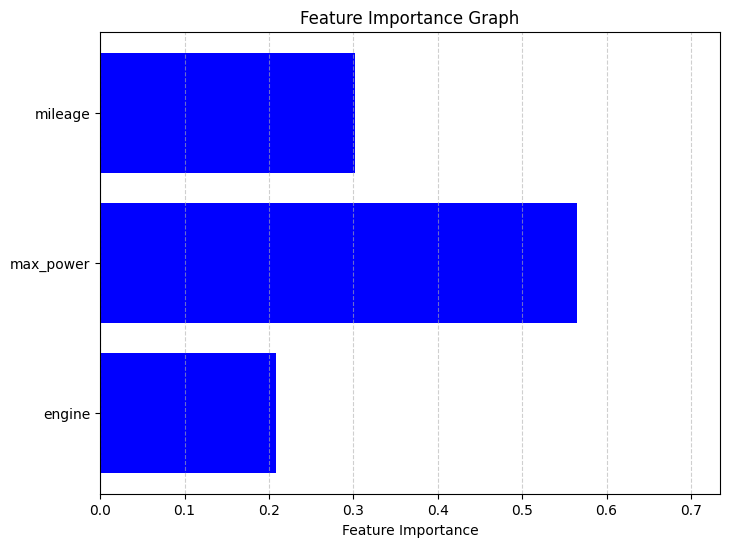

In [252]:
model.feature_importance()

In [216]:
import pickle

# Save the model to disk
filename = './app/code/model/car_price_new.model'
pickle.dump(model_zip, open(filename, 'wb'))

In [217]:
# Load the model from disk
loaded_data = pickle.load(open(filename, 'rb'))

In [218]:
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

In [219]:
df[['engine', 'max_power','mileage', 'selling_price']].loc[6865]

engine             2494.0
max_power           102.0
mileage              12.8
selling_price    750000.0
Name: 6865, dtype: float64

In [220]:
sample = np.array([[1248, 65,24.52]])

# Scaling the sample data to feed the model
sample_scaled = loaded_scaler.transform(sample)
intercept = np.ones((sample_scaled.shape[0], 1))

# Adding intercepts to match the model's theta shape
sample_scaled  = np.concatenate((intercept, sample_scaled), axis=1)
sample_scaled

array([[ 1.        , -0.39823958, -0.74521405,  1.29742548]])

In [221]:
predicted_car_price = loaded_model.predict(sample_scaled)
predicted_car_price = np.exp(predicted_car_price)
predicted_car_price

array([386073.86305323])